<a href="https://colab.research.google.com/github/GARF1094/AC_U.ICESI_202301/blob/main/Parcial_01_A_Cuantitativo_100523_(Conclusiones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

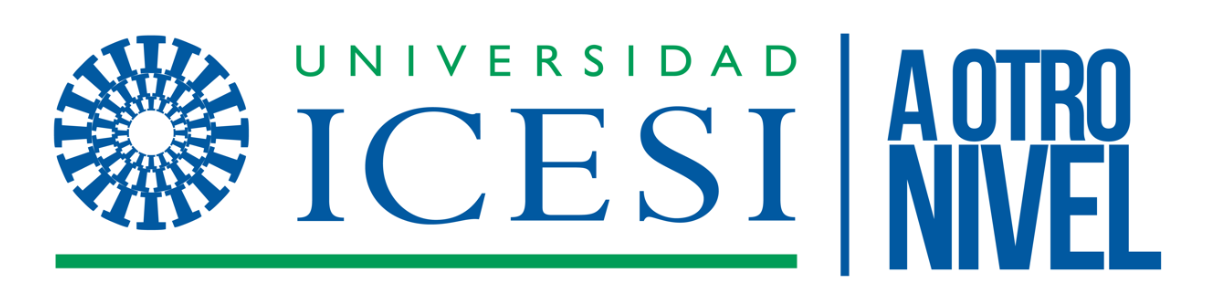

# **Primer taller de Análisis cuantitativo: Modelos de Regresión Lineal Simple y Multiple**



**Diana Guzmán Granobles.**
Universidad Icesi.

**Sebastián Barrera Peña.**
Universidad Autónoma.

**Gustavo Restrepo Figueroa.**
Universidad Icesi.

# **Resumen**

El proceso de convertir los datos en información valiosa y útil que pueda ser utilizada para entender y mejorar los resultados de un negocio, hace uso de una amplia variedad de técnicas y herramientas estadísticas y matemáticas, dentro de las cuales, es importante tener en cuenta los modelos de regresión lineal simple y los modelos de regresión lineal múltiple. 

Los modelos de regresión lineal son herramientas estadísticas que se utilizan para modelar la relación entre una variable dependiente y una o más variables independientes, las cuales pueden ser sólo numéricas o una combinación de variables numéricas y categóricas, este último caso, podría ser un modelo de regresión lineal con interacción. Estos modelos se han utilizado tradicionalmente en muchos campos para analizar y predecir el comportamiento de las variables de interés. Sin embargo, los modelos de regresión lineal tienen algunas limitaciones. Uno de los principales problemas es que estos modelos asumen una relación lineal entre las variables, lo que puede no ser cierto en todos los casos. Si las relaciones son no lineales, el modelo puede no capturar correctamente la complejidad de la relación entre las variables, lo que puede llevar a predicciones inexactas. Además, los modelos de regresión lineal pueden ser sensibles a los valores atípicos, lo que puede afectar la precisión de las predicciones. Para solucionar/mitigar el error, se han desarrollado técnicas, que incluyen estimadores de varianza robustos como la Correlación de Kendall o Spearman, los cuales pueden ser incluidos en un modelo de regresión lineal para hacerlos más robustos y potenciar su capacidad de predicción.

En este texto se comparan diferentes modelos de regresión lineal, para cinco tipos de bases de datos, con el fin de establecer no sólo cuál predice mejor, sino también las diferentes aproximaciones y herramientas que se pueden usar para resolver un mismo problema, cómo el uso de estimadores de varianza robusta, transformaciones de variables, entre otros. Es importante señalar que el análisis se hará a través del lenguaje de programación de Python y sus diferentes librerías.


**Palabras clave**: Modelos de Regresión Lineal Simple, Modelos de Regresión Lineal Multiple, OLS, Correlación de Pearson, Correlación de Kendall, Correlación de Spearman.

# **Introducción**



Los modelos de regresión lineal simple y múltiple son herramientas poderosas en el análisis de datos y la toma de decisiones. Permiten entender y predecir la relación entre una variable dependiente y una o más variables independientes. Estos modelos son ampliamente utilizados en áreas como la estadística, la economía, la ingeniería y las ciencias sociales para hacer predicciones, realizar inferencias y tomar decisiones informadas.


# **Modelo de Regresión Lineal:**

De un lado, el modelo de regresión lineal simple nos permite analizar la relación entre una variable independiente y una variable dependiente a través de la línea que mejor se ajusta a los datos. Por otro lado, el modelo de regresión lineal múltiple nos permite analizar la relación entre múltiples variables independientes y una variable dependiente. 

Además, es importante analizar las correlaciones de Pearson, Kendall y Spearman para entender la relación entre dos variables. La correlación de Pearson mide la relación lineal entre dos variables continuas, mientras que la correlación de Kendall y Spearman miden la relación no lineal entre dos variables ordinales o continuas. Estas medidas nos ayudan a entender cómo las variables están relacionadas y cómo podrían afectar el modelo de regresión.

# **Metodología:**

Para cada base de datos (data1, data2, Wine Quality, publicidad y Concrete_Data) que previamente han sido cargadas a un repositorio en GitHub, se realizarán, en general, los siguientes pasos, a fin de encontrar el modelo de regresión lineal que mejor se ajuste a los datos:

1.   Análisis Exploratorio de Datos: Incluye análisis de la forma de la base de datos, tipos de datos, estadísticas generales, datos faltantes, análisis univariado,análisis multivariado y datos atípicos.

2.   Entrenamiento del modelo OLS o RLM, y análisis de sus residuales (validación de los supuestos del modelo)

3. Entrenamiento de modelos ajustados debido a peticiones específicas, problemas con algún supuesto, reducción de dimensionalidad o necesidad de robustez y su respectivo análisis de residuales (validación de los supuestos del modelo)


# **Resultados:**

## **Cargue de Librerías y complementos**

In [ ]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from scipy.stats import skew, kurtosis  ## funciones estadísticas
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import ttest_1samp
import scipy.stats as stats

# **Punto 1: base de datos data1**

In [ ]:
# Carga de Datos
URL = "https://raw.githubusercontent.com/GARF1094/AC_U.ICESI_202301/main/data_exam1.xlsx" 
data1=pd.read_excel(URL, sheet_name = "data1")

## **Primera parte:**

### **EDA: Análisis Exploratorio de Datos**

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
data1.shape

(1000, 3)

In [ ]:
# Revisión de los primeros datos de la matriz.
data1.head(3)

Y          X  Ind
0  66.199147  12.653765    0
1  44.311301   8.204418    0
2  48.390783   8.768596    0

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
data1.dtypes

Y      float64
X      float64
Ind      int64
dtype: object

In [ ]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(data1[["Y","X"]])

Y            X
count            1000.000000  1000.000000
mean               46.953751     9.976858
std                22.046143     3.762567
min               -34.894319    -4.263757
25%                32.427643     7.638899
50%                45.460252     9.952888
75%                61.587567    12.379984
max               135.542574    25.628678
coef. variation     0.469529     0.377129
skew                0.277942     0.049022
kurtosis            0.559752     0.743470

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
data1.isnull().sum()/len(data1)*100

Y      0.0
X      0.0
Ind    0.0
dtype: float64

### **Visualización de los Datos:**

### *Análisis Univariado:*

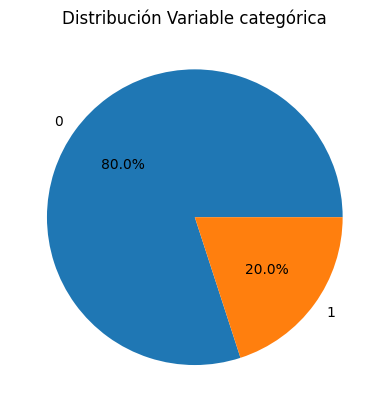

In [ ]:
# Revisando la distribución de la variable categórica:

# Datos para la gráfica de pastel
x=data1["Ind"].value_counts()

# Crear la gráfica de pastel
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

# Añadir título
plt.title('Distribución Variable categórica')

# Mostrar la gráfica
plt.show()

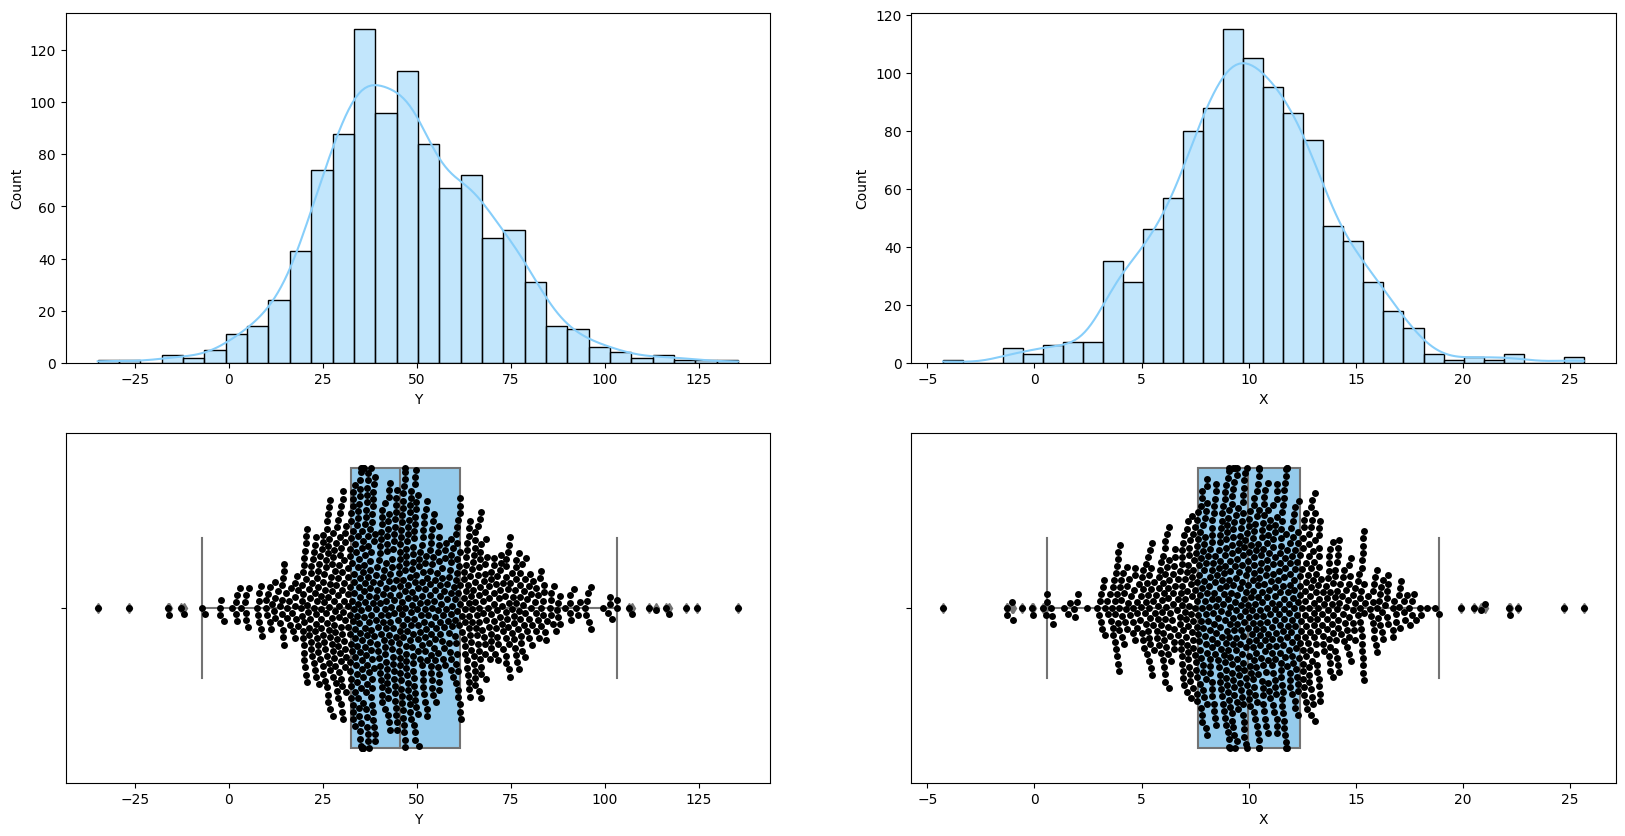

In [ ]:
# Revisando la distribución de las variables numéricas:

fig, axs = plt.subplots(figsize=[20, 10], ncols=2, nrows = 2)

ax1 = sns.histplot(x=data1["Y"],kde=True,color="lightskyblue", ax = axs[0,0])
ax2 = sns.histplot(x=data1["X"],kde=True,color="lightskyblue", ax = axs[0,1])

ax3 = sns.boxplot(x=data1['Y'],color="lightskyblue", ax = axs[1,0])
ax3 = sns.swarmplot(x=data1['Y'],color='black', ax = axs[1,0]) 

ax4 =sns.boxplot(x=data1['X'],color="lightskyblue", ax = axs[1,1])
ax4 = sns.swarmplot(x=data1['X'],color='black', ax = axs[1,1]) 

plt.show()

### *Análisis Multivariado:*

Se puede evidenciar a través del siguiente gráfico de histograma que las medias de cada clase de la variable categórica se sobreponen entre ellas:

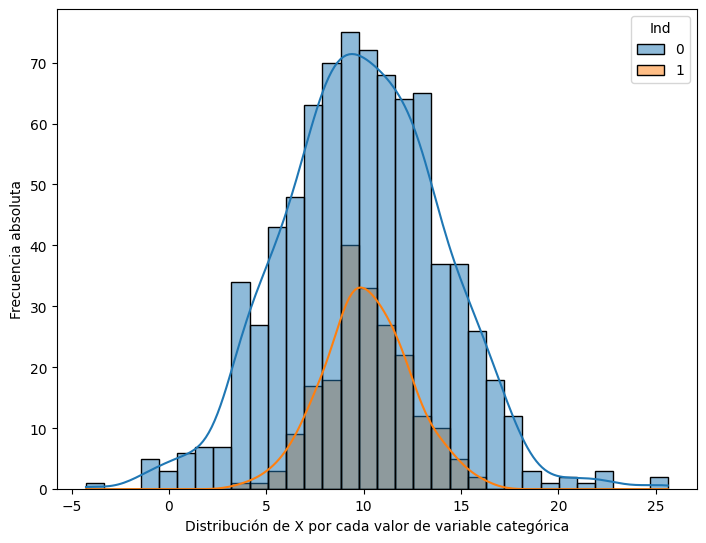

In [ ]:
# Revisando la interacción entre las variables categóricas y numéricas:

fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=data1["X"], hue=data1["Ind"],kde=True)
plt.ylabel('Frecuencia absoluta')   
plt.xlabel('Distribución de X por cada valor de variable categórica') 
plt.show() 

De la misma manera, a través de un gráfico de cajas y bigotes, se puede evidenciar que se sobreponen las medias, dando indicios para pensar que se tiene interacción entre las variables:

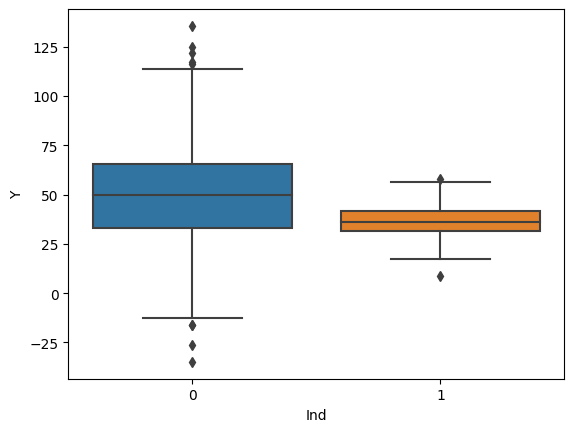

In [ ]:
# Revisando la interacción entre las variables categóricas y numéricas:

# Generar el boxplot utilizando seaborn
sns.boxplot(x='Ind', y='Y', data=data1)

# Mostrar el boxplot
plt.show()

### **¿Se podría realizar un modelo de regresión lineal sin interacción?**

En un modelo de regresión lineal sin interacción con variable categórica, las distribuciones de los datos no se sobrepondrían la una con la otra. Es decir, se evidenciaría con claridad que las medias de cada variable categórica cambia. No obstante, en este caso y de acuerdo con el análisis de los gráficos previamente presentados, tanto histogramas como Boxplots, no tendría sentido realizar un modelo de regresión lineal sin interacción, dado que las medias de cada variable categórica se sobreponen, es decir, hay evidencia gráfica para afirmar que interactúan entre ellas. 

Ahora bien, al hacer una prueba ANOVA para comparar las medias de las dos clases de la variable categórica, se encuentra que el valor P es de 0.44 mayor que el nivel de significancia (alpha = 0.05), lo cual, nos indica que hay evidencia estadística para no rechazar la hipótesis nula de que las medias de las dos poblaciones son iguales. Es decir, sus medias son iguales. Por tanto, se debe hacer un modelo con interacción.

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Creamos dos poblaciones a comparar:
categorica_0=data1[data1["Ind"]==0]
categorica_1=data1[data1["Ind"]==1]

# Realizamos el ANOVA
f_value, p_value = f_oneway(categorica_0["X"], categorica_1["X"])

# Imprimimos los resultados
print("Valor F:", f_value)
print("Valor p:", p_value)


Valor F: 0.5785021737758178
Valor p: 0.4470796754851175


### **Análisis y tratamiento de atípicos multivariantes:**

Antes de construir el modelo, conviene revisar la presencia de datos atípicos en los datos que puedan llegar a afectarlo. Para ello, se calculan las distancias de mahalanobis para identificar los atípicos multivariantes existentes:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-19-481dc18069e0>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente


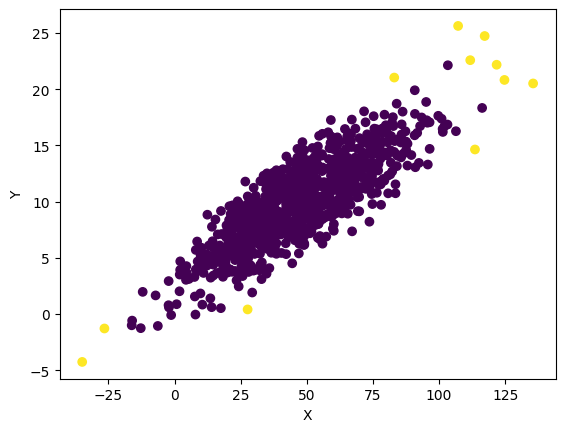

In [ ]:
x = data1[["Y","X","Ind"]]
x_menos_mu = x - np.mean(x)  ### Calculando los datos menos la media
cov = x.cov()                ### Calculando la covarianza
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
D_h = mahal.diagonal()

### Definimos un Cot-off
from scipy.stats import chi2
alpha = 0.01
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))
C

x["outlier"] = np.zeros(x.shape[0])
x.loc[D_h > C, "outlier"] = 1

plt.scatter(x["Y"], x["X"], c = x["outlier"])

# Agregar etiquetas de eje x e y
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [ ]:
# Calculando el número de outliers y cuánto representan de los datos totales:
print("Número de outliers: ",x["outlier"].sum())
print("Porcentaje de outliers: ",(x["outlier"].sum()/len(x["outlier"]))*100,"%")

Número de outliers:  11.0
Porcentaje de outliers:  1.0999999999999999 %


Dado que el porcentaje de datos atípicos multivariantes presentes en los datos es bajo (menor al 5%), no se tiene suficiente contexto para su imputación y puesto que no se tiene contexto adicional que permita determinar si su eliminación significaría un alto costo para el negocio, se procede entonces a su eliminación.

In [ ]:
# Se eliminan los datos atípicos al considerarse que representan un porcentaje bajo del total de los datos.
data1_clean = x.loc[D_h <= C, :]
data1_clean = data1_clean.drop("outlier", axis=1)

data1_clean.head()

Y          X  Ind
0  66.199147  12.653765    0
1  44.311301   8.204418    0
2  48.390783   8.768596    0
3  58.087413  16.169568    1
4  60.708671   9.980310    0

In [ ]:
data1_clean.shape

(989, 3)

## **Segunda Parte:**

### **Gráfico de dispersión:**

En el gráfico de dispersión de las variables, teniendo en cuenta la variable categórica, es posible evidenciar que al graficar un par de rectas que se ajusten a los datos, estas se interceptarían en algún punto, es decir, sus pendientes no son paralelas.

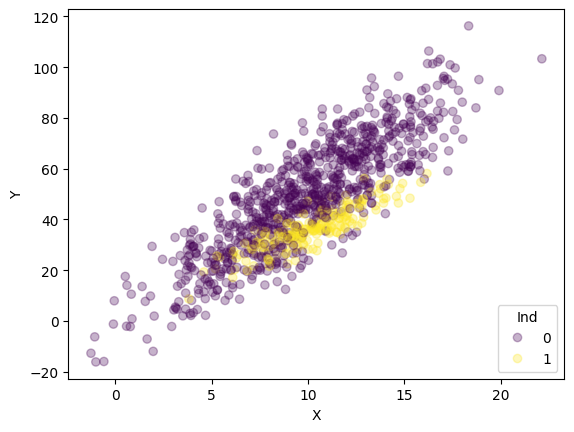

In [ ]:
# Generar el gráfico de dispersión
scatter = plt.scatter(data1_clean['X'], data1_clean['Y'], c=data1_clean['Ind'], alpha =0.3)

# Agregar etiquetas de eje x e y
plt.xlabel('X')
plt.ylabel('Y')

# Agregar leyenda al gráfico
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, loc='lower right', title='Ind')
plt.show()

### **Modelo de regresión con interacción:**

En un modelo de regresión con interacción con la variable categórica, la variable cualitativa modifica tanto el intercepto como la pendiente de las rectas generadas:

\begin{multline*}
\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i1} + \hat{\beta_{2}}x_{i2} + \hat{\beta_{3}}x_{i1} * x_{i2}
\end{multline*}

En nuestro modelo esta ecuación quedaría como:
\begin{multline*}
\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}X_{i} + \hat{\beta_{2}}Ind_{i} + \hat{\beta_{3}}X_{i} * Ind_{i}
\end{multline*}

Para 

\begin{multline*}
Ind_{i}= 0
\end{multline*}

Tenemos:

\begin{multline*}
\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}X_{i}
\end{multline*}

Donde 

\begin{multline*}
\hat{\beta_{0}} y \hat{\beta_{1}}
\end{multline*}

Guarda información del nivel basal (0)

Para 

\begin{multline*}
Ind_{i}= 1
\end{multline*}

Tenemos:

\begin{multline*}
\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}X_{i} + \hat{\beta_{2}} + \hat{\beta_{3}}X_{i}
\end{multline*}

Luego:

\begin{multline*}
\hat{y_{i}} = \hat{\beta_{0}}^{*} + \hat{\beta_{1}}^{*}X_{i}
\end{multline*}

Donde 

\begin{multline*}
\hat{\beta_{0}}^{*} = \hat{\beta_{0}} + \hat{\beta_{2}}
\end{multline*}

y

\begin{multline*}
\hat{\beta_{1}}^{*} = \hat{\beta_{1}} + \hat{\beta_{3}}
\end{multline*}

Guardan información del siguiente nivel.

In [ ]:
#Calculando la variable de interacción:
data1_clean["interaccion"]=data1_clean["X"]*data1_clean["Ind"]
data1_clean.head(3)

Y          X  Ind  interaccion
0  66.199147  12.653765    0          0.0
1  44.311301   8.204418    0          0.0
2  48.390783   8.768596    0          0.0

In [ ]:
import statsmodels.api as sm

# Ejecutando un modelo líneal (Regresión simple)
X = sm.add_constant(data1_clean.drop(["Y"], axis=1)) ## Variables explicativas o predictoras
model = sm.OLS(data1_clean['Y'], X) ## Variable dependiente
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     986.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.18e-296
Time:                        22:34:05   Log-Likelihood:                -3727.0
No. Observations:                 989   AIC:                             7462.
Df Residuals:                     985   BIC:                             7482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2743      1.033     -0.266      

Este modelo tiene un R² ajustado de 0.74, el cual se considera una relación lineal **fuerte** (>0.7) entre las variables. 

Además, el valor P de la significancia del modelo (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

No obstante, al revisar los valores P de los coeficiente de las variables, se encuentran dos cosas: primero, que el coeficiente de interacción es significativo, confirmando la hipótesis de un modelo de regresión con interacción como el más adecuado, y segundo, que algunas de variables (la variable categórica *Ind* y la *constante*) no son significativas en sí mismas dentro del modelo (valor P >= alpha de 0.05), por tanto, se procede a eliminarlas del mismo, resultado que se presenta a continuación:

### **Ajustando el modelo sólo con variables significativas:**

Se elimina la constante, dado que no se considera significativa. La variable de interacción es significativa y aunque la variable categórica por sí misma no se considere significativa según el modelo, se deben tomar significativa debido a su interacción significativa. 


In [ ]:
import statsmodels.api as sm

# Ejecutando un modelo líneal (Regresión simple)
X = data1_clean.drop(["Y"], axis=1) ## Variables explicativas o predictoras
model = sm.OLS(data1_clean['Y'], X) ## Variable dependiente
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              7480.
Date:                Thu, 11 May 2023   Prob (F-statistic):                        0.00
Time:                        00:47:57   Log-Likelihood:                         -3727.0
No. Observations:                 989   AIC:                                      7460.
Df Residuals:                     986   BIC:                                      7475.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Este modelo tiene un R² ajustado de 0.96, es decir, el modelo es capaz de explicar el 96% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

Además, el valor P de la significancia del modelo (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Al revisar los valores P de los coeficiente de las variables, se encuentra que son significativas (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable obejtivo varía en promedio tantas unidades como indica la pendiente. Para este ejemplo, por cada unidad que aumenta el predictor X, la variable Y aumenta en promedio 4.9 unidades, manteniéndose constantes el resto de predictores. Posteriormente, se procede a evaluar los supuestos del modelo, resultado que se verá a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 2.0 de la prueba Durbin-Watson que está entre 1.5 y 2.5, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que exista autocorrelación entre los errores.


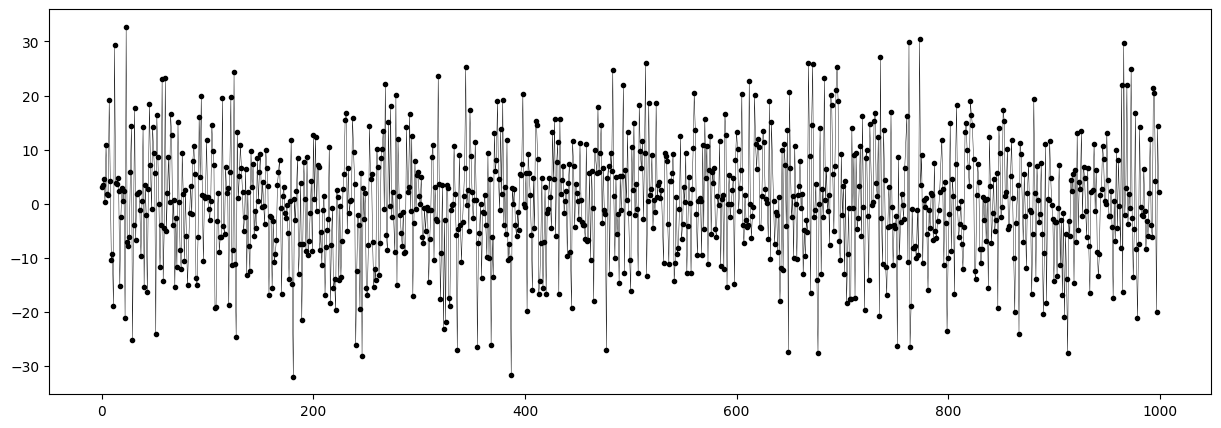

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.50 de la prueba Jarque-Bera mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los datos no se distribuyen normal.


(array([ 13.,  23.,  84., 133., 247., 255., 130.,  70.,  28.,   6.]),
 array([-32.00397436, -25.53223202, -19.06048969, -12.58874736,
         -6.11700502,   0.35473731,   6.82647965,  13.29822198,
         19.76996431,  26.24170665,  32.71344898]),
 <BarContainer object of 10 artists>)

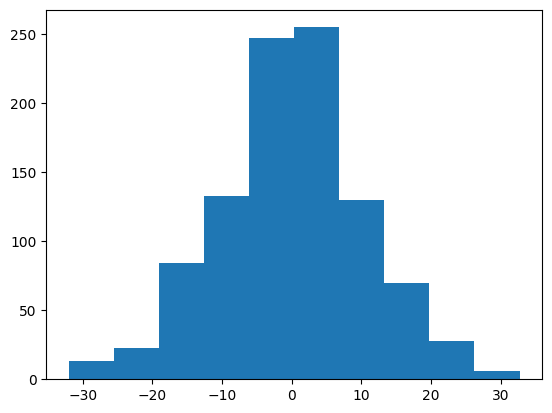

In [ ]:
# Histrograma de los residuales
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.98 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  0.026547404701538713
P-value:  0.9788260843892238


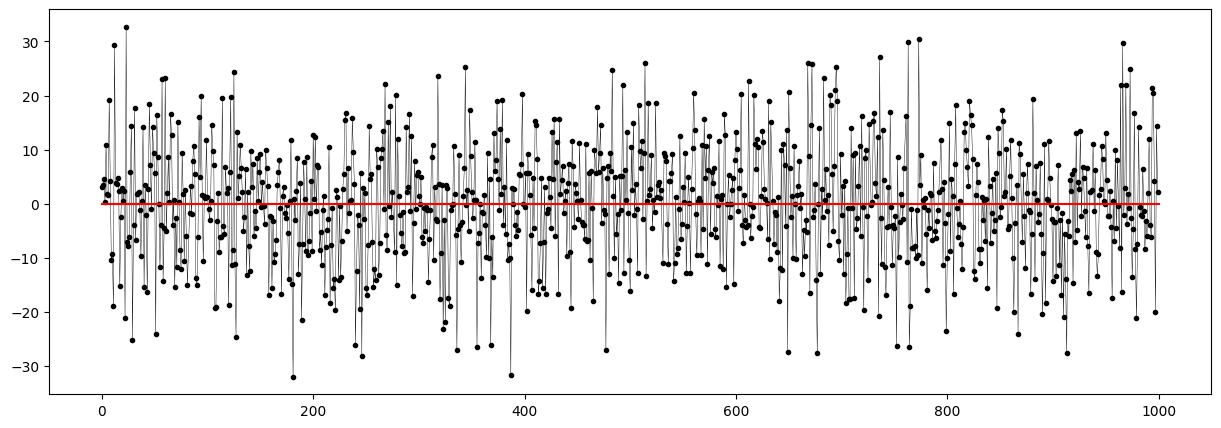

In [ ]:
#Gráfico de errores vs i, con media cero:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0 de una prueba Breuschpagan menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia para pensar que los errores no son homocedásticos.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 332.20473379127037),
 ('p-value', 3.1812526734989996e-74),
 ('f-value', 249.61056292675954),
 ('f p-value', 1.8721558466160631e-88)]

No obstante, al revisar el modelo, es posible observar que la varianza de los errores realmente se podría considerar homocedástica. Por tanto, se considera que sí se cumple el cuarto supuesto:

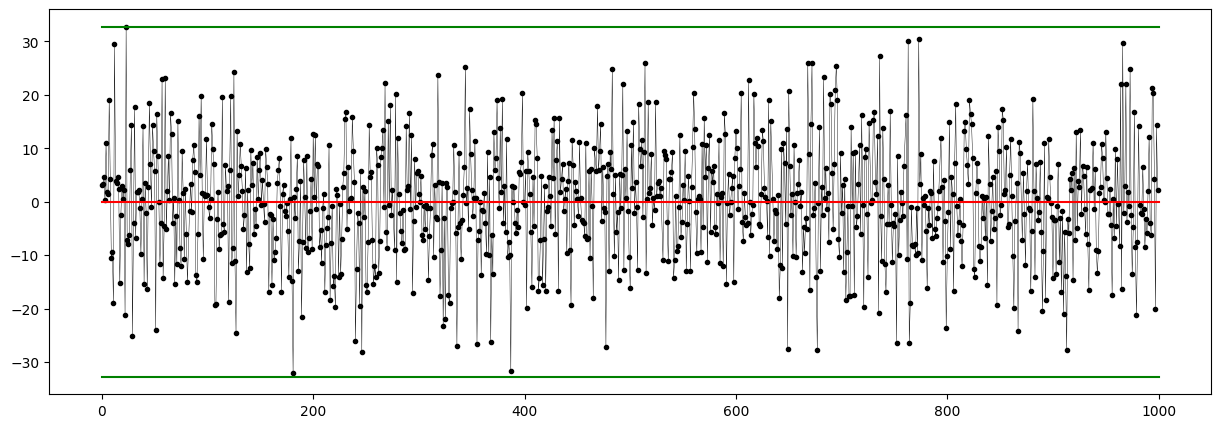

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Graficando las rectas del modelo:**

Ahora, de acuerdo con los datos generados por el modelo ajustado, se grafican las rectas de regresión con interacción:

In [ ]:
# Extraer los parámetros
pendiente_x = results.params[0]
pendiente_ind = results.params[1]
interaccion = results.params[2]

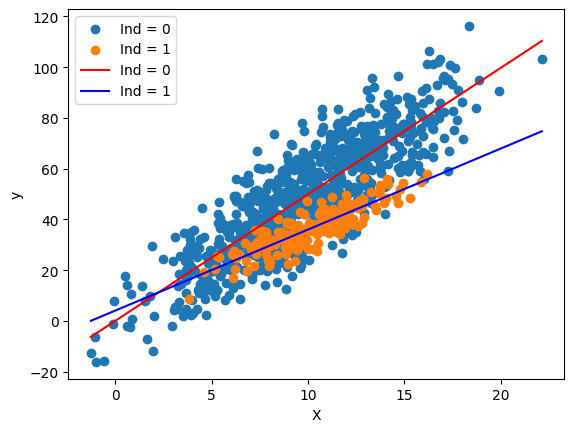

In [ ]:
# Graficando las dos rectas generadas por el modelo
plt.scatter(data1_clean[data1_clean['Ind'] == 0]['X'], data1_clean[data1_clean['Ind'] == 0]['Y'], label='Ind = 0')
plt.scatter(data1_clean[data1_clean['Ind'] == 1]['X'], data1_clean[data1_clean['Ind'] == 1]['Y'], label='Ind = 1')
x1_vals = np.linspace(np.min(data1_clean['X']), np.max(data1_clean['X']), 100)
y_vals_ind0 = pendiente_x*x1_vals
y_vals_ind1 = (pendiente_ind) + (pendiente_x + interaccion)*x1_vals
plt.plot(x1_vals, y_vals_ind0, color='red', label='Ind = 0')
plt.plot(x1_vals, y_vals_ind1, color='blue', label='Ind = 1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Se evidencia interacción entre la variable categórica y al variable explicativa X, dado que la pendiente de cada recta y su intercepto cambian.



---



# **Punto 2: base de datos data 2**

# **Resultados:**

In [ ]:
URL = "https://raw.githubusercontent.com/GARF1094/AC_U.ICESI_202301/main/data_exam1.xlsx" 
data2=pd.read_excel(URL, sheet_name = "data2")

## **Primera Parte:**

### **EDA: Análisis Exploratorio de Datos**

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
data2.shape

(1000, 2)

In [ ]:
# Revisión de los primeros datos de la matriz.
data2.head(3)

Y         X
0  12.189142  0.226957
1  12.187456  0.088938
2  11.782692  0.199069

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
data2.dtypes

Y    float64
X    float64
dtype: object

In [ ]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(data2)

Y             X
count            1000.000000  1.000000e+03
mean                9.445622  7.234805e-02
std                 3.908189  9.753985e-02
min               -12.073239  1.343729e-08
25%                 7.411486  8.450417e-03
50%                10.072134  3.655172e-02
75%                12.082546  9.992523e-02
max                17.838788  9.397465e-01
coef. variation     0.413757  1.348203e+00
skew               -1.102025  2.947735e+00
kurtosis            2.433810  1.382919e+01

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
data1.isnull().sum()/len(data2)*100

Y      0.0
X      0.0
Ind    0.0
dtype: float64

### **Visualización de los Datos:**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


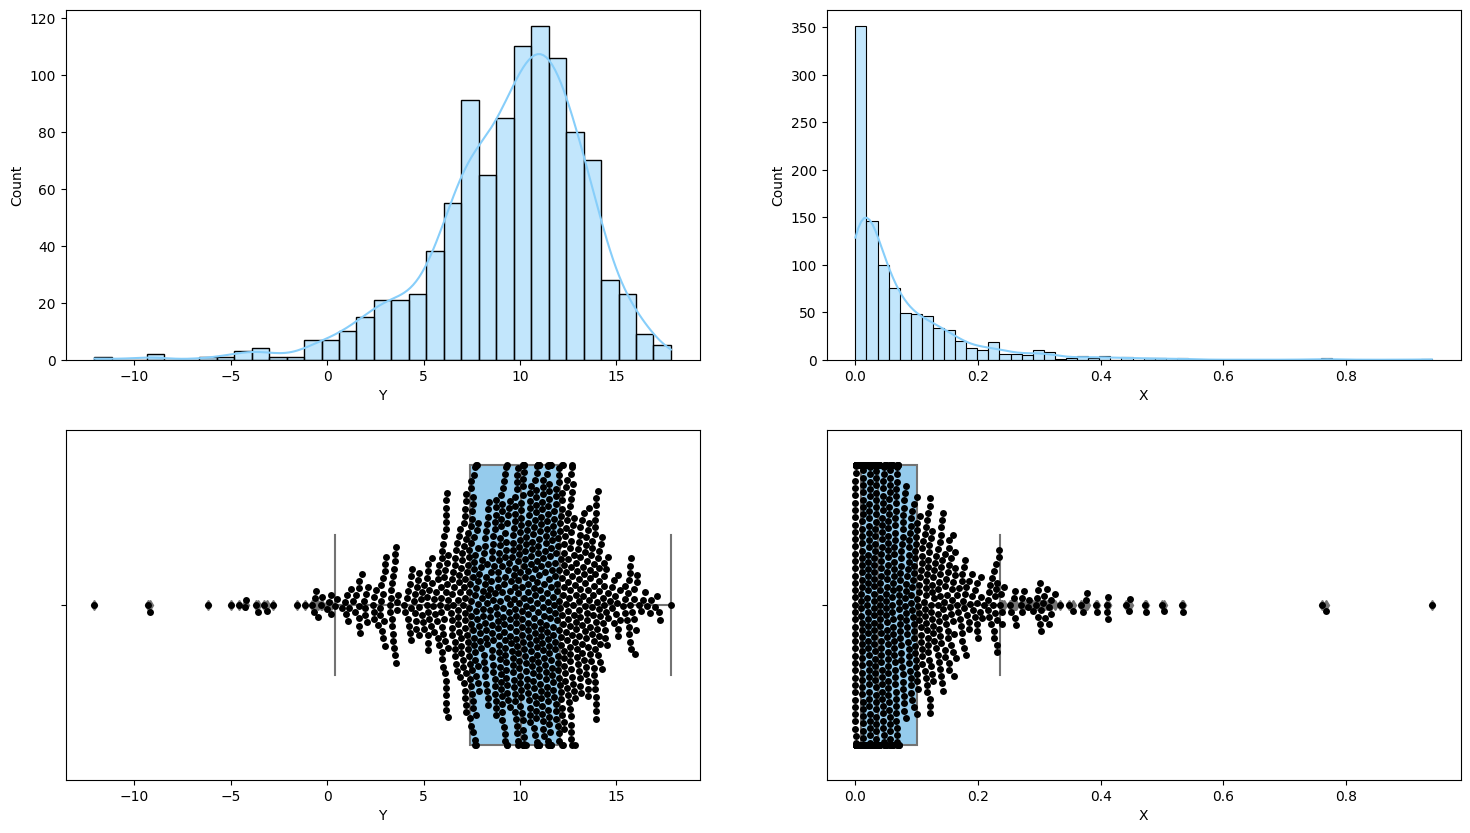

In [ ]:
# Revisando la distribución de las variables numéricas:

fig, axs = plt.subplots(figsize=[18, 10], ncols=2, nrows = 2)

ax1 = sns.histplot(x=data2["Y"],kde=True,color="lightskyblue", ax = axs[0,0])
ax2 = sns.histplot(x=data2["X"],kde=True,color="lightskyblue", ax = axs[0,1])

ax4 = sns.boxplot(x=data2['Y'],color="lightskyblue", ax = axs[1,0])
ax4 = sns.swarmplot(x=data2['Y'],color='black', ax = axs[1,0]) 

ax5 =sns.boxplot(x=data2['X'],color="lightskyblue", ax = axs[1,1])
ax5 = sns.swarmplot(x=data2['X'],color='black', ax = axs[1,1]) 

plt.show()

### **Gráfico de Dispersión:**

Text(0, 0.5, 'Y')

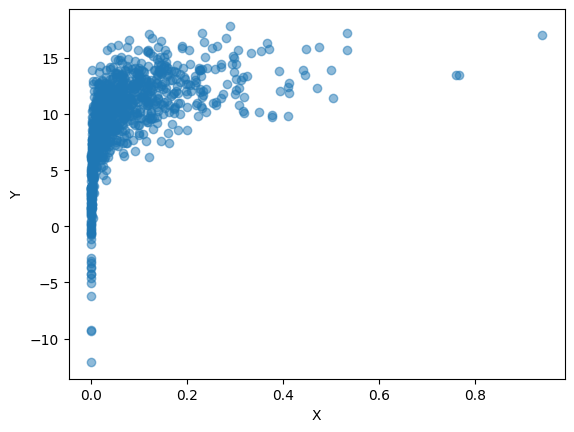

In [ ]:
# Generar el gráfico de dispersión
scatter = plt.scatter(data2['X'], data2['Y'], alpha =0.5)

# Agregar etiquetas de eje x e y
plt.xlabel('X')
plt.ylabel('Y')


## **Segunda parte:**

### **Transformando variable descriptiva:**

In [ ]:
#Aplicamos logaritmo Natural

data2["xlog"] = np.log10(data2["X"])
data2["xsqrt"] = np.sqrt(data2["X"])
data2["xsin"] = np.sin(data2["X"])
data2["xcuadra"] = (data2["X"])**2

data2.head()

Y         X      xlog     xsqrt      xsin   xcuadra
0  12.189142  0.226957 -0.644057  0.476400  0.225013  0.051509
1  12.187456  0.088938 -1.050912  0.298225  0.088821  0.007910
2  11.782692  0.199069 -0.700997  0.446171  0.197756  0.039628
3   5.732032  0.003812 -2.418850  0.061741  0.003812  0.000015
4   7.026970  0.004573 -2.339778  0.067626  0.004573  0.000021

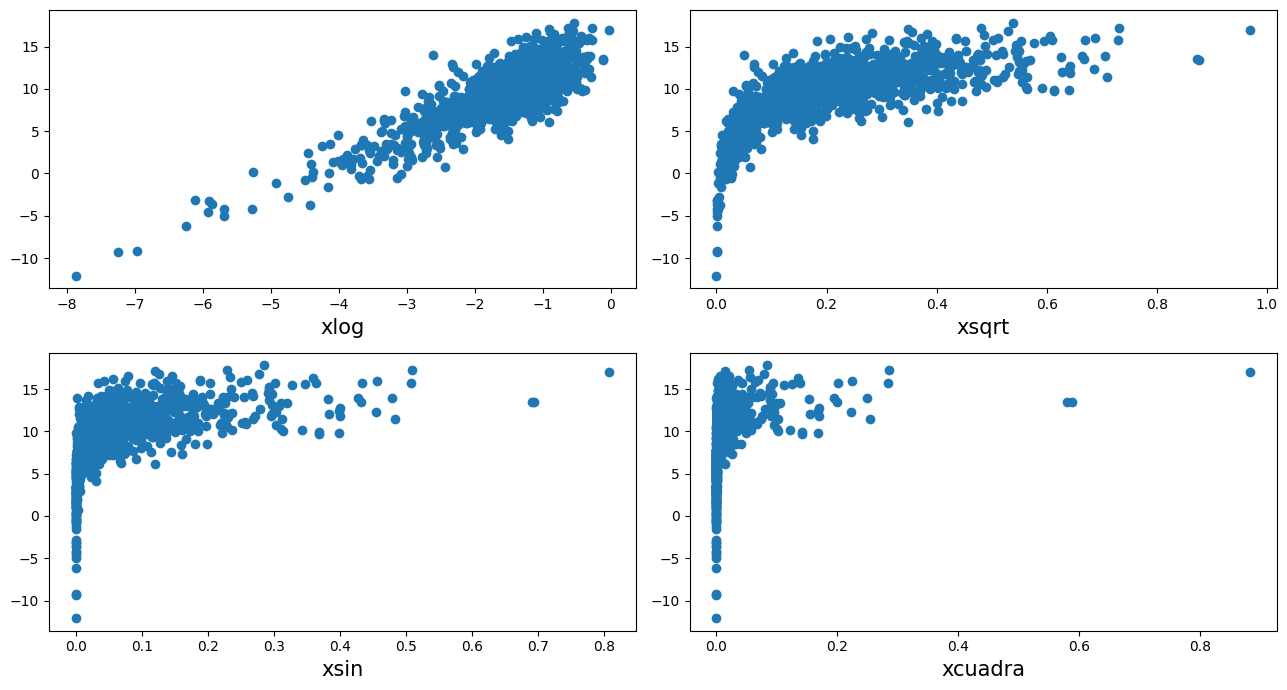

In [ ]:
# Revisando la representación de las variables numéricas con sus diferentes transformaciones:

Y = data2["Y"]

plt.figure(figsize = (13, 7))
plotnumber = 1

data2_new=data2.drop(["X","Y"],axis = 1)

for col in data2_new.columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        plt.scatter(data2_new[col], Y)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### **Análisis de la transformación:**

En un análisis de regresión, una transformación **logarítmica** puede ser útil en varios escenarios. Una de las principales razones por las cuales se puede aplicar una transformación logarítmica es si se sospecha que la relación entre las variables independientes y la variable dependiente no es lineal, sino que sigue una curva exponencial o logarítmica. En este caso puntual, aplicar una transformación logarítmica a la variable independiente X ayudó a linealizar la relación y, por lo tanto, a mejorar la capacidad del modelo para ajustarse a los datos.

Además, otras de las aplicaciones de una transformación logarítmica es si los datos tienen una distribución sesgada, es decir, si hay valores extremos o atípicos que están alejados del resto de los datos. Al aplicar una transformación logarítmica, los valores extremos pueden ser atenuados y los datos pueden ser más fáciles de analizar.

Es importante tener en cuenta que aplicar una transformación logarítmica no siempre es la mejor opción, y puede haber otros métodos de transformación que sean más adecuados para los datos. También es importante interpretar cuidadosamente los resultados de un análisis de regresión con una transformación logarítmica, ya que los coeficientes y las medidas de ajuste pueden tener una interpretación diferente en comparación con un análisis de regresión lineal convencional.

**Nota 1:** Hacer transformaciones de los datos para modelar hace que se pierda interpretación. Al intentar devolverse se tiene sesgo inducido. 

**Nota 2:** Si no es de interés el impacto de la variables, se pueden hacer transformaciones, dado que sólo se calibra el modelo para observar la respuesta final sin pensar en cómo afectan las variables.

### **Análisis y tratamiento de atípicos multivariantes:**

Antes de construir el modelo, conviene revisar la presencia de datos atípicos en los datos que puedan llegar a afectarlo. Para ello, se calculan las distancias de mahalanobis para identificar los atípicos multivariantes existentes:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-44-7f98dc6532a1>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
<ipython-input-44-7f98dc6532a1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["outlier"] = np.zeros(x.shape[0])


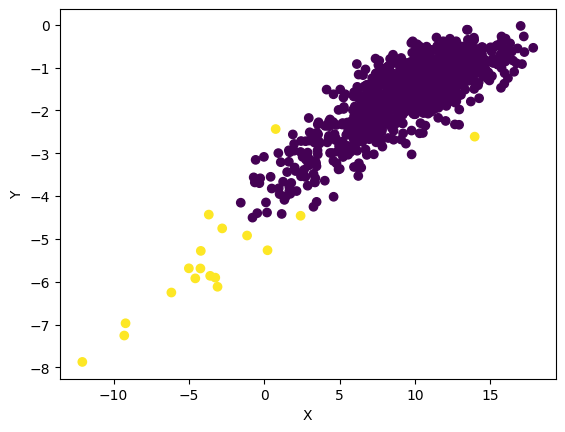

In [ ]:
x = data2[["Y", "xlog"]]
x_menos_mu = x - np.mean(x)  ### Aqui estamos calculando los datos menos la media
cov = x.cov()                ### Calculando la covarianza
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
D_h = mahal.diagonal()

### Definimos un Cot-off
from scipy.stats import chi2
alpha = 0.01
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))
C

x["outlier"] = np.zeros(x.shape[0])
x.loc[D_h > C, "outlier"] = 1

plt.scatter(x["Y"], x["xlog"], c = x["outlier"])

# Agregar etiquetas de eje x e y
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [ ]:
# Calculando el número de outliers y cuánto representan de los datos totales:
print("Número de outliers: ",x["outlier"].sum())
print("Porcentaje de outliers: ",(x["outlier"].sum()/len(x["outlier"]))*100,"%")

Número de outliers:  18.0
Porcentaje de outliers:  1.7999999999999998 %


Dado que el porcentaje de datos atípicos multivariantes presentes en los datos es bajo (menor al 5%), no se tiene suficiente contexto para su imputación y puesto que no se tiene contexto adicional que permita determinar si su eliminación significaría un alto costo para el negocio, se procede entonces a su eliminación.

In [ ]:
# Se eliminan los datos atípicos al considerarse que representan un porcentaje bajo del total.
data2_clean = x.loc[D_h <= C, :]
data2_clean = data2_clean.drop("outlier", axis=1)

data2_clean.head()

Y      xlog
0  12.189142 -0.644057
1  12.187456 -1.050912
2  11.782692 -0.700997
3   5.732032 -2.418850
4   7.026970 -2.339778

In [ ]:
data2_clean.shape

(982, 2)

### **Gráfico de Dispersión sin atípicos:**

Al graficar en un Scatterplot el comportamiento de la variable dependiente **Y** y la variable **X** transformada a través de un **logaritmo**, es posible observar que se ajusta a un elipsoide, la figura ideal para regresiones lineales.

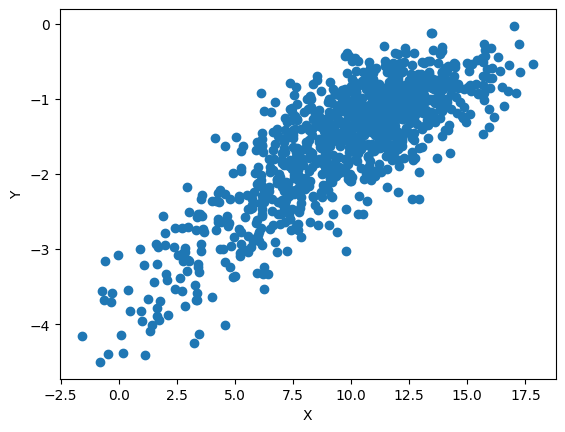

In [ ]:
plt.scatter(data2_clean["Y"], data2_clean["xlog"])

# Agregar etiquetas de eje x e y
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### **Modelo de regresión lineal:**

In [ ]:
import statsmodels.api as sm

# Ejecutando un modelo líneal (Regresión simple)
X = sm.add_constant(data2_clean.drop(["Y"], axis=1)) ## Variables explicativas o predictoras
model = sm.OLS(data2_clean['Y'], X) ## Variable dependiente
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 10 May 2023   Prob (F-statistic):          7.62e-237
Time:                        21:51:48   Log-Likelihood:                -2075.7
No. Observations:                 982   AIC:                             4155.
Df Residuals:                     980   BIC:                             4165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2509      0.141    108.200      0.0

Este modelo tiene un R² ajustado de 0.67, es decir, el modelo es capaz de explicar el 67% de la variabilidad observada y habla de una relación lineal **moderada** entre las variables. 

Además, el valor P de la **significancia de tener un modelo** (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Al revisar los valores P de los coeficiente de las variables, se encuentra que son **significativos** (valor P < alpha de 0.05), dado que este modelo tiene una transformación de la variable X que si bien nos da un buen ajuste lineal, hace que se pierda interpretación de los coeficientes. 

Posteriormente, se procede a validar los supuestos del modelo, resultado que se presenta a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.99 de la prueba Durbin-Watson que está entre 1.5 y 2.5, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que exista autocorrelación entre los errores. Es decir, se podría asumir que no hay autocorrelación en los errores.

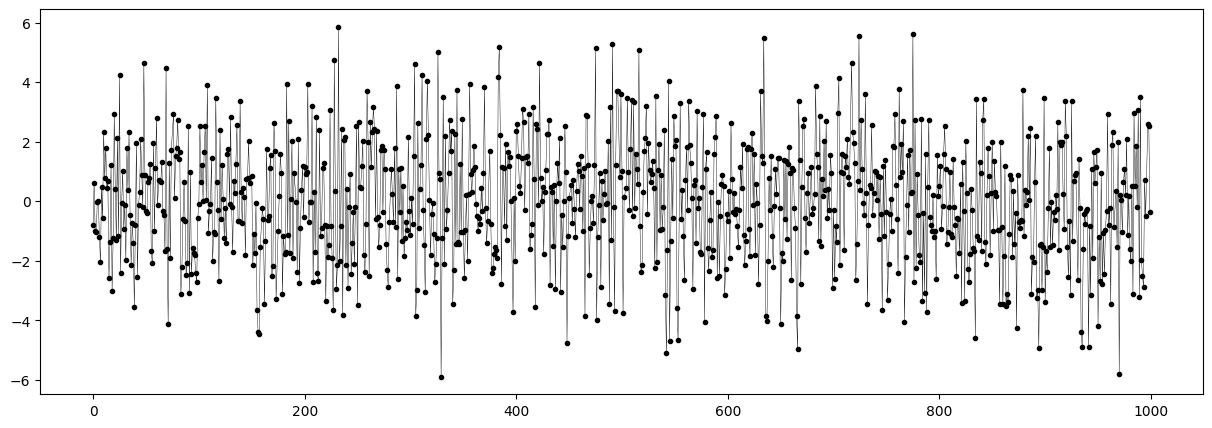

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.57 de la prueba Jarque-Bera mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

(array([  8.,  27.,  89., 147., 216., 222., 152.,  82.,  29.,  10.]),
 array([-5.89763361, -4.72197371, -3.54631381, -2.37065392, -1.19499402,
        -0.01933412,  1.15632577,  2.33198567,  3.50764557,  4.68330546,
         5.85896536]),
 <BarContainer object of 10 artists>)

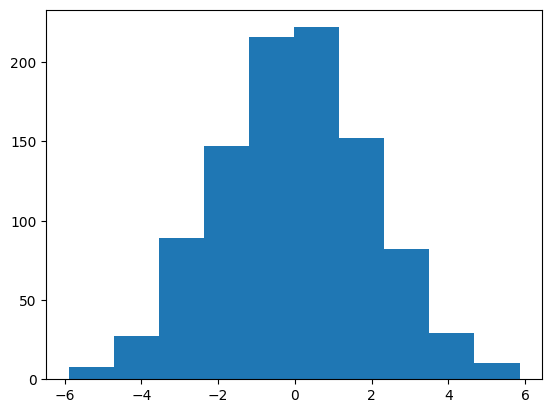

In [ ]:
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.99 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -8.665708503384965e-14
P-value:  0.9999999999999309


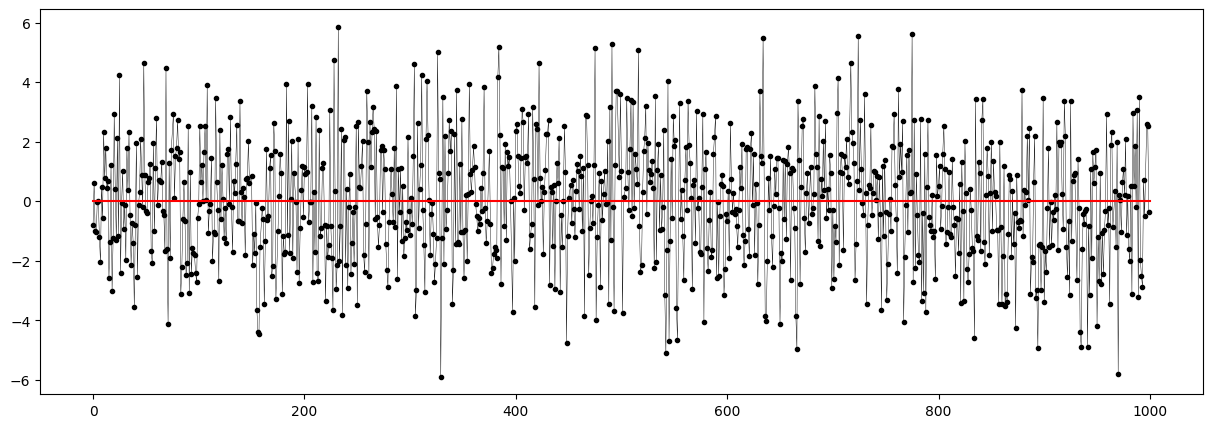

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.37 de una prueba Breuschpagan mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 0.8019269945111158),
 ('p-value', 0.3705178536511332),
 ('f-value', 0.8009478170025656),
 ('f p-value', 0.3710298901762521)]

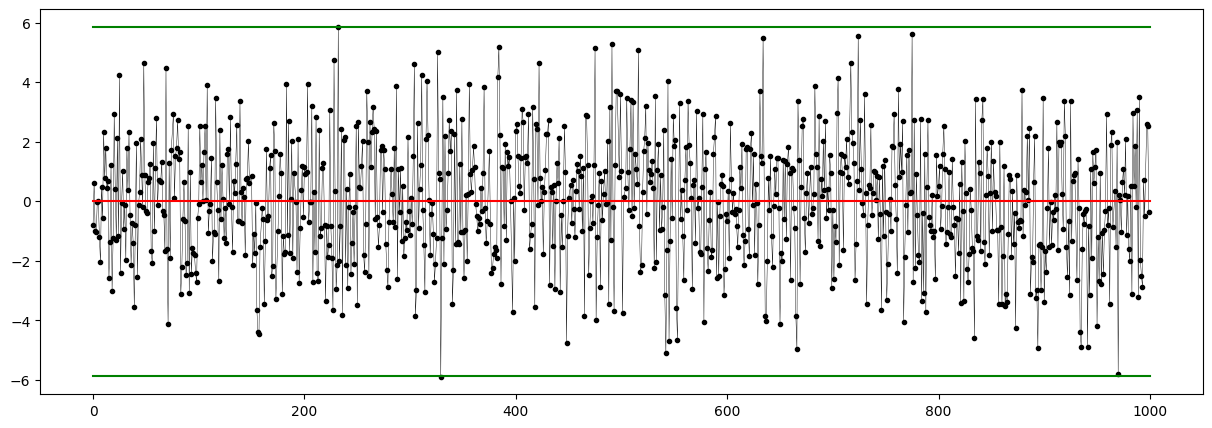

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Graficando la recta del modelo:**

In [ ]:
# Extraer los parámetros
intercepto = results.params[0]
pendiente_x = results.params[1]

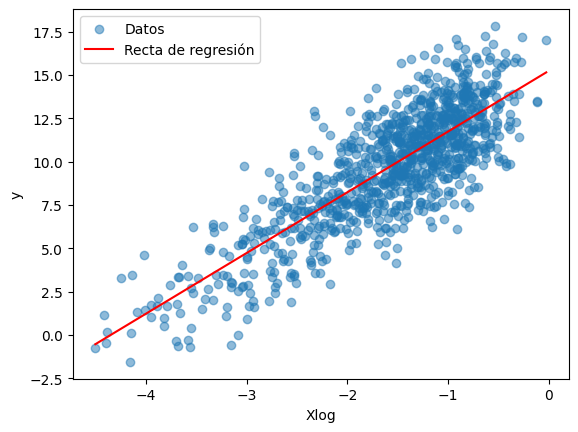

In [ ]:
# Graficando la recta generada por el modelo
plt.scatter(data2_clean['xlog'], data2_clean['Y'], label='Datos', alpha=0.5)
x1_vals = np.linspace(np.min(data2_clean['xlog']), np.max(data2_clean['xlog']), 100)
y_vals = intercepto + pendiente_x*x1_vals
plt.plot(x1_vals, y_vals, color='red', label='Recta de regresión')
plt.xlabel('Xlog')
plt.ylabel('y')
plt.legend()
plt.show()



---



# **Punto 3: base de datos Wine Quality**

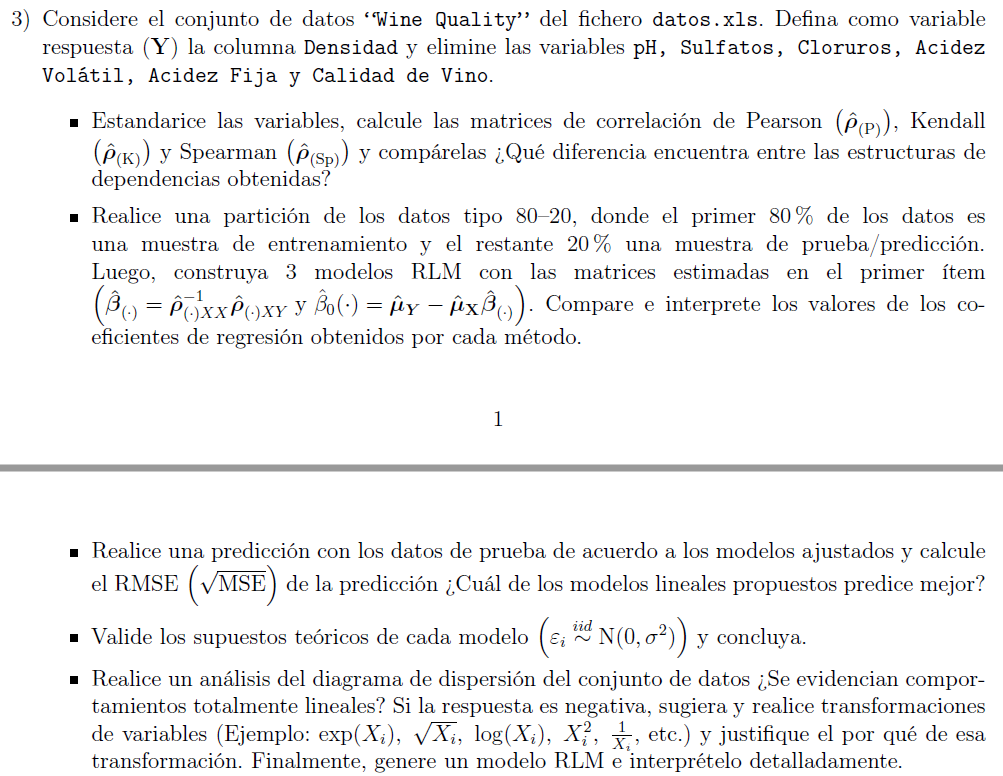

# **Resultados:**

In [ ]:
URL = "https://raw.githubusercontent.com/GARF1094/AC_U.ICESI_202301/main/datos.xls" 
wine=pd.read_excel(URL, sheet_name = "Wine Quality", header = 2)
wine.head(3)

Calidad del Vino  Acidez Fija  Acidez Volátil  Ácido Cítrico  \
0                 6          7.0            0.27           0.36   
1                 6          6.3            0.30           0.34   
2                 6          8.1            0.28           0.40   

   Azúcar Residual  Cloruros  Dióxido de Azúfre Libre  \
0             20.7     0.045                     45.0   
1              1.6     0.049                     14.0   
2              6.9     0.050                     30.0   

   Dióxido de Azúfre Total  Densidad    pH  Sulfatos  Alcohol  
0                    170.0    1.0010  3.00      0.45      8.8  
1                    132.0    0.9940  3.30      0.49      9.5  
2                     97.0    0.9951  3.26      0.44     10.1

In [ ]:
# Eliminación de variables solicitada: 
wine = wine.drop(["pH",	"Sulfatos","Cloruros","Acidez Volátil","Acidez Fija","Calidad del Vino"], axis = 1)

# Revisión de los primeros datos de la matriz.
wine.head(3)

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0           0.36             20.7                     45.0   
1           0.34              1.6                     14.0   
2           0.40              6.9                     30.0   

   Dióxido de Azúfre Total  Densidad  Alcohol  
0                    170.0    1.0010      8.8  
1                    132.0    0.9940      9.5  
2                     97.0    0.9951     10.1

## **Primera parte:**

### **EDA: Análisis Exploratorio de Datos**

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
wine.shape

(4898, 6)

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
wine.dtypes

Ácido Cítrico              float64
Azúcar Residual            float64
Dióxido de Azúfre Libre    float64
Dióxido de Azúfre Total    float64
Densidad                   float64
Alcohol                    float64
dtype: object

In [ ]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(wine)

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
count              4898.000000      4898.000000              4898.000000   
mean                  0.334192         6.391415                35.308085   
std                   0.121020         5.072058                17.007137   
min                   0.000000         0.600000                 2.000000   
25%                   0.270000         1.700000                23.000000   
50%                   0.320000         5.200000                34.000000   
75%                   0.390000         9.900000                46.000000   
max                   1.660000        65.800000               289.000000   
coef. variation       0.362127         0.793574                 0.481678   
skew                  1.281528         1.076764                 1.406314   
kurtosis              6.167374         3.465054                11.453416   

                 Dióxido de Azúfre Total     Densidad      Alcohol  
count                        4898.000000  4898.000000  4898.000000  
mean                          138.360657     0.994027    10.514267  
std                            42.498065     0.002991     1.230621  
min                             9.000000     0.987110     8.000000  
25%                           108.000000     0.991723     9.500000  
50%                           134.000000     0.993740    10.400000  
75%                           167.000000     0.996100    11.400000  
max                           440.000000     1.038980    14.200000  
coef. variation                 0.307154     0.003009     0.117043  
skew                            0.390590     0.977474     0.487193  
kurtosis                        0.570045     9.782587    -0.698937

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
wine.isnull().sum()/len(wine)*100

Ácido Cítrico              0.0
Azúcar Residual            0.0
Dióxido de Azúfre Libre    0.0
Dióxido de Azúfre Total    0.0
Densidad                   0.0
Alcohol                    0.0
dtype: float64

### **Visualización de los Datos:**

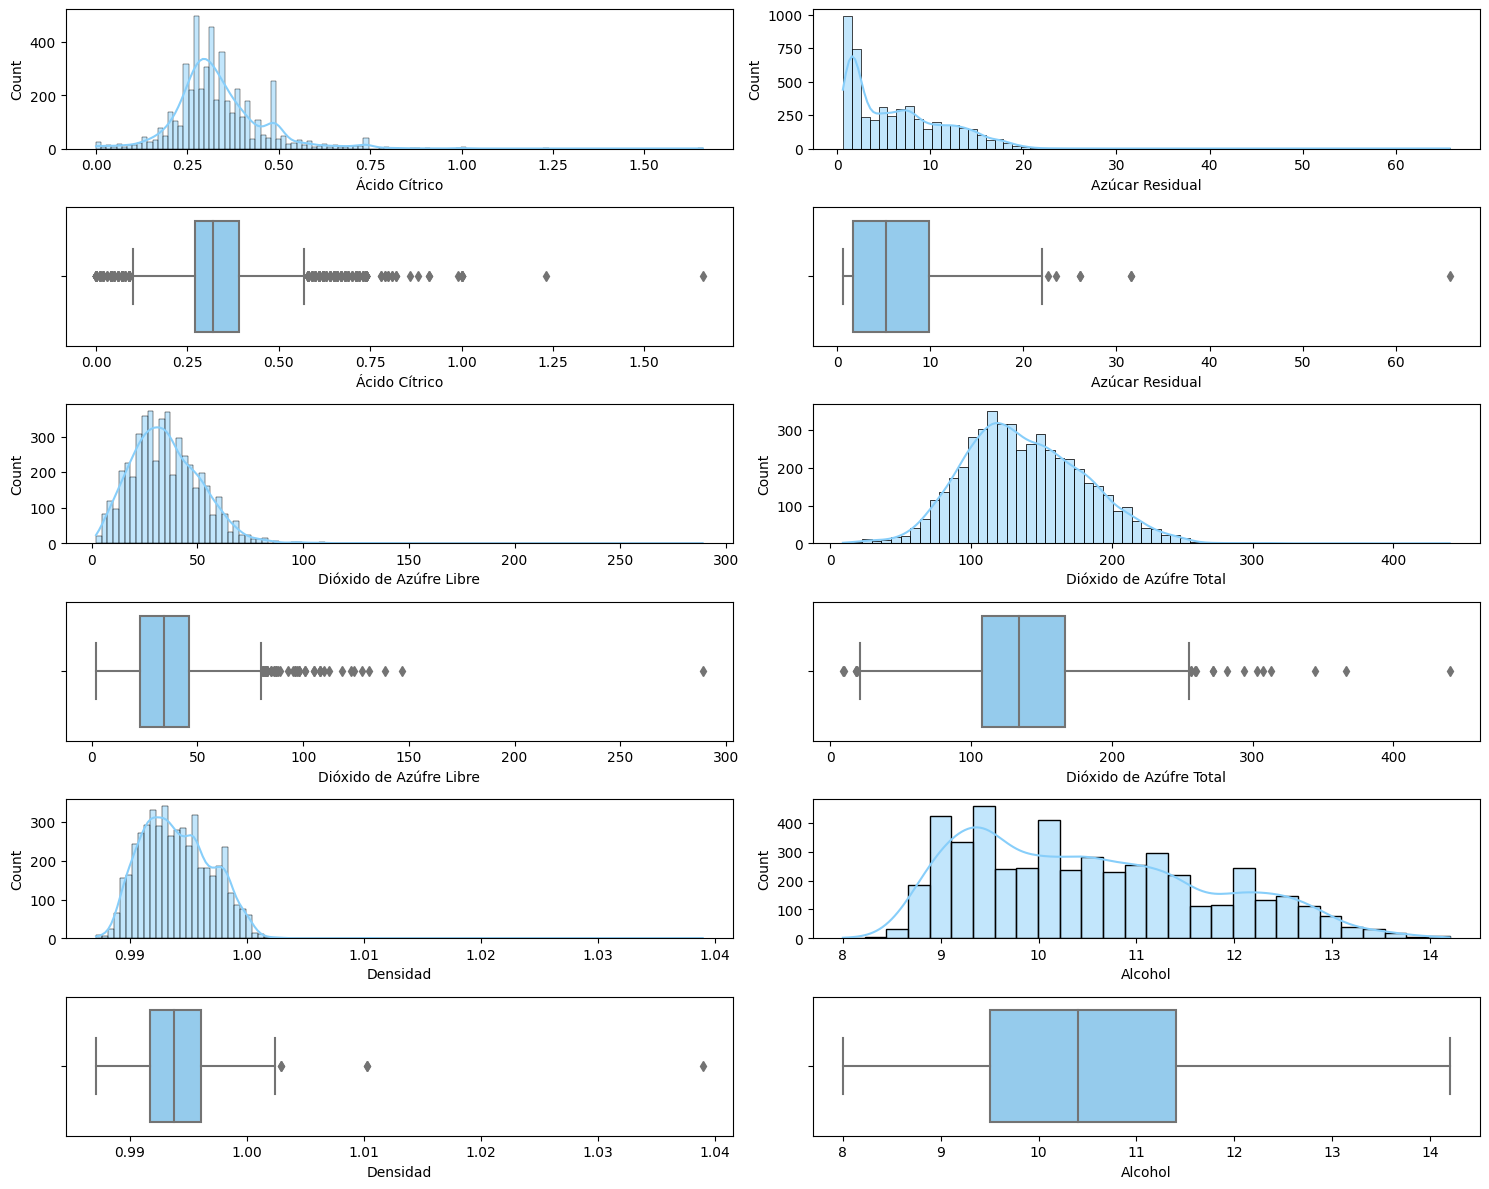

In [ ]:
# Revisando la distribución de las variables numéricas:

fig, axs = plt.subplots(figsize=[15,12], ncols=2, nrows = 6)

ax1 = sns.histplot(x=wine["Ácido Cítrico"],kde=True,color="lightskyblue", ax = axs[0,0])
ax2 = sns.histplot(x=wine["Azúcar Residual"],kde=True,color="lightskyblue", ax = axs[0,1])
ax3 = sns.histplot(x=wine["Dióxido de Azúfre Libre"],kde=True,color="lightskyblue", ax = axs[2,0])
ax4 = sns.histplot(x=wine["Dióxido de Azúfre Total"],kde=True,color="lightskyblue", ax = axs[2,1])
ax5 = sns.histplot(x=wine["Densidad"],kde=True,color="lightskyblue", ax = axs[4,0])
ax6 = sns.histplot(x=wine["Alcohol"],kde=True,color="lightskyblue", ax = axs[4,1])

ax7 = sns.boxplot(x=wine['Ácido Cítrico'],color="lightskyblue", ax = axs[1,0])
ax8 = sns.boxplot(x=wine['Azúcar Residual'],color="lightskyblue", ax = axs[1,1])
ax9 = sns.boxplot(x=wine['Dióxido de Azúfre Libre'],color="lightskyblue", ax = axs[3,0])
ax10 = sns.boxplot(x=wine['Dióxido de Azúfre Total'],color="lightskyblue", ax = axs[3,1])
ax11 = sns.boxplot(x=wine['Densidad'],color="lightskyblue", ax = axs[5,0])
ax12 = sns.boxplot(x=wine['Alcohol'],color="lightskyblue", ax = axs[5,1])

fig.tight_layout()
plt.show()

### **Análisis y tratamiento de atípicos multivariantes:**

Antes de construir el modelo, conviene revisar la presencia de datos atípicos en los datos que puedan llegar a afectarlo. Para ello, se calculan las distancias de mahalanobis para identificar los atípicos multivariantes existentes:

In [ ]:
x = wine
x_menos_mu = x - np.mean(x)  ### Calculando los datos menos la media
cov = x.cov()                ### Calculando la covarianza
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
D_h = mahal.diagonal()

### Definimos un Cot-off
from scipy.stats import chi2
alpha = 0.01
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))
C

x["outlier"] = np.zeros(x.shape[0])
x.loc[D_h > C, "outlier"] = 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-216-bf9d481d2eb5>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente


In [ ]:
# Calculando el número de outliers y cuánto representan de los datos totales:
print("Número de outliers: ",x["outlier"].sum())
print("Porcentaje de outliers: ",(x["outlier"].sum()/len(x["outlier"]))*100,"%")

Número de outliers:  106.0
Porcentaje de outliers:  2.1641486320947325 %


Dado que el porcentaje de datos atípicos multivariantes presentes en los datos es bajo (menor al 5%), no se tiene suficiente contexto para su imputación y puesto que no se tiene contexto adicional que permita determinar si su eliminación significaría un alto costo para el negocio, se procede entonces a su eliminación.

In [ ]:
# Se eliminan los datos atípicos al considerarse que representan un porcentaje bajo del total.
wine_clean = x.loc[D_h <= C, :]
wine_clean = wine_clean.drop(["outlier"], axis=1)
wine_clean.head()

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0           0.36             20.7                     45.0   
1           0.34              1.6                     14.0   
2           0.40              6.9                     30.0   
3           0.32              8.5                     47.0   
4           0.32              8.5                     47.0   

   Dióxido de Azúfre Total  Densidad  Alcohol  
0                    170.0    1.0010      8.8  
1                    132.0    0.9940      9.5  
2                     97.0    0.9951     10.1  
3                    186.0    0.9956      9.9  
4                    186.0    0.9956      9.9

### **Estandarización de Variables:**

Se procede a estandarizar las variables restandoles la media y dividiendolas por su desviación estándar:

In [ ]:
def mean_std_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean()) / x.std(), axis=0)
    
wine_clean_estandar=mean_std_norm(wine_clean)

### **Matrices de correlación:**

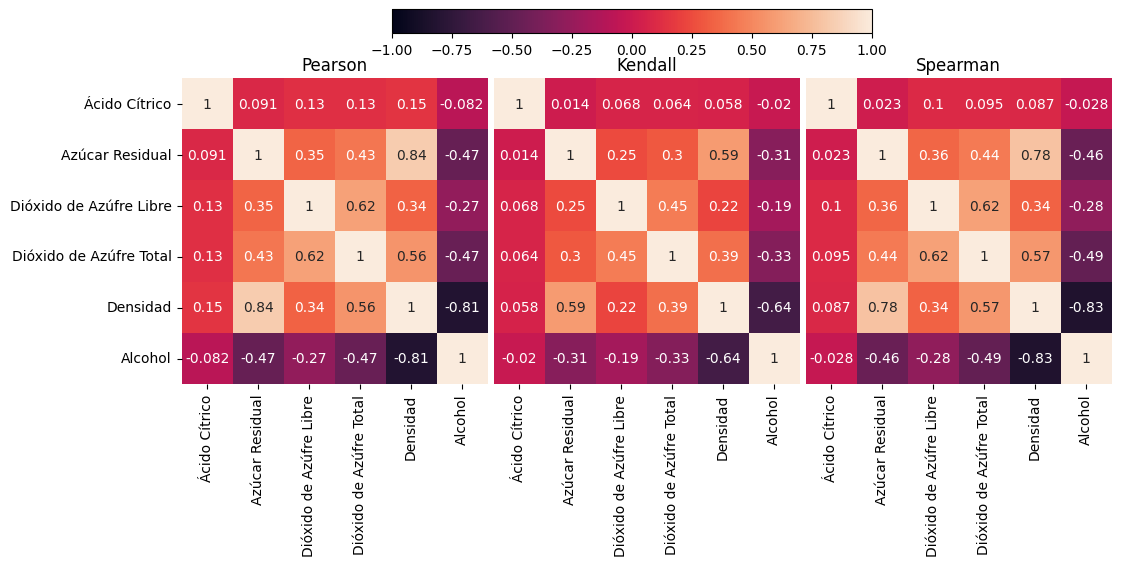

In [ ]:
fig, axs = plt.subplots(figsize=[12, 12], ncols=3)

Pearson_corr_matrix = wine_clean_estandar.corr(method='pearson') # Calcular la matriz de correlación de Pearson
Kendall_corr_matrix = wine_clean_estandar.corr(method='kendall') # Calcular la matriz de correlación de Kendall
Spearman_corr_matrix = wine_clean_estandar.corr(method='spearman') # Calcular la matriz de correlación de Spearman

ax1 = sns.heatmap(Pearson_corr_matrix, annot=True, ax=axs[0], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax1.set_title("Pearson", fontsize=12)

ax2 = sns.heatmap(Kendall_corr_matrix, annot=True, ax=axs[1], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax2.set_title("Kendall", fontsize=12)
ax2.set_yticks([])

ax3 = sns.heatmap(Spearman_corr_matrix, annot=True, ax=axs[2], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax3.set_title("Spearman", fontsize=12)
ax3.set_yticks([])

cbar_ax = fig.add_axes([0.3, 0.66, 0.4, 0.02]) # [left, bottom, width, height]
fig.colorbar(ax1.collections[0], ax=axs, cax=cbar_ax, shrink=0.7, pad=0.05,orientation='horizontal')
fig.subplots_adjust(wspace=0.02)

plt.show()

De acuerdo con los resultados, las variables explicativas **más fuertemente** asociadas con la **densidad** del vino son el **Azúcar Residual** y el **Alcohol**, independientemente del tipo de correlación (Pearson, Kendal y Spearman). Esto indica que un cambio en una unidad en el Azúcar Residual o el Alcohol se asocia con un cambio en la densidad del vino. En el caso del azúcar residual esta relación es **positiva**, por tanto aumentos en las unidades del azúcar residual, se asocia a aumentos en las unidades de densidad y visceversa. Por el contrario, en el caso del alcohol esta relación es **negativa**, por tanto aumentos en las unidades del alcohol, se asocia a disminuciones en las unidades de densidad y visceversa. 

Por otro lado, las variables explicativas **más débilmente** asociadas con la densidad del vino son el **Ácido cítrico**, **Dióxido de Azufre Total** y el **Dióxido de Azufre Libre**,independientemente del tipo de correlación (Pearson, Kendal y Spearman), con coeficientes negativos en los tres tipos de correlación. Esto indica que un aumento en estas variables se asocia con una disminución en la densidad del vino, mientras que una disminución en estas variables se asocia con un aumento en la densidad del vino.

Finalmente, el Ácido Cítrico es la variable explicativa que muestra las mayores diferencias entre los coeficientes de correlación. Esto puede deberse a diferencias en la forma en que estas correlaciones consideran la relación entre las variables y en particular, a la posible presencia de relaciones no lineales.

## **Segunda parte:**

### **Hold Out (80-20):**

Se hace un particionamiento de los datos en dos conjuntos, un 80% para entrenar los modelos y un 20% para evaluar su efectividad con un conjunto de datos desconocidos:

In [ ]:
from sklearn.model_selection import train_test_split

X = wine_clean_estandar.drop(["Densidad"], axis=1)
y = wine_clean_estandar['Densidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Modelo de regresión lineal múltiple:**


### **Modelo 1: RLM con correlación de Pearson:**

Teniendo en cuenta que los datos fueron normalizados y que las correlaciones entre las variables fueron calculadas de manera posterior, la matriz de correlación de Pearson corresponde a una matriz de covarianza estandarizada, que será una pieza clave en la construcción del modelo RLM:

In [ ]:
# Correlación:
corr_pearson = X_train.corr(method='pearson')

# Calcular la matriz de covarianza de las variables explicativas invertida
cov_matrix = np.linalg.inv(corr_pearson)

# Calcular el vector de covarianza de las variables explicativas con la variable objetivo
cov_vector = np.dot(cov_matrix, np.mean((X_train - X_train.mean()).T * (y_train - y_train.mean()), axis=1))

# Calcular los betas
betas_pearson = np.dot(cov_matrix, cov_vector)

print("\nBetas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(betas_pearson[i]))

# Calcular el intercepto
intercepto_pearson = y_train.mean() - np.dot(betas_pearson, X_train.mean())

print("\nIntercepto: " + str(intercepto_pearson))


Betas:
Ácido Cítrico: 0.02451496745953124
Azúcar Residual: 0.5290900376471968
Dióxido de Azúfre Libre: -0.3068067742769553
Dióxido de Azúfre Total: -0.08411635918955726
Alcohol: -0.3707076007327923

Intercepto: 0.0031565203194391326


Se obtiene información consistente con las correlaciones hayadas anteriormente, puesto que los coeficientes más grandes siguen siendo Azúcar residual y Alcohol. Por otro lado, los coeficientes más pequeños son los de Ácido cítrico y Dióxido de Azufre Total.

### **Modelo 2: RLM con correlación de Kendall:**

Teniendo en cuenta que los datos fueron normalizados y que las correlaciones entre las variables fueron calculadas de manera posterior, la matriz de correlación de Kendall corresponde a una matriz de covarianza estandarizada, que será una pieza clave en la construcción del modelo RLM:

In [ ]:
# Correlación:
corr_kendall = X_train.corr(method='kendall')

# Calcular la matriz de covarianza de las variables explicativas invertida
cov_matrix = np.linalg.inv(corr_kendall)

# Calcular el vector de covarianza de las variables explicativas con la variable objetivo
cov_vector = np.dot(cov_matrix, np.mean((X_train - X_train.mean()).T * (y_train - y_train.mean()), axis=1))

# Calcular los betas
betas_kendall = np.dot(cov_matrix, cov_vector)

print("\nBetas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(betas_kendall[i]))

# Calcular el intercepto
intercepto_kendall = y_train.mean() - np.dot(betas_kendall, X_train.mean())

print("\nIntercepto: " + str(intercepto_kendall))


Betas:
Ácido Cítrico: 0.11958443771967558
Azúcar Residual: 0.5217835565672244
Dióxido de Azúfre Libre: -0.20460442169611345
Dióxido de Azúfre Total: -0.03151585803746278
Alcohol: -0.4444294626879397

Intercepto: 0.002051913391231685


Se obtiene información consistente con las correlaciones hayadas anteriormente, puesto que los coeficientes más grandes siguen siendo Azúcar residual y Alcohol. Por otro lado, los coeficientes más pequeños son los de Ácido cítrico y Dióxido de Azufre Total.

### **Modelo 3: RLM con correlación de Spearman:**

Teniendo en cuenta que los datos fueron normalizados y que las correlaciones entre las variables fueron calculadas de manera posterior, la matriz de correlación de Spearman corresponde a una matriz de covarianza estandarizada, que será una pieza clave en la construcción del modelo RLM:

In [ ]:
# Correlación:
corr_spearman = X_train.corr(method='spearman')

# Calcular la matriz de covarianza de las variables explicativas invertida
cov_matrix = np.linalg.inv(corr_spearman)

# Calcular el vector de covarianza de las variables explicativas con la variable objetivo
cov_vector = np.dot(cov_matrix, np.mean((X_train - X_train.mean()).T * (y_train - y_train.mean()), axis=1))

# Calcular los betas
betas_spearman = np.dot(cov_matrix, cov_vector)

print("\nBetas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(betas_spearman[i]))

# Calcular el intercepto
intercepto_spearman = y_train.mean() - np.dot(betas_spearman, X_train.mean())

print("\nIntercepto: " + str(intercepto_spearman))


Betas:
Ácido Cítrico: 0.14628808885300837
Azúcar Residual: 0.572600432420064
Dióxido de Azúfre Libre: -0.2838212445582017
Dióxido de Azúfre Total: -0.20978557749547788
Alcohol: -0.43533911615374843

Intercepto: 0.0027276915581569408


Se obtiene información consistente con las correlaciones hayadas anteriormente, puesto que los coeficientes más grandes siguen siendo Azúcar residual y Alcohol. Por otro lado, los coeficientes más pequeños son los de Ácido cítrico y Dióxido de Azufre Total.

**Análisis:** 

Observando los resultados, se puede ver que los coeficientes beta son bastante similares para las variables "Ácido Cítrico", "Azúcar Residual" y "Alcohol", independientemente del método de correlación utilizado. Sin embargo, hay algunas diferencias importantes:

De acuerdo con los resultados, las variables explicativas más fuertemente asociadas con la densidad del vino son el Azúcar Residual y el Alcohol, en los tres modelos (Pearson, Kendal y Spearman). Esto indica que un cambio en el Azúcar Residual o el Alcohol se asocia con un cambio en la densidad del vino.

Los coeficientes más grandes indican que una variable explicativa tiene una relación más fuerte con la variable objetivo. En este caso, el coeficiente más grande en todas las correlaciones es el de "Azúcar Residual", lo que indica que esta variable tiene una fuerte relación con la "Densidad" del vino. Por otro lado, los coeficientes beta para "Dióxido de Azúfre Total" son negativos en todos los tres modelos, pero el valor es más pequeño para la correlación de Kendall. Esto sugiere que la relación lineal entre "Dióxido de Azúfre Total" y "Densidad" puede ser menos fuerte de lo que sugieren las otras dos correlaciones.

Finalmente, el Ácido Cítrico es la variable explicativa que muestra las mayores diferencias entre los coeficientes de correlación. Mientras que el coeficiente de Pearson es el más bajo, el de Kendal y el de Spearman es más alto. Esto puede deberse a diferencias en la forma en que estas correlaciones consideran la relación entre las variables y en particular la posible presencia de relaciones no lineales.


## **Tercera parte:**

### **Modelo ajustado y métricas - Pearson:**

In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_pearson) + intercepto_pearson

# Calcular la suma de cuadrados de los residuos (RSS)
RSS = np.sum((y_test - y_pred) ** 2)

# Calcular la suma total de cuadrados (TSS)
TSS = np.sum((y_test - y_train.mean()) ** 2)

# Calcular el coeficiente de determinación (R^2)
R2 = 1 - (RSS / TSS)
print("Coeficiente de determinación (R²): ", R2)

# Calcular la raiz del error cuadrático medio (sqrt(MSE))
mse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", mse)

# Calcular el número de observaciones y de variables explicativas
n = len(y_test)
p = len(X_test.columns)

# Calcular el estadístico F de Fisher
F = (R2 / (p - 1)) / ((1 - R2) / (n - p))
print("Estadístico F de Fisher: ", F)

# Calcular el valor p de la prueba F de Fisher
p_value = 1 - stats.f.cdf(F, p - 1, n - p)
print("Valor p de la prueba F de Fisher: ", p_value)

Coeficiente de determinación (R²):  0.6908075918838483
RMSE: 0.547045709920458
Estadístico F de Fisher:  532.864347052159
Valor p de la prueba F de Fisher:  1.1102230246251565e-16


1. Este modelo tiene un **R²** ajustado de 0.69, es decir, el modelo es capaz de explicar el 69% de la variabilidad observada y habla de una relación lineal **moderada** entre las variables. 

2. El **RMSE** del modelo es de 0.54, que es relativamente alto. 

3. Al revisar la **significancia del modelo**, se encuentra que el valor P es menor que un alpha de 0.05, por tanto, se podría decir que hay modelo.

In [ ]:
# Calcular los residuos
residuos = y_train - (intercepto_pearson + np.dot(X_train, betas_pearson))

# Calcular el error estándar de cada beta
error_std = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))) * np.sum(residuos ** 2) / (X_train.shape[0] - X_train.shape[1]))

print("\nErrores estándar de los betas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(error_std[i]))

# Calcular el valor t y el valor p para cada beta
for i, col in enumerate(X_train.columns):
    t_value = betas_pearson[i] / error_std[i]
    p_value = stats.t.sf(np.abs(t_value), X_train.shape[0] - X_train.shape[1]) * 2 # two-sided test

    print("\n" + col + ":\nT-value: " + str(t_value) + "\nP-value: " + str(p_value))



Errores estándar de los betas:
Ácido Cítrico: 0.009109068736477438
Azúcar Residual: 0.01064396240535987
Dióxido de Azúfre Libre: 0.011613400018357674
Dióxido de Azúfre Total: 0.012631514290360591
Alcohol: 0.010853035561843761

Ácido Cítrico:
T-value: 2.691270443636087
P-value: 0.007148991160259624

Azúcar Residual:
T-value: 49.70799571602849
P-value: 0.0

Dióxido de Azúfre Libre:
T-value: -26.41834206967606
P-value: 1.992763091963803e-141

Dióxido de Azúfre Total:
T-value: -6.659245855720438
P-value: 3.1443597878638244e-11

Alcohol:
T-value: -34.157042849476746
P-value: 1.9341905201591595e-223


4. Al revisar los **valores P de los coeficientes** de las variables, se encuentra que sus betas son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable objetivo varía en promedio tantas unidades como indica la pendiente calculada en el modelo.

### **Modelo ajustado y métricas - Kendall:**

In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_kendall) + intercepto_kendall

# Calcular la suma de cuadrados de los residuos (RSS)
RSS = np.sum((y_test - y_pred) ** 2)

# Calcular la suma total de cuadrados (TSS)
TSS = np.sum((y_test - y_train.mean()) ** 2)

# Calcular el coeficiente de determinación (R^2)
R2 = 1 - (RSS / TSS)
print("Coeficiente de determinación (R²): ", R2)

# Calcular la raiz del error cuadrático medio (sqrt(MSE))
mse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", mse)

# Calcular el número de observaciones y de variables explicativas
n = len(y_test)
p = len(X_test.columns)

# Calcular el estadístico F de Fisher
F = (R2 / (p - 1)) / ((1 - R2) / (n - p))
print("Estadístico F de Fisher: ", F)

# Calcular el valor p de la prueba F de Fisher
p_value = 1 - stats.f.cdf(F, p - 1, n - p)
print("Valor p de la prueba F de Fisher: ", p_value)

Coeficiente de determinación (R²):  0.8370654765195894
RMSE: 0.3971145165854905
Estadístico F de Fisher:  1225.2781785311727
Valor p de la prueba F de Fisher:  1.1102230246251565e-16


1. Este modelo tiene un **R²** ajustado de 0.83, es decir, el modelo es capaz de explicar el 83% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

2. El **RMSE** del modelo es de 0.39, que es relativamente bajo, en comparación con el del modelo anterior (Pearson), es mucho mejor. 

3. Al revisar la **significancia del modelo**, se encuentra que el valor P es menor que un alpha de 0.05, por tanto, se podría decir que hay modelo.

In [ ]:
# Calcular los residuos
residuos = y_train - (intercepto_kendall + np.dot(X_train, betas_kendall))

# Calcular el error estándar de cada beta
error_std = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))) * np.sum(residuos ** 2) / (X_train.shape[0] - X_train.shape[1]))

print("\nErrores estándar de los betas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(error_std[i]))

# Calcular el valor t y el valor p para cada beta
for i, col in enumerate(X_train.columns):
    t_value = betas_kendall[i] / error_std[i]
    p_value = stats.t.sf(np.abs(t_value), X_train.shape[0] - X_train.shape[1]) * 2 # two-sided test

    print("\n" + col + ":\nT-value: " + str(t_value) + "\nP-value: " + str(p_value))



Errores estándar de los betas:
Ácido Cítrico: 0.006599623667298496
Azúcar Residual: 0.007711671548041614
Dióxido de Azúfre Libre: 0.008414040099624615
Dióxido de Azúfre Total: 0.009151675443028908
Alcohol: 0.007863147422430666

Ácido Cítrico:
T-value: 18.119887397856207
P-value: 1.8094209804160707e-70

Azúcar Residual:
T-value: 67.66153788016709
P-value: 0.0

Dióxido de Azúfre Libre:
T-value: -24.317024791127594
P-value: 1.3958448748141056e-121

Dióxido de Azúfre Total:
T-value: -3.4437254941628535
P-value: 0.0005799153965392679

Alcohol:
T-value: -56.52055580442839
P-value: 0.0


4. Al revisar los **valores P de los coeficientes** de las variables, se encuentra que sus betas son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable objetivo varía en promedio tantas unidades como indica la pendiente calculada en el modelo.

### **Modelo ajustado y métricas - Spearman:**

In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_spearman) + intercepto_spearman

# Calcular la suma de cuadrados de los residuos (RSS)
RSS = np.sum((y_test - y_pred) ** 2)

# Calcular la suma total de cuadrados (TSS)
TSS = np.sum((y_test - y_train.mean()) ** 2)

# Calcular el coeficiente de determinación (R^2)
R2 = 1 - (RSS / TSS)
print("Coeficiente de determinación (R²): ", R2)

# Calcular la raiz del error cuadrático medio (sqrt(MSE))
mse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", mse)

# Calcular el número de observaciones y de variables explicativas
n = len(y_test)
p = len(X_test.columns)

# Calcular el estadístico F de Fisher
F = (R2 / (p - 1)) / ((1 - R2) / (n - p))
print("Estadístico F de Fisher: ", F)

# Calcular el valor p de la prueba F de Fisher
p_value = 1 - stats.f.cdf(F, p - 1, n - p)
print("Valor p de la prueba F de Fisher: ", p_value)

Coeficiente de determinación (R²):  0.6592756457256777
RMSE: 0.5742629455469719
Estadístico F de Fisher:  461.47931468080503
Valor p de la prueba F de Fisher:  1.1102230246251565e-16


1. Este modelo tiene un **R²** ajustado de 0.66, es decir, el modelo es capaz de explicar el 65% de la variabilidad observada y habla de una relación lineal **moderado** entre las variables. 

2. El **RMSE** del modelo es de 0.57, que es relativamente alto, en comparación con el del modelo anterior (Kendall). 

3. Al revisar la **significancia del modelo**, se encuentra que el valor P es menor que un alpha de 0.05, por tanto, se podría decir que hay modelo.

In [ ]:
# Calcular los residuos
residuos = y_train - (intercepto_spearman + np.dot(X_train, betas_spearman))

# Calcular el error estándar de cada beta
error_std = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))) * np.sum(residuos ** 2) / (X_train.shape[0] - X_train.shape[1]))

print("\nErrores estándar de los betas:")
for i, col in enumerate(X_train.columns):
    print(col + ": " + str(error_std[i]))

# Calcular el valor t y el valor p para cada beta
for i, col in enumerate(X_train.columns):
    t_value = betas_spearman[i] / error_std[i]
    p_value = stats.t.sf(np.abs(t_value), X_train.shape[0] - X_train.shape[1]) * 2 # two-sided test

    print("\n" + col + ":\nT-value: " + str(t_value) + "\nP-value: " + str(p_value))


Errores estándar de los betas:
Ácido Cítrico: 0.00947453456354236
Azúcar Residual: 0.011071009849644178
Dióxido de Azúfre Libre: 0.012079342362798272
Dióxido de Azúfre Total: 0.013138304495897476
Alcohol: 0.011288471250443922

Ácido Cítrico:
T-value: 15.440134591510093
P-value: 3.2002462796599536e-52

Azúcar Residual:
T-value: 51.72070481343374
P-value: 0.0

Dióxido de Azúfre Libre:
T-value: -23.496415287665737
P-value: 3.721640080290694e-114

Dióxido de Azúfre Total:
T-value: -15.967477200805085
P-value: 1.296601932743859e-55

Alcohol:
T-value: -38.56493111382364
P-value: 3.4834527318564246e-275


4. Al revisar los **valores P de los coeficientes** de las variables, se encuentra que sus betas son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable objetivo varía en promedio tantas unidades como indica la pendiente calculada en el modelo.

### **Análisis:**

De acuerdo con las métricas calculadas, aunque algunas de ellas son similares en los tres modelos, el mejor modelo sería el **modelo de regresión lineal con varianza robusta de Kendall**, dado que tiene el R2 más alto (83%) y el error más bajo entre los 3 modelos.

## **Cuarta parte:**

### **Validación de supuestos para el modelo de Pearson:**

In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_pearson) + intercepto_pearson
residuos_pearson = y_test - y_pred
residuos_pearson=residuos_pearson.reset_index()
residuos_pearson=residuos_pearson["Densidad"]

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.93 de la prueba Durbin-Watson que está entre 1.5 y 2.5, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que exista autocorrelación entre los errores. Es decir, se podría asumir que no hay autocorrelación en los errores.

In [ ]:
# Calcular la prueba de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos_pearson)

print("Prueba de Durbin-Watson:", dw)

Prueba de Durbin-Watson: 1.9282720534588162


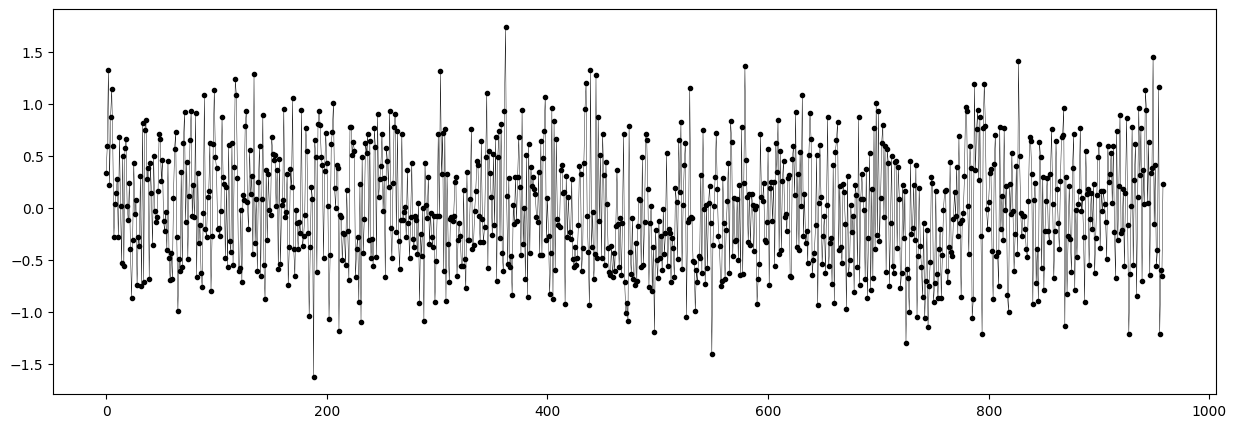

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(residuos_pearson, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.00 de la prueba Jarque-Bera menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

In [ ]:
from scipy.stats import jarque_bera

# Realizar la prueba Jarque-Bera
jb_value, p_value = jarque_bera(residuos_pearson)
print("Valor de la prueba Jarque-Bera: {:.2f}".format(jb_value))
print("P-valor de la prueba Jarque-Bera: {:.2f}".format(p_value))

if p_value > 0.05:
    print("Los residuos siguen una distribución normal (p-value = " + str(p_value) + ")")
else:
    print("Los residuos no siguen una distribución normal (p-value = " + str(p_value) + ")")


Valor de la prueba Jarque-Bera: 15.51
P-valor de la prueba Jarque-Bera: 0.00
Los residuos no siguen una distribución normal (p-value = 0.00042853253931147425)


(array([  3.,  22., 111., 204., 198., 186., 139.,  73.,  20.,   3.]),
 array([-1.62690382, -1.29008726, -0.95327071, -0.61645415, -0.27963759,
         0.05717897,  0.39399553,  0.73081209,  1.06762865,  1.40444521,
         1.74126177]),
 <BarContainer object of 10 artists>)

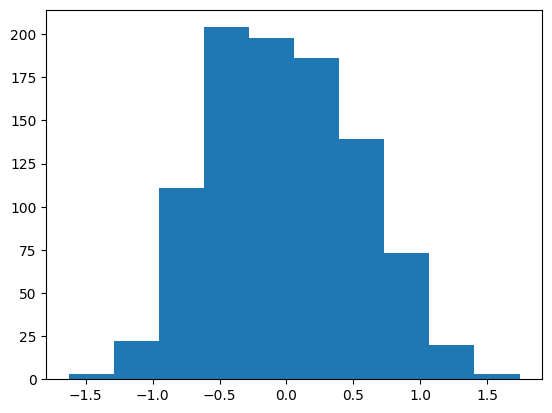

In [ ]:
plt.hist(residuos_pearson)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.37 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(residuos_pearson, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -0.8927842554008777
P-value:  0.37219692181616004


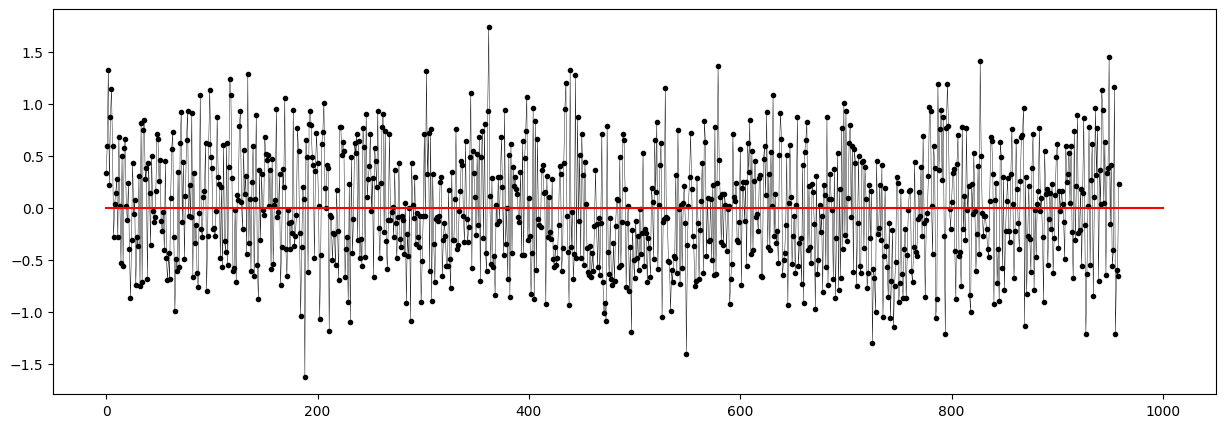

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(residuos_pearson, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.00 de una prueba Breuschpagan menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, no se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(residuos_pearson, X_test)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 15.625622886954572),
 ('p-value', 0.0035649511250987506),
 ('f-value', 3.1603241715708243),
 ('f p-value', 0.007765286800456337)]

No obstante, al revisar el modelo, es posible observar que la varianza de los errores realmente se podría considerar homocedástica.

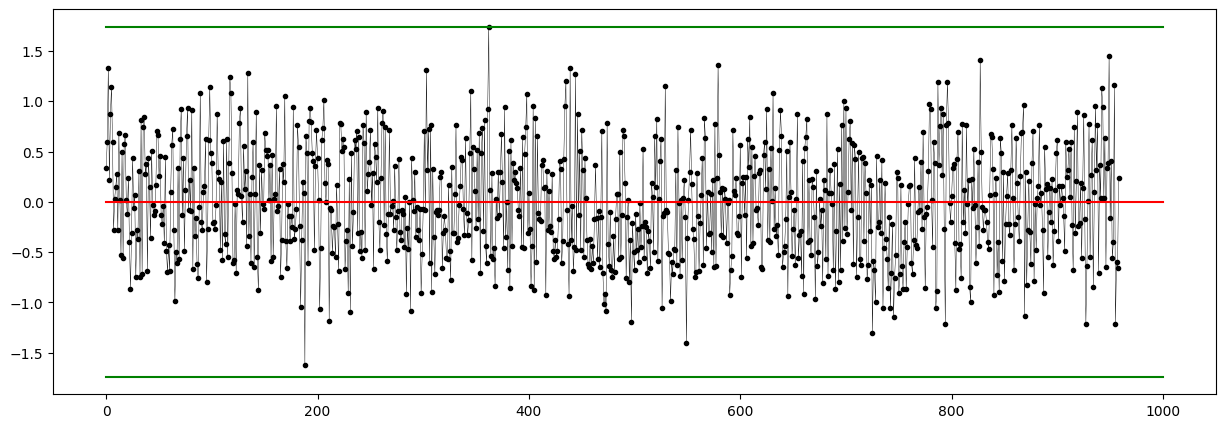

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(residuos_pearson)

plt.figure(figsize = (15, 5))
plt.plot(residuos_pearson, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Validación de supuestos para el modelo de Kendall:**


In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_kendall) + intercepto_kendall
residuos_kendall = y_test - y_pred
residuos_kendall=residuos_kendall.reset_index()
residuos_kendall=residuos_kendall["Densidad"]

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.93 de la prueba Durbin-Watson que está entre 1.5 y 2.5, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que exista autocorrelación entre los errores. Es decir, se podría asumir que no hay autocorrelación en los errores.

In [ ]:
# Calcular la prueba de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos_kendall)

print("Prueba de Durbin-Watson:", dw)

Prueba de Durbin-Watson: 1.9372348297141813


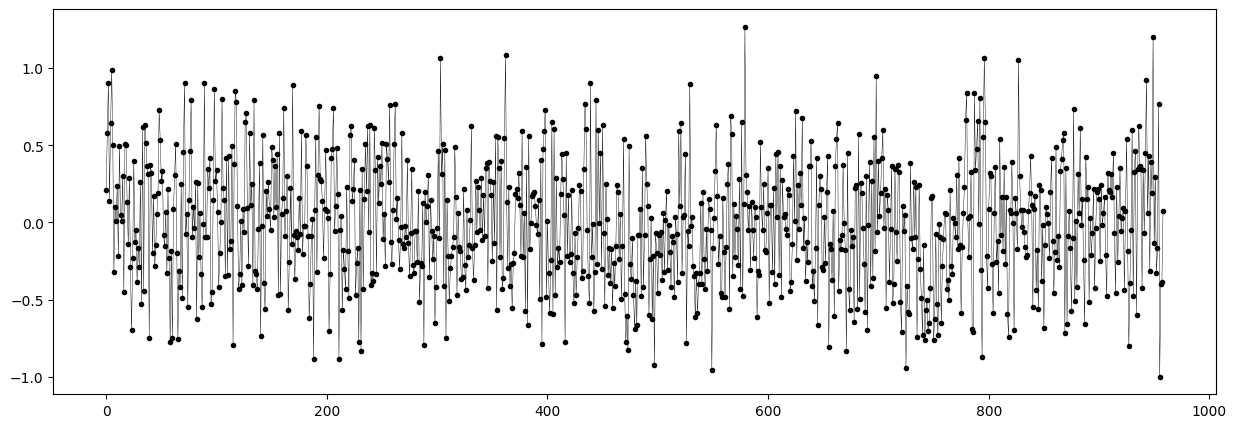

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(residuos_kendall, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.016 de la prueba Jarque-Bera menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

In [ ]:
from scipy.stats import jarque_bera

# Realizar la prueba Jarque-Bera
jb_value, p_value = jarque_bera(residuos_kendall)
print("Valor de la prueba Jarque-Bera: {:.2f}".format(jb_value))
print("P-valor de la prueba Jarque-Bera: {:.2f}".format(p_value))

if p_value > 0.05:
    print("Los residuos siguen una distribución normal (p-value = " + str(p_value) + ")")
else:
    print("Los residuos no siguen una distribución normal (p-value = " + str(p_value) + ")")

Valor de la prueba Jarque-Bera: 8.15
P-valor de la prueba Jarque-Bera: 0.02
Los residuos no siguen una distribución normal (p-value = 0.016988599657447343)


(array([ 19.,  69., 139., 176., 212., 169., 107.,  49.,  13.,   6.]),
 array([-1.00008191, -0.77321214, -0.54634236, -0.31947258, -0.09260281,
         0.13426697,  0.36113675,  0.58800652,  0.8148763 ,  1.04174608,
         1.26861585]),
 <BarContainer object of 10 artists>)

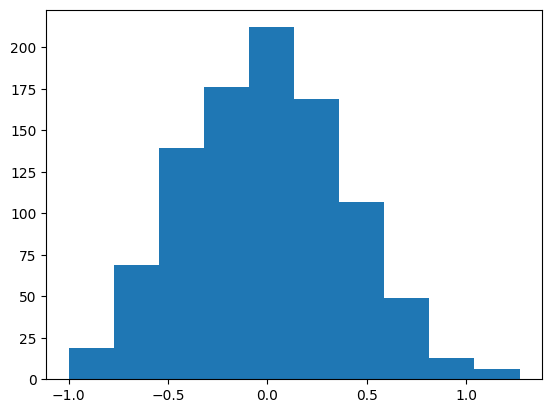

In [ ]:
plt.hist(residuos_kendall)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.42 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(residuos_kendall, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -0.7994089826739118
P-value:  0.42425146206347686


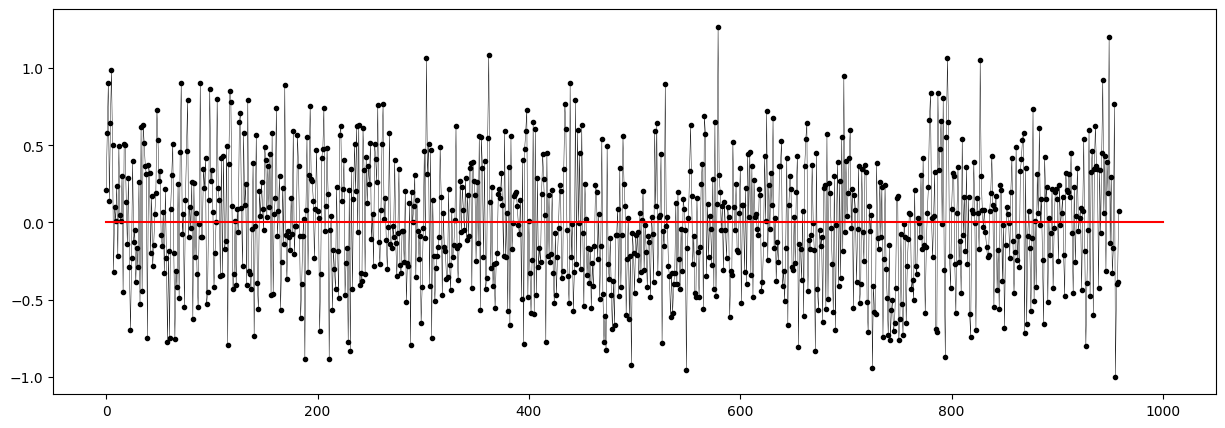

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(residuos_kendall, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.84 de una prueba Breuschpagan mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(residuos_kendall, X_test)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 2.0038400451480873),
 ('p-value', 0.735052545944876),
 ('f-value', 0.399513286064072),
 ('f p-value', 0.8493369084565359)]

Al revisar el modelo, es posible observar que la varianza de los errores realmente se podría considerar homocedástica.

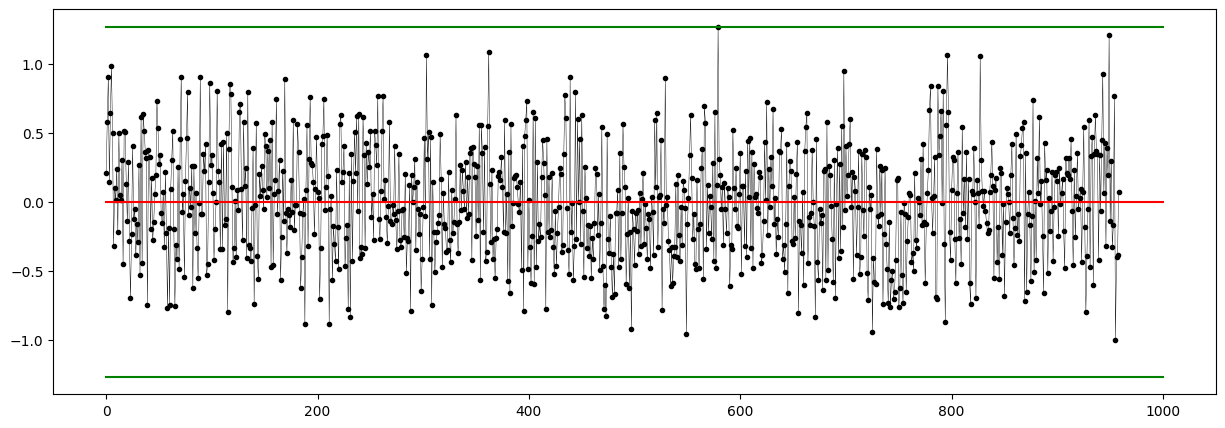

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(residuos_kendall)

plt.figure(figsize = (15, 5))
plt.plot(residuos_kendall, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Validación de supuestos para el modelo de Spearman:**





In [ ]:
# Obtener los residuos del modelo ajustado
y_pred = np.dot(X_test, betas_spearman) + intercepto_spearman
residuos_spearman = y_test - y_pred
residuos_spearman=residuos_spearman.reset_index()
residuos_spearman=residuos_spearman["Densidad"]

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.93 de la prueba Durbin-Watson que está entre 1.5 y 2.5, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que exista autocorrelación entre los errores. Es decir, se podría asumir que no hay autocorrelación en los errores.

In [ ]:
# Calcular la prueba de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos_spearman)

print("Prueba de Durbin-Watson:", dw)

Prueba de Durbin-Watson: 1.936520127499518


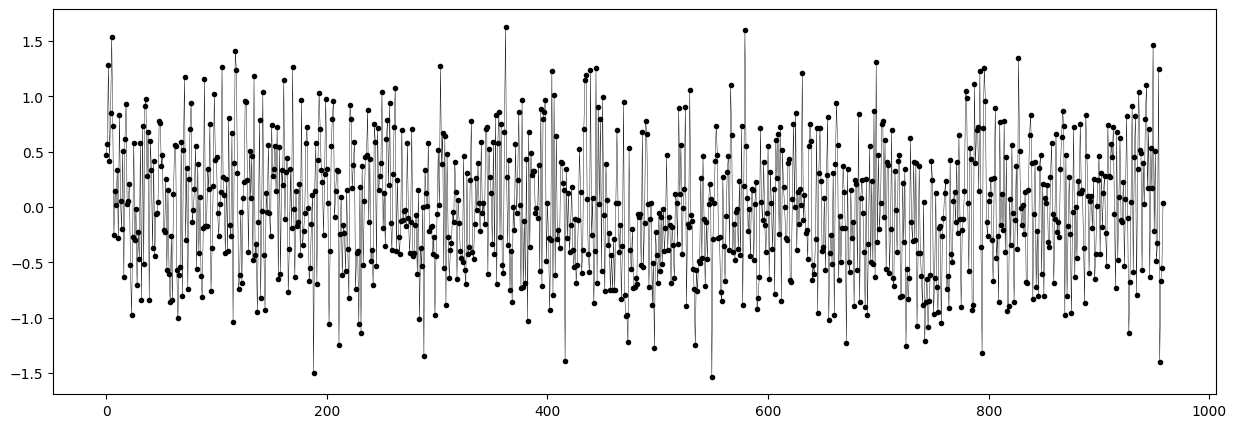

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(residuos_spearman, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.00 de la prueba Jarque-Bera menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

In [ ]:
from scipy.stats import jarque_bera

# Realizar la prueba Jarque-Bera
jb_value, p_value = jarque_bera(residuos_spearman)
print("Valor de la prueba Jarque-Bera: {:.2f}".format(jb_value))
print("P-valor de la prueba Jarque-Bera: {:.2f}".format(p_value))

if p_value > 0.05:
    print("Los residuos siguen una distribución normal (p-value = " + str(p_value) + ")")
else:
    print("Los residuos no siguen una distribución normal (p-value = " + str(p_value) + ")")

Valor de la prueba Jarque-Bera: 13.27
P-valor de la prueba Jarque-Bera: 0.00
Los residuos no siguen una distribución normal (p-value = 0.0013148847938893064)


(array([ 12.,  33., 125., 167., 199., 162., 130.,  94.,  30.,   7.]),
 array([-1.53202552, -1.21601141, -0.89999731, -0.58398321, -0.26796911,
         0.04804499,  0.3640591 ,  0.6800732 ,  0.9960873 ,  1.3121014 ,
         1.62811551]),
 <BarContainer object of 10 artists>)

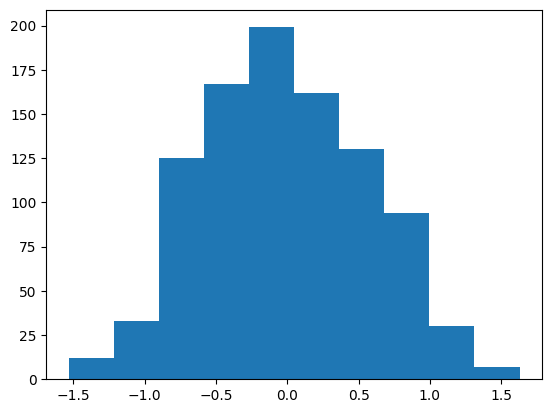

In [ ]:
plt.hist(residuos_spearman)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.46 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(residuos_spearman, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -0.734831530333693
P-value:  0.46262193634784066


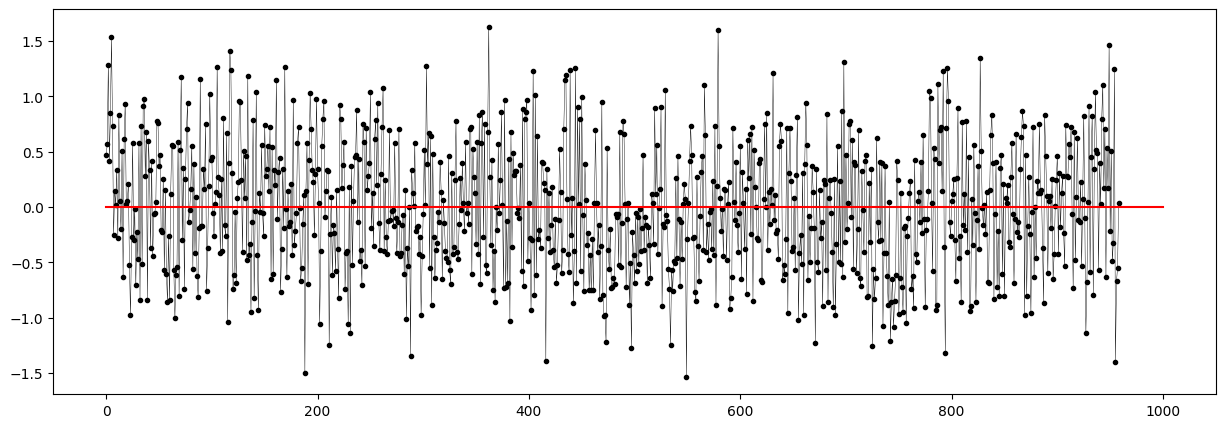

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(residuos_spearman, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.43 de una prueba Breuschpagan mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(residuos_spearman, X_test)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 4.881928676964283),
 ('p-value', 0.29962829912895855),
 ('f-value', 0.9762649084647932),
 ('f p-value', 0.43113432585265754)]

Al revisar el modelo, es posible observar que la varianza de los errores realmente se podría considerar homocedástica.

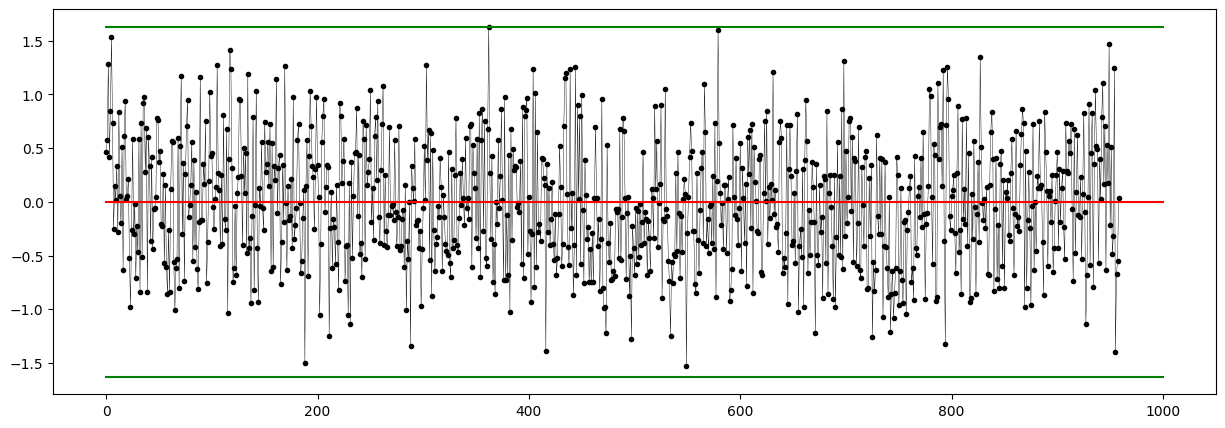

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(residuos_spearman)

plt.figure(figsize = (15, 5))
plt.plot(residuos_spearman, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Análisis:**

De acuerdo con los supuestos calculados, aunque algunas de ellas son similares en los tres modelos, el modelo donde se cumplen todos los supuestos sería el modelo de regresión lineal con varianza robusta de Kendall.

## **Quinta parte:**

### **Gráficos de Dispersión:**

Tomando de referencia el dataset inicial, luego de limpiarse de atípicos **Wine_clean** y al graficar las variables en un gráfico de dispersión contra la variable objetivo, se evidencian las variables con relación lineal (Azúcar residual y Alcohol) y las que evidentemente no se observa una relación lineal fuerte (Ácido cítrico, Dióxido de Azúfre Libre y Dióxido de Azúfre Total). Ahora bien, incluso las variables con relación lineal, tienen caracteristicas particulares, se observa valores de dispersión altos iniciales que se van haciendo cada vez más pequeños en la medida que crece la variable independiente. Es decir, se forman conos en vez de elipses.

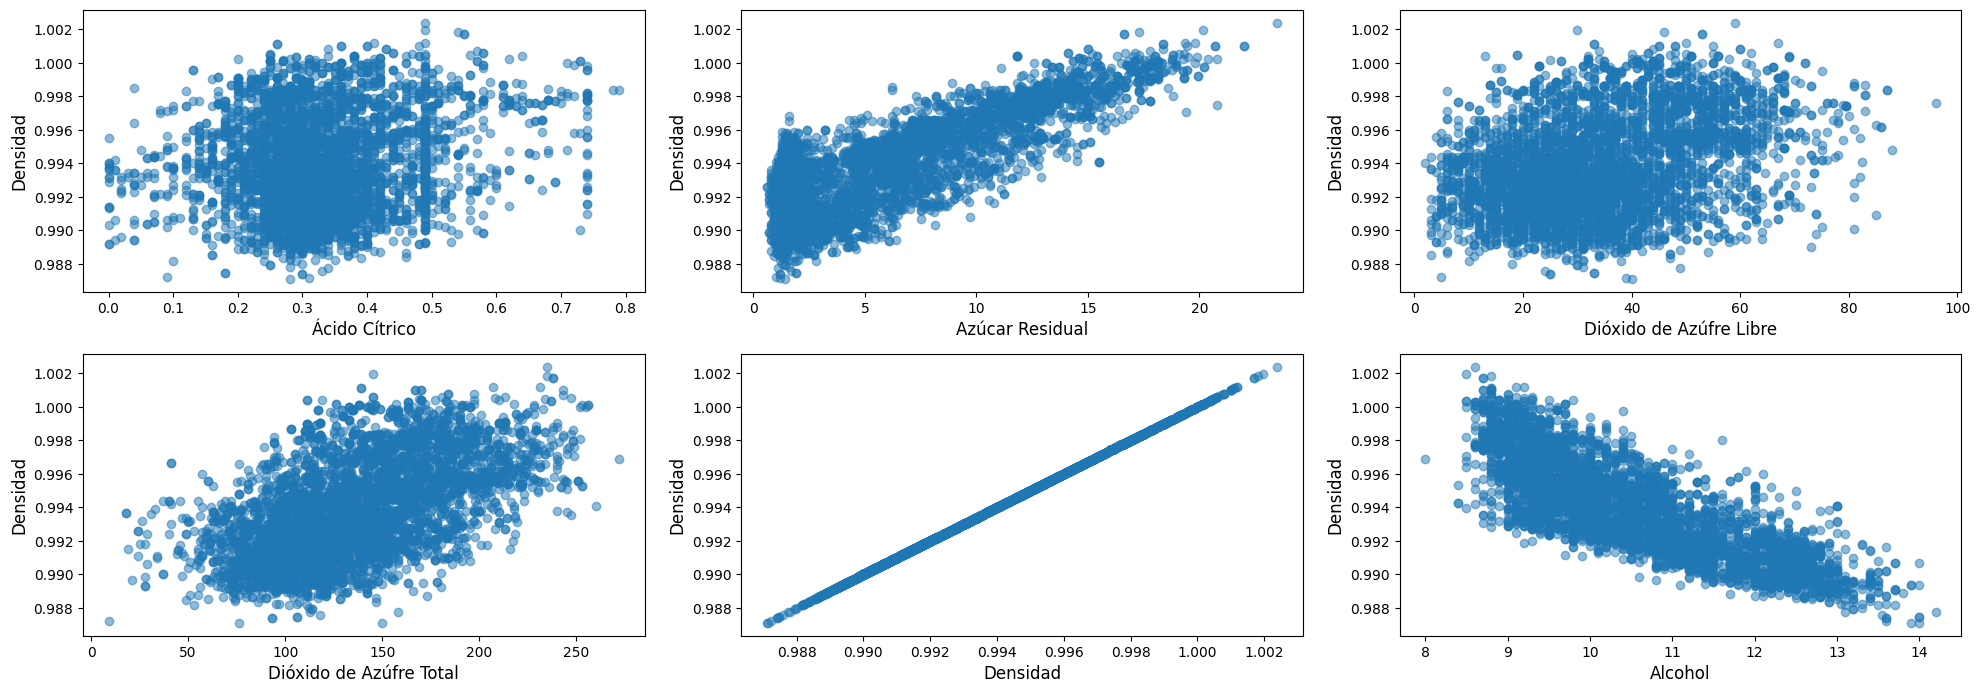

In [ ]:
Y = wine_clean['Densidad']

plt.figure(figsize = (20, 10))
plotnumber = 1

for col in wine_clean.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        plt.scatter(wine_clean[col], Y, alpha = 0.5)
        plt.xlabel(col, fontsize = 12)
        plt.ylabel("Densidad", fontsize = 12)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### **Transformación Box-Cox:**

Partiendo del gráfico de dispersión anterior, se hará una transformación Box-Cox, es una técnica de transformación de datos que se utiliza comúnmente para corregir violaciones del supuesto de normalidad y homogeneidad de la varianza en modelos de regresión.

La transformación Box-Cox utiliza una función matemática que permite transformar los datos en una forma que se acerque más a una distribución normal y que tenga una varianza constante.  

In [ ]:
from scipy import stats

# Aplicar la transformación Box-Cox a la variable 'Sales'
wine_clean['Densidad_boxcox'], lam = stats.boxcox(wine_clean['Densidad'])

# Imprimir el valor óptimo de lambda
print('Valor óptimo de lambda:', lam)


Valor óptimo de lambda: -40.857926078999036


La función boxcox devuelve dos valores: el arreglo transformado y el valor óptimo de lambda. En este ejemplo, guardamos el arreglo transformado en una nueva columna llamada 'Densidad_boxcox' y el valor óptimo de lambda en la variable 'lam'. Finalmente, imprimimos el valor óptimo de lambda.

Es importante tener en cuenta que la transformación Box-Cox debe aplicarse antes de ajustar el modelo de regresión y que los coeficientes del modelo deben ser transformados de nuevo a la escala original después de ajustar el modelo.

### **Modelo de regresión lineal:**

Se ajusta la transformación anterior a un modelo de RLM (regresión lineal múltiple) con OLS y se quita la variable de Dióxido de Azúfre Total dado que presenta problemas de multicolinealidad con otras variables.

In [ ]:
import statsmodels.api as sm

# Separar los datos en variables predictoras (X) y variable objetivo (y)
X = wine_clean.drop(['Densidad', 'Densidad_boxcox', 'Dióxido de Azúfre Total'], axis=1)
y = wine_clean['Densidad_boxcox']

# Añadir una constante a X para ajustar el intercepto del modelo
X = sm.add_constant(X)

# Ajustar un modelo de regresión lineal OLS
model = sm.OLS(y, X)
results = model.fit()

# Imprimir un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Densidad_boxcox   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        02:11:16   Log-Likelihood:                 26053.
No. Observations:                4792   AIC:                        -5.210e+04
Df Residuals:                    4787   BIC:                        -5.206e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Calcular la raiz del error cuadrático medio (sqrt(MSE))
rmse = np.sqrt(np.mean((results.resid) ** 2))
print("RMSE:", rmse)

RMSE: 0.0010534541906567201


Este modelo tiene un **R²** ajustado de 0.92, es decir, el modelo es capaz de explicar el 92% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

El valor P de la **significancia de tener un modelo** (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Además, el **RMSE** del modelo es muy bajo, es decir, tiene muy buen potencial de predicción, aunque no sirva para analizar inferencialmente los coeficientes.

Al revisar los valores P de los **coeficiente de las variables**, se encuentra que son **significativos** (valor P < alpha de 0.05), dado que este modelo tiene una transformación de la variable Y que si bien nos da un buen ajuste lineal, hace que se pierda interpretación de los coeficientes. 

Posteriormente, se procede a validar los supuestos del modelo, resultado que se presenta a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.36 de la prueba Durbin-Watson que no está entre 1.5 y 2.5, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que existe autocorrelación entre los errores. 

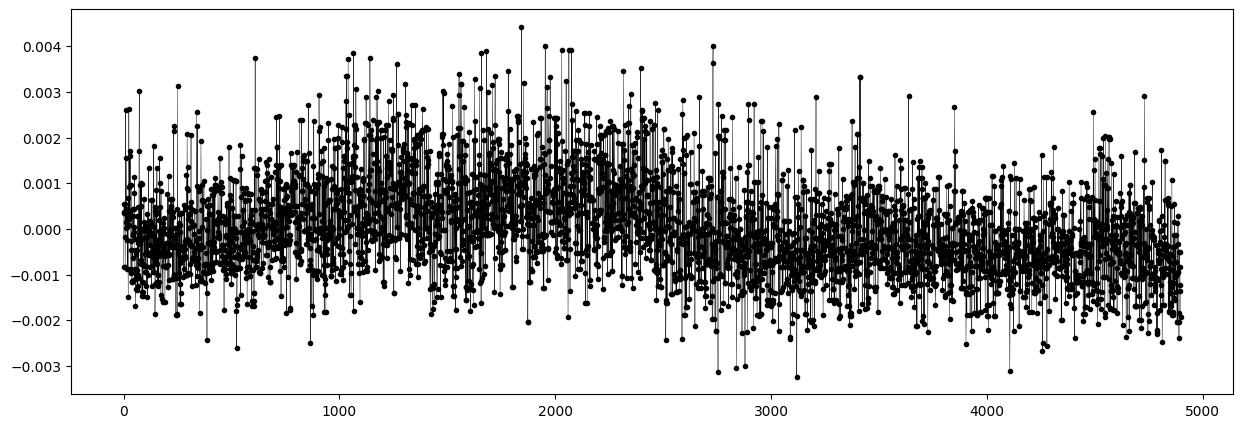

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.00 de la prueba Jarque-Bera mayor que (<) un alpha de 0.05, no es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

(array([  12.,  146.,  700., 1430., 1251.,  734.,  331.,  142.,   34.,
          12.]),
 array([-0.00323968, -0.00247308, -0.00170649, -0.00093989, -0.00017329,
         0.0005933 ,  0.0013599 ,  0.0021265 ,  0.00289309,  0.00365969,
         0.00442629]),
 <BarContainer object of 10 artists>)

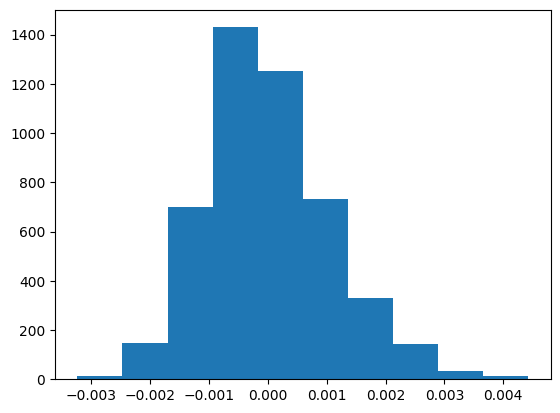

In [ ]:
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.99 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -5.601942792056731e-13
P-value:  0.999999999999553


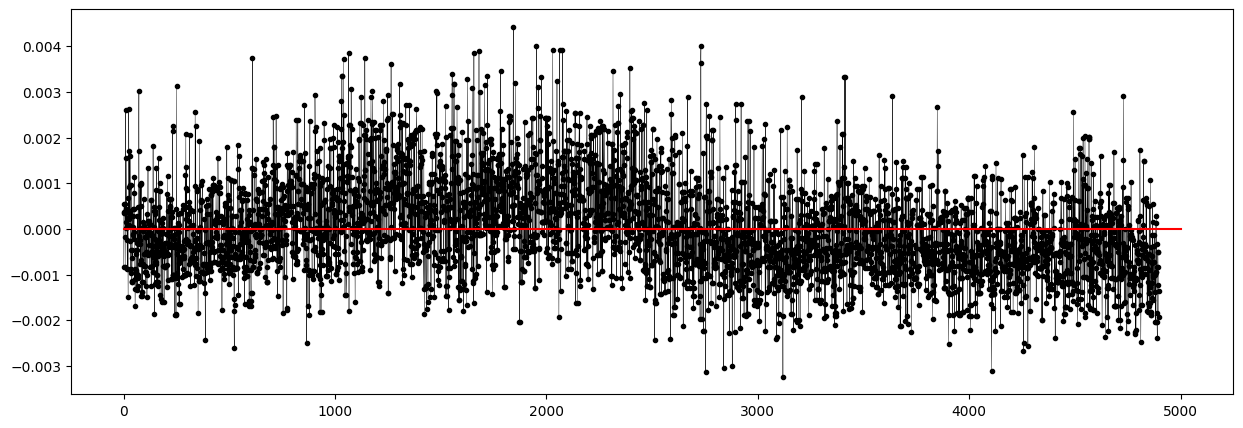

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,5000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.00 de una prueba Breuschpagan mayor que (>=) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, no se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 145.25106686380673),
 ('p-value', 2.1191419053502245e-30),
 ('f-value', 37.40878122974883),
 ('f p-value', 7.434077556615931e-31)]

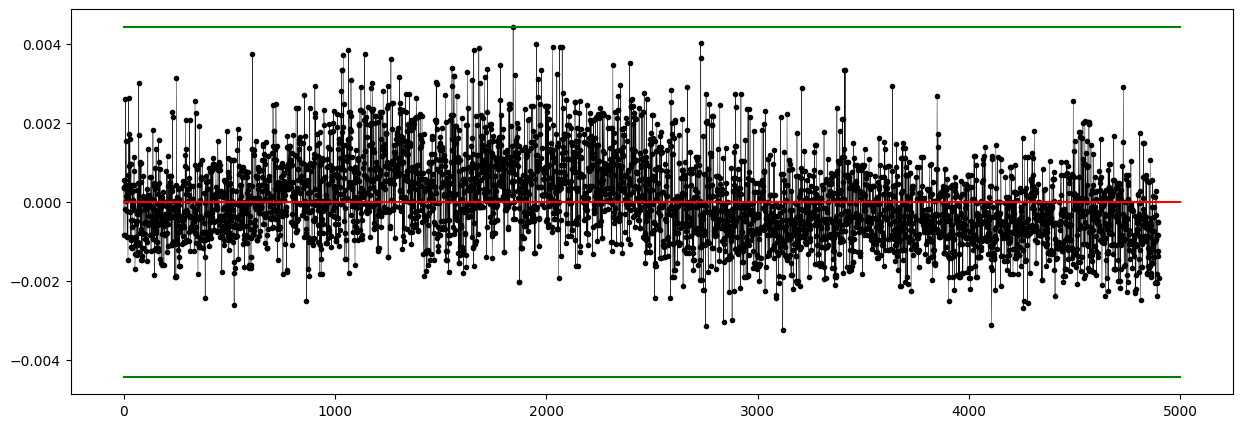

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,5000], [0,0], color = "red")
plt.plot([0,5000], [mx,mx], color = "green")
plt.plot([0,5000], [-mx,-mx], color = "green")

plt.show()

### **Análisis**:

Si bien, una transformación Box-Cox de los datos brinda un R2 muy alto del 92% y en RMSE muy bajo, muchos supuestos no se cumplen. No obstante, se tiene un modelo con una gran capacidad predictiva, pero poca interpretabilidad inferencial. Si este modelo fuse a usarse solamente para predicción, es posible obviar la falta de interpretabilidad.

### **Transformación inversa:**

Para transformar los coeficientes del modelo de vuelta a la escala original, podemos utilizar la siguiente fórmula: 

    beta_original = beta_boxcox / lambda + 1 - lambda

donde:

* **beta_original**: el coeficiente del modelo en la escala original de la variable objetivo.
* **beta_boxcox**: el coeficiente del modelo ajustado en la escala transformada de la variable objetivo.
* **lambda**: el parámetro de la transformación Box-Cox.

In [ ]:
# Transformar los coeficientes del modelo de vuelta a la escala original
betas_boxcox = results.params
betas_original = np.empty(len(betas_boxcox))

for i in range(len(betas_boxcox)):
    if i == 0:
        betas_original[i] = betas_boxcox[i]
        print('Intercepto:', betas_original[i])
    else:
        betas_original[i] = betas_boxcox[i] / lam + 1 - lam
        print(X.columns[i] + ':', betas_original[i])

# Imprimir los coeficientes del modelo en la escala original
print('Coeficientes del modelo en la escala original:')
print(betas_original)

Intercepto: 0.007753031176692524
Ácido Cítrico: 41.857882353557414
Azúcar Residual: 41.857915957357115
Dióxido de Azúfre Libre: 41.857926168555316
Alcohol: 41.857967736210725
Coeficientes del modelo en la escala original:
[7.75303118e-03 4.18578824e+01 4.18579160e+01 4.18579262e+01
 4.18579677e+01]




---



# **Punto 4: Base de datos publicidad**

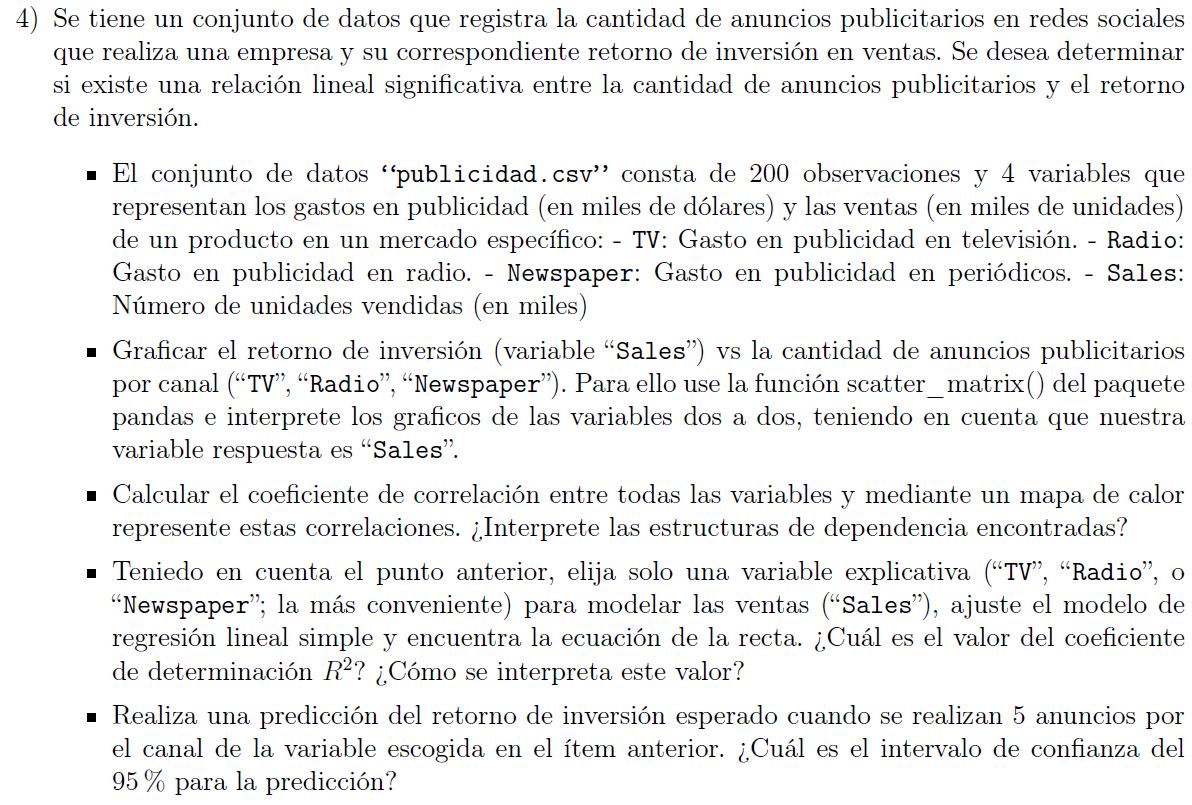

# **Resultados:**

In [ ]:
URL = "https://raw.githubusercontent.com/GARF1094/AC_U.ICESI_202301/main/publicidad.csv" 
publicidad = pd.read_csv(URL)
publicidad = publicidad.drop(["Unnamed: 0"], axis = 1)

publicidad.head(3)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3

## **Primera parte:**

### **EDA: Análisis Exploratorio de Datos**

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
publicidad.shape

(200, 4)

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
publicidad.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(publicidad)

TV       Radio   Newspaper       Sales
count            200.000000  200.000000  200.000000  200.000000
mean             147.042500   23.264000   30.554000   14.022500
std               85.854236   14.846809   21.778621    5.217457
min                0.700000    0.000000    0.300000    1.600000
25%               74.375000    9.975000   12.750000   10.375000
50%              149.750000   22.900000   25.750000   12.900000
75%              218.825000   36.525000   45.100000   17.400000
max              296.400000   49.600000  114.000000   27.000000
coef. variation    0.583874    0.638188    0.712791    0.372077
skew              -0.069328    0.093467    0.887996    0.404508
kurtosis          -1.225897   -1.258962    0.603527   -0.428570

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
wine.isnull().sum()/len(wine)*100

Ácido Cítrico              0.0
Azúcar Residual            0.0
Dióxido de Azúfre Libre    0.0
Dióxido de Azúfre Total    0.0
Densidad                   0.0
Alcohol                    0.0
outlier                    0.0
dtype: float64

### **Visualización de Datos:**

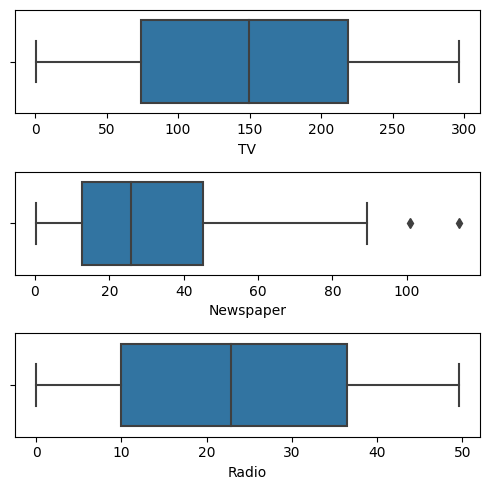

In [ ]:
fig, axs = plt.subplots(figsize=[5, 5], ncols=1, nrows = 3)

# Generar el boxplot utilizando seaborn
ax1 = sns.boxplot(x='TV', data=publicidad, ax = axs[0])
ax2 = sns.boxplot(x='Newspaper', data=publicidad, ax = axs[1])
ax3 = sns.boxplot(x='Radio', data=publicidad, ax = axs[2])

# Mostrar el boxplot
fig.tight_layout()
plt.show()

### **Análisis y tratamiento de Atípicos Multivariantes:**

Antes de construir el modelo, conviene revisar la presencia de datos atípicos en los datos que puedan llegar a afectarlo. Para ello, se calculan las distancias de mahalanobis para identificar los atípicos multivariantes existentes:

In [ ]:
x = publicidad
x_menos_mu = x - np.mean(x)  ### Calculando los datos menos la media
cov = x.cov()                ### Calculando la covarianza
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
D_h = mahal.diagonal()

### Definimos un Cot-off
from scipy.stats import chi2
alpha = 0.01
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))
C

x["outlier"] = np.zeros(x.shape[0])
x.loc[D_h > C, "outlier"] = 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-114-d842e87b917a>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente


In [ ]:
# Calculando el número de outliers y cuánto representan de los datos totales:
print("Número de outliers: ",x["outlier"].sum())
print("Porcentaje de outliers: ",(x["outlier"].sum()/len(x["outlier"]))*100,"%")

Número de outliers:  5.0
Porcentaje de outliers:  2.5 %


Dado que el porcentaje de datos atípicos multivariantes presentes en los datos es bajo (menor al 5%), no se tiene suficiente contexto para su imputación y puesto que no se tiene contexto adicional que permita determinar si su eliminación significaría un alto costo para el negocio, se procede entonces a su eliminación.

In [ ]:
# Se eliminan los datos atípicos al considerarse que representan un porcentaje bajo del total.
publicidad_clean = x.loc[D_h <= C, :]
publicidad_clean = publicidad_clean.drop(["outlier"], axis=1)
publicidad_clean.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

### **Matriz de Dispersión:**

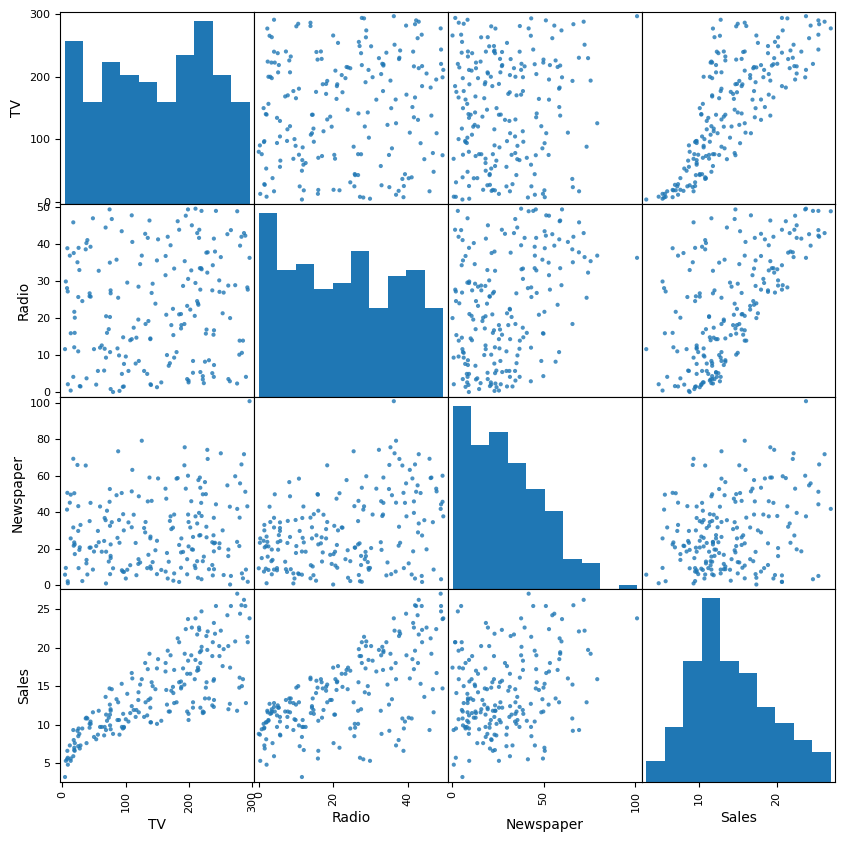

In [ ]:
pd.plotting.scatter_matrix(publicidad_clean, alpha=0.8, figsize=(10, 10), diagonal='hist')

plt.show()

## **Segunda parte:**

### **Correlación entre variables:**

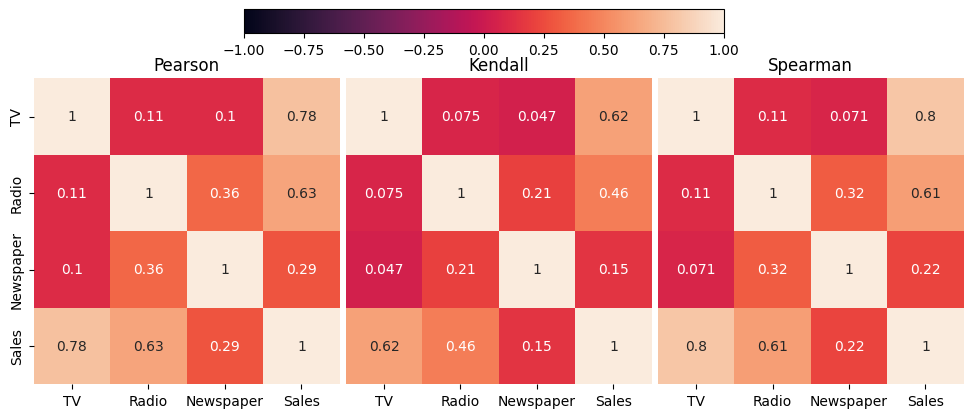

In [ ]:
fig, axs = plt.subplots(figsize=[12, 12], ncols=3)

Pearson_corr_matrix = publicidad_clean.corr(method='pearson') # Calcular la matriz de correlación de Pearson
Kendall_corr_matrix = publicidad_clean.corr(method='kendall') # Calcular la matriz de correlación de Kendall
Spearman_corr_matrix = publicidad_clean.corr(method='spearman') # Calcular la matriz de correlación de Spearman

ax1 = sns.heatmap(Pearson_corr_matrix, annot=True, ax=axs[0], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax1.set_title("Pearson", fontsize=12)

ax2 = sns.heatmap(Kendall_corr_matrix, annot=True, ax=axs[1], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax2.set_title("Kendall", fontsize=12)
ax2.set_yticks([])

ax3 = sns.heatmap(Spearman_corr_matrix, annot=True, ax=axs[2], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax3.set_title("Spearman", fontsize=12)
ax3.set_yticks([])

cbar_ax = fig.add_axes([0.3, 0.66, 0.4, 0.02]) # [left, bottom, width, height]
fig.colorbar(ax1.collections[0], ax=axs, cax=cbar_ax, shrink=0.7, pad=0.05,orientation='horizontal')
fig.subplots_adjust(wspace=0.02)

plt.show()

## **Tercera parte:**

### **Elección de variable explicativa:**

De acuerdo con el gráfico de correlación anterior, se ha escogido como variable predictora aquella con mayor correlación en los 3 métodos, que es la variable "TV".

### **Modelo de Regresión Lineal Simple:**

In [ ]:
import statsmodels.api as sm

# Ejecutando un modelo líneal (Regresión simple)
X = sm.add_constant(publicidad_clean.drop(['Sales','Radio','Newspaper'], axis=1)) ## Variable explicativas TV
model = sm.OLS(publicidad_clean["Sales"], X) ## Variable dependiente
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     299.9
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.69e-41
Time:                        21:52:04   Log-Likelihood:                -504.97
No. Observations:                 195   AIC:                             1014.
Df Residuals:                     193   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0795      0.470     15.048      0.0

Este modelo tiene un **R²** ajustado de 0.60, es decir, el modelo es capaz de explicar el 60% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

El valor P de la **significancia de tener un modelo** (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Al revisar los valores P de los **coeficiente de las variables**, se encuentra que son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable obejtivo varía en promedio tantas unidades como indica la pendiente. Para este ejemplo, por cada unidad que aumenta el predictor X, la variable Y aumenta en promedio 0.05 unidades, manteniéndose constantes el resto de predictores. 

Posteriormente, se procede a validar los supuestos del modelo, resultado que se presenta a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.97 de la prueba Durbin-Watson que está entre 1.5 y 2.5, es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que existe autocorrelación entre los errores.

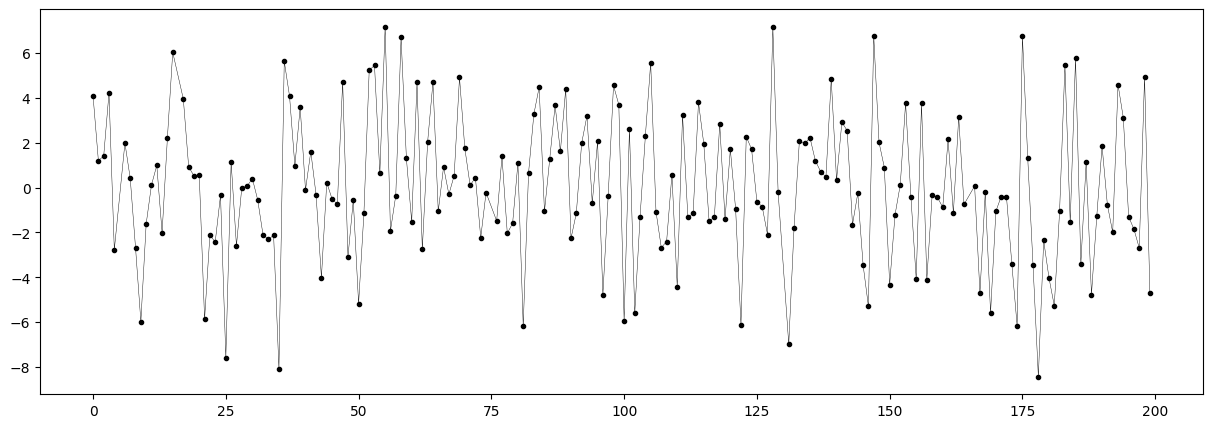

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.78 de la prueba Jarque-Bera mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

(array([ 4.,  8., 13., 17., 40., 40., 32., 16., 17.,  8.]),
 array([-8.43035481, -6.87059193, -5.31082905, -3.75106617, -2.19130329,
        -0.63154041,  0.92822247,  2.48798536,  4.04774824,  5.60751112,
         7.167274  ]),
 <BarContainer object of 10 artists>)

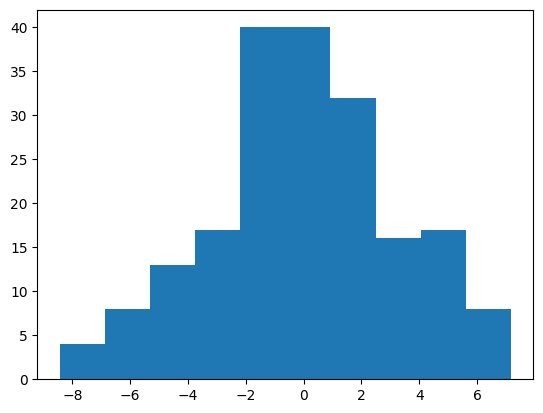

In [ ]:
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.99 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  2.0621565309279166e-14
P-value:  0.9999999999999836


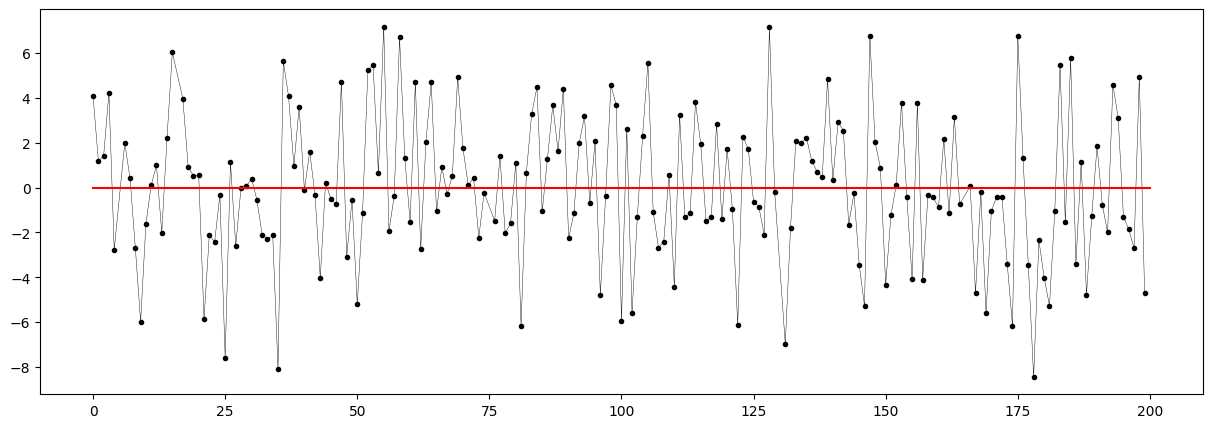

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,200], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.00 de una prueba Breuschpagan menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, no se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Largrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Largrange multiplier statistic', 48.654701353226436),
 ('p-value', 3.052357234346705e-12),
 ('f-value', 64.1657603490068),
 ('f p-value', 1.0575590933402332e-13)]

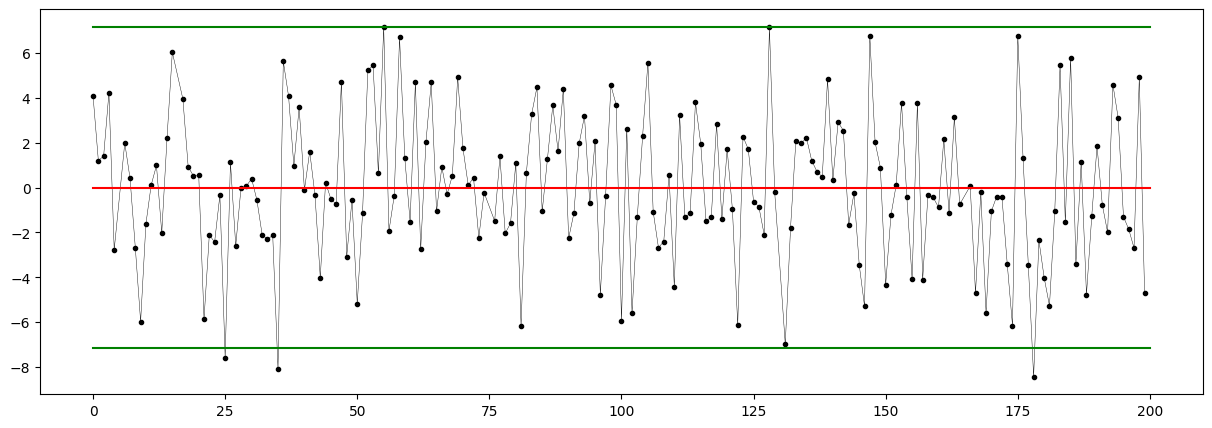

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,200], [0,0], color = "red")
plt.plot([0,200], [mx,mx], color = "green")
plt.plot([0,200], [-mx,-mx], color = "green")

plt.show()

Se viola uno de los supuestos, el de homocedasticidad. Es posible corregirlo aplicando una transformación a la variable predictora o utilizando un método más robusto.

### **Calculando la recta de regresión:**

In [ ]:
# Extraer los parámetros
intercepto = results.params[0]
pendiente_x = results.params[1]

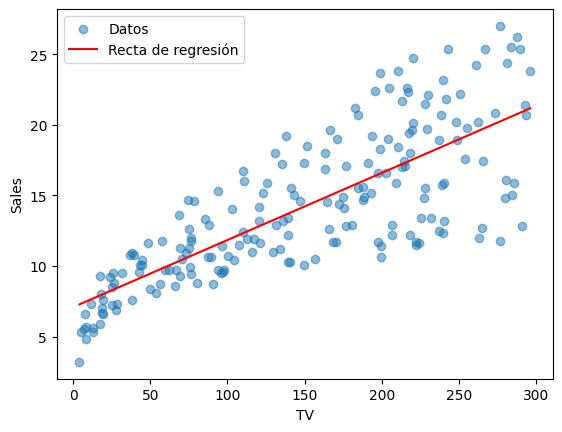

In [ ]:
# Graficando la recta generada por el modelo
plt.scatter(publicidad_clean['TV'], publicidad_clean['Sales'], label='Datos', alpha=0.5)
x1_vals = np.linspace(np.min(publicidad_clean['TV']), np.max(publicidad_clean['TV']), 100)
y_vals = intercepto + pendiente_x*x1_vals
plt.plot(x1_vals, y_vals, color='red', label='Recta de regresión')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Análisis**:

El coeficiente de determinación R² es una medida estadística que indica la proporción de la varianza en la variable dependiente que puede ser explicada por la variable independiente en un modelo de regresión.

El valor de R² oscila entre 0 y 1, donde 0 significa que el modelo no explica nada de la varianza en la variable dependiente, y 1 significa que el modelo explica toda la varianza en la variable dependiente. Por lo tanto, cuanto más cercano a 1 sea el valor de R², mejor es el ajuste del modelo y más explicativa es la variable independiente.

Por ejemplo, en este caso en que el valor de R² es de 0,60, significa que el 60% de la varianza en la variable dependiente "Sales" puede ser explicada por la variable independiente "TV" en el modelo de regresión. Esto sugiere que el modelo es un ajuste moderado para los datos y que la variable independiente es una buena explicación (aunque probablemente no la mejor) para la variabilidad en la variable dependiente.

En resumen, el coeficiente de determinación R² es una medida importante para evaluar la calidad de un modelo de regresión y se interpreta como la proporción de la varianza en la variable dependiente que puede ser explicada por la variable independiente.

## **Cuarta parte:**

### **Predicción:**

In [ ]:
x1_vals = 5
y_vals = intercepto + pendiente_x*x1_vals
print("Una inversión de 5 anuncios en TV, corresponde a un retorno en ventas de ",round(y_vals,2)," veces la inversión")

Una inversión de 5 anuncios en TV, corresponde a un retorno en ventas de  7.32  veces la inversión




---



# **Punto 5: Base de datos Concrete_Data**

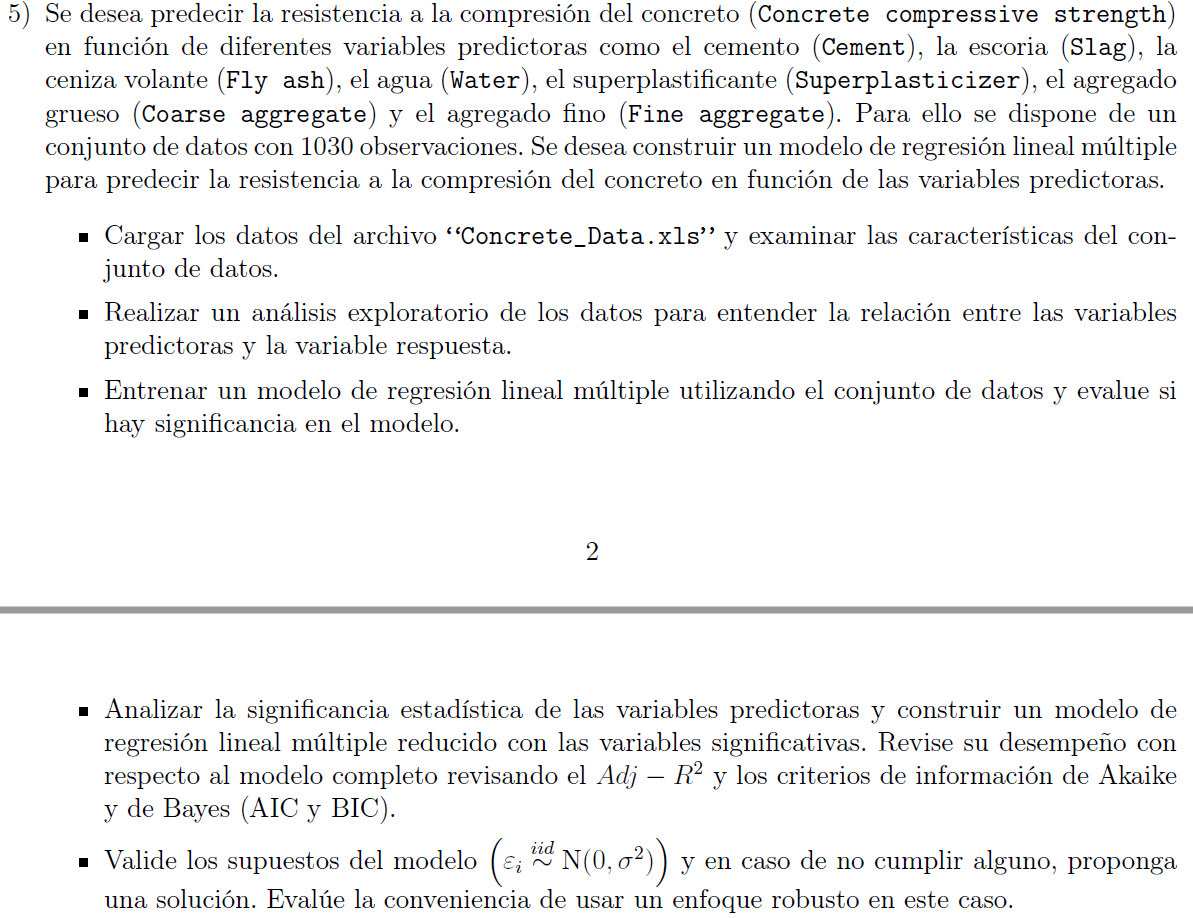

# **Resultados:**

In [ ]:
URL = "https://raw.githubusercontent.com/GARF1094/AC_U.ICESI_202301/main/Concrete_Data.xls" 
concreto=pd.read_excel(URL)

concreto.head(5)

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

## **Primera y segunda parte:**

### **EDA: Análisis Exploratorio de Datos**

In [ ]:
# Revisión de la forma de la matriz en términos de filas y columnas.
concreto.shape

(1030, 9)

In [ ]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
concreto.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [ ]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

fun_tabla_descriptivas(concreto)

Cement (component 1)(kg in a m^3 mixture)  \
count                                          1030.000000   
mean                                            281.165631   
std                                             104.507142   
min                                             102.000000   
25%                                             192.375000   
50%                                             272.900000   
75%                                             350.000000   
max                                             540.000000   
coef. variation                                   0.371692   
skew                                              0.508775   
kurtosis                                         -0.523959   

                 Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                                  1030.000000       
mean                                                     73.895485       
std                                                      86.279104       
min                                                       0.000000       
25%                                                       0.000000       
50%                                                      22.000000       
75%                                                     142.950000       
max                                                     359.400000       
coef. variation                                           1.167583       
skew                                                      0.799571       
kurtosis                                                 -0.511495       

                 Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                           1030.000000   
mean                                              54.187136   
std                                               63.996469   
min                                                0.000000   
25%                                                0.000000   
50%                                                0.000000   
75%                                              118.270000   
max                                              200.100000   
coef. variation                                    1.181027   
skew                                               0.536662   
kurtosis                                          -1.327884   

                 Water  (component 4)(kg in a m^3 mixture)  \
count                                          1030.000000   
mean                                            181.566359   
std                                              21.355567   
min                                             121.750000   
25%                                             164.900000   
50%                                             185.000000   
75%                                             192.000000   
max                                             247.000000   
coef. variation                                   0.117619   
skew                                              0.074216   
kurtosis                                          0.116262   

                 Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                                  1030.000000     
mean                                                      6.203112     
std                                                       5.973492     
min                                                       0.000000     
25%                                                       0.000000     
50%                                                       6.350000     
75%                                                      10.160000     
max                                                      32.200000     
coef. variation                                           0.962983     
skew                                                      0.906790     
kurtosis                                                  1.400515     

                

In [ ]:
# Revisión del porcentaje de datos nulos en cada una de las variables
concreto.isnull().sum()/len(concreto)*100

Cement (component 1)(kg in a m^3 mixture)                0.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.0
Fly Ash (component 3)(kg in a m^3 mixture)               0.0
Water  (component 4)(kg in a m^3 mixture)                0.0
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.0
Age (day)                                                0.0
Concrete compressive strength(MPa, megapascals)          0.0
dtype: float64

### **Análisis de Datos Atípicos Multivariantes:**

Antes de construir el modelo, conviene revisar la presencia de datos atípicos en los datos que puedan llegar a afectarlo. Para ello, se calculan las distancias de mahalanobis para identificar los atípicos multivariantes existentes:

In [ ]:
x = concreto
x_menos_mu = x - np.mean(x)  ### Calculando los datos menos la media
cov = x.cov()                ### Calculando la covarianza
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente
D_h = mahal.diagonal()

### Definimos un Cot-off
from scipy.stats import chi2
alpha = 0.05
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))
C

x["outlier"] = np.zeros(x.shape[0])
x.loc[D_h > C, "outlier"] = 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-134-1a980691fddb>:8: RuntimeWarning: invalid value encountered in sqrt
  mahal = np.sqrt(mahal2)                  #### Sacamos raiz para que me queden las distancias directamente


In [ ]:
# Calculando el número de outliers y cuánto representan de los datos totales:
print("Número de outliers: ",x["outlier"].sum())
print("Porcentaje de outliers: ",(x["outlier"].sum()/len(x["outlier"]))*100,"%")

Número de outliers:  97.0
Porcentaje de outliers:  9.41747572815534 %


Dado que el porcentaje de datos atípicos multivariantes presentes en los datos es bajo (menor al 5%), no se tiene suficiente contexto para su imputación y puesto que no se tiene contexto adicional que permita determinar si su eliminación significaría un alto costo para el negocio, se procede entonces a su eliminación.

In [ ]:
# Se eliminan los datos atípicos al considerarse que representan un porcentaje bajo del total.
concreto_clean = x.loc[D_h <= C, :]
concreto_clean = concreto_clean.drop(["outlier"], axis=1)
concreto_clean.head()

Cement (component 1)(kg in a m^3 mixture)  \
1                                      540.0   
5                                      266.0   
7                                      380.0   
8                                      266.0   
9                                      475.0   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
1                                                0.0       
5                                              114.0       
7                                               95.0       
8                                              114.0       
9                                                0.0       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
1                                         0.0   
5                                         0.0   
7                                         0.0   
8                                         0.0   
9                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
1                                      162.0   
5                                      228.0   
7                                      228.0   
8                                      228.0   
9                                      228.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
1                                                2.5     
5                                                0.0     
7                                                0.0     
8                                                0.0     
9                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
1                                             1055.0      
5                                              932.0      
7                                              932.0      
8                                              932.0      
9                                              932.0      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
1                                              676.0         28   
5                                              670.0         90   
7                                              594.0         28   
8                                              670.0         28   
9                                              594.0         28   

   Concrete compressive strength(MPa, megapascals)   
1                                         61.887366  
5                                         47.029847  
7                                         36.447770  
8                                         45.854291  
9                                         39.289790

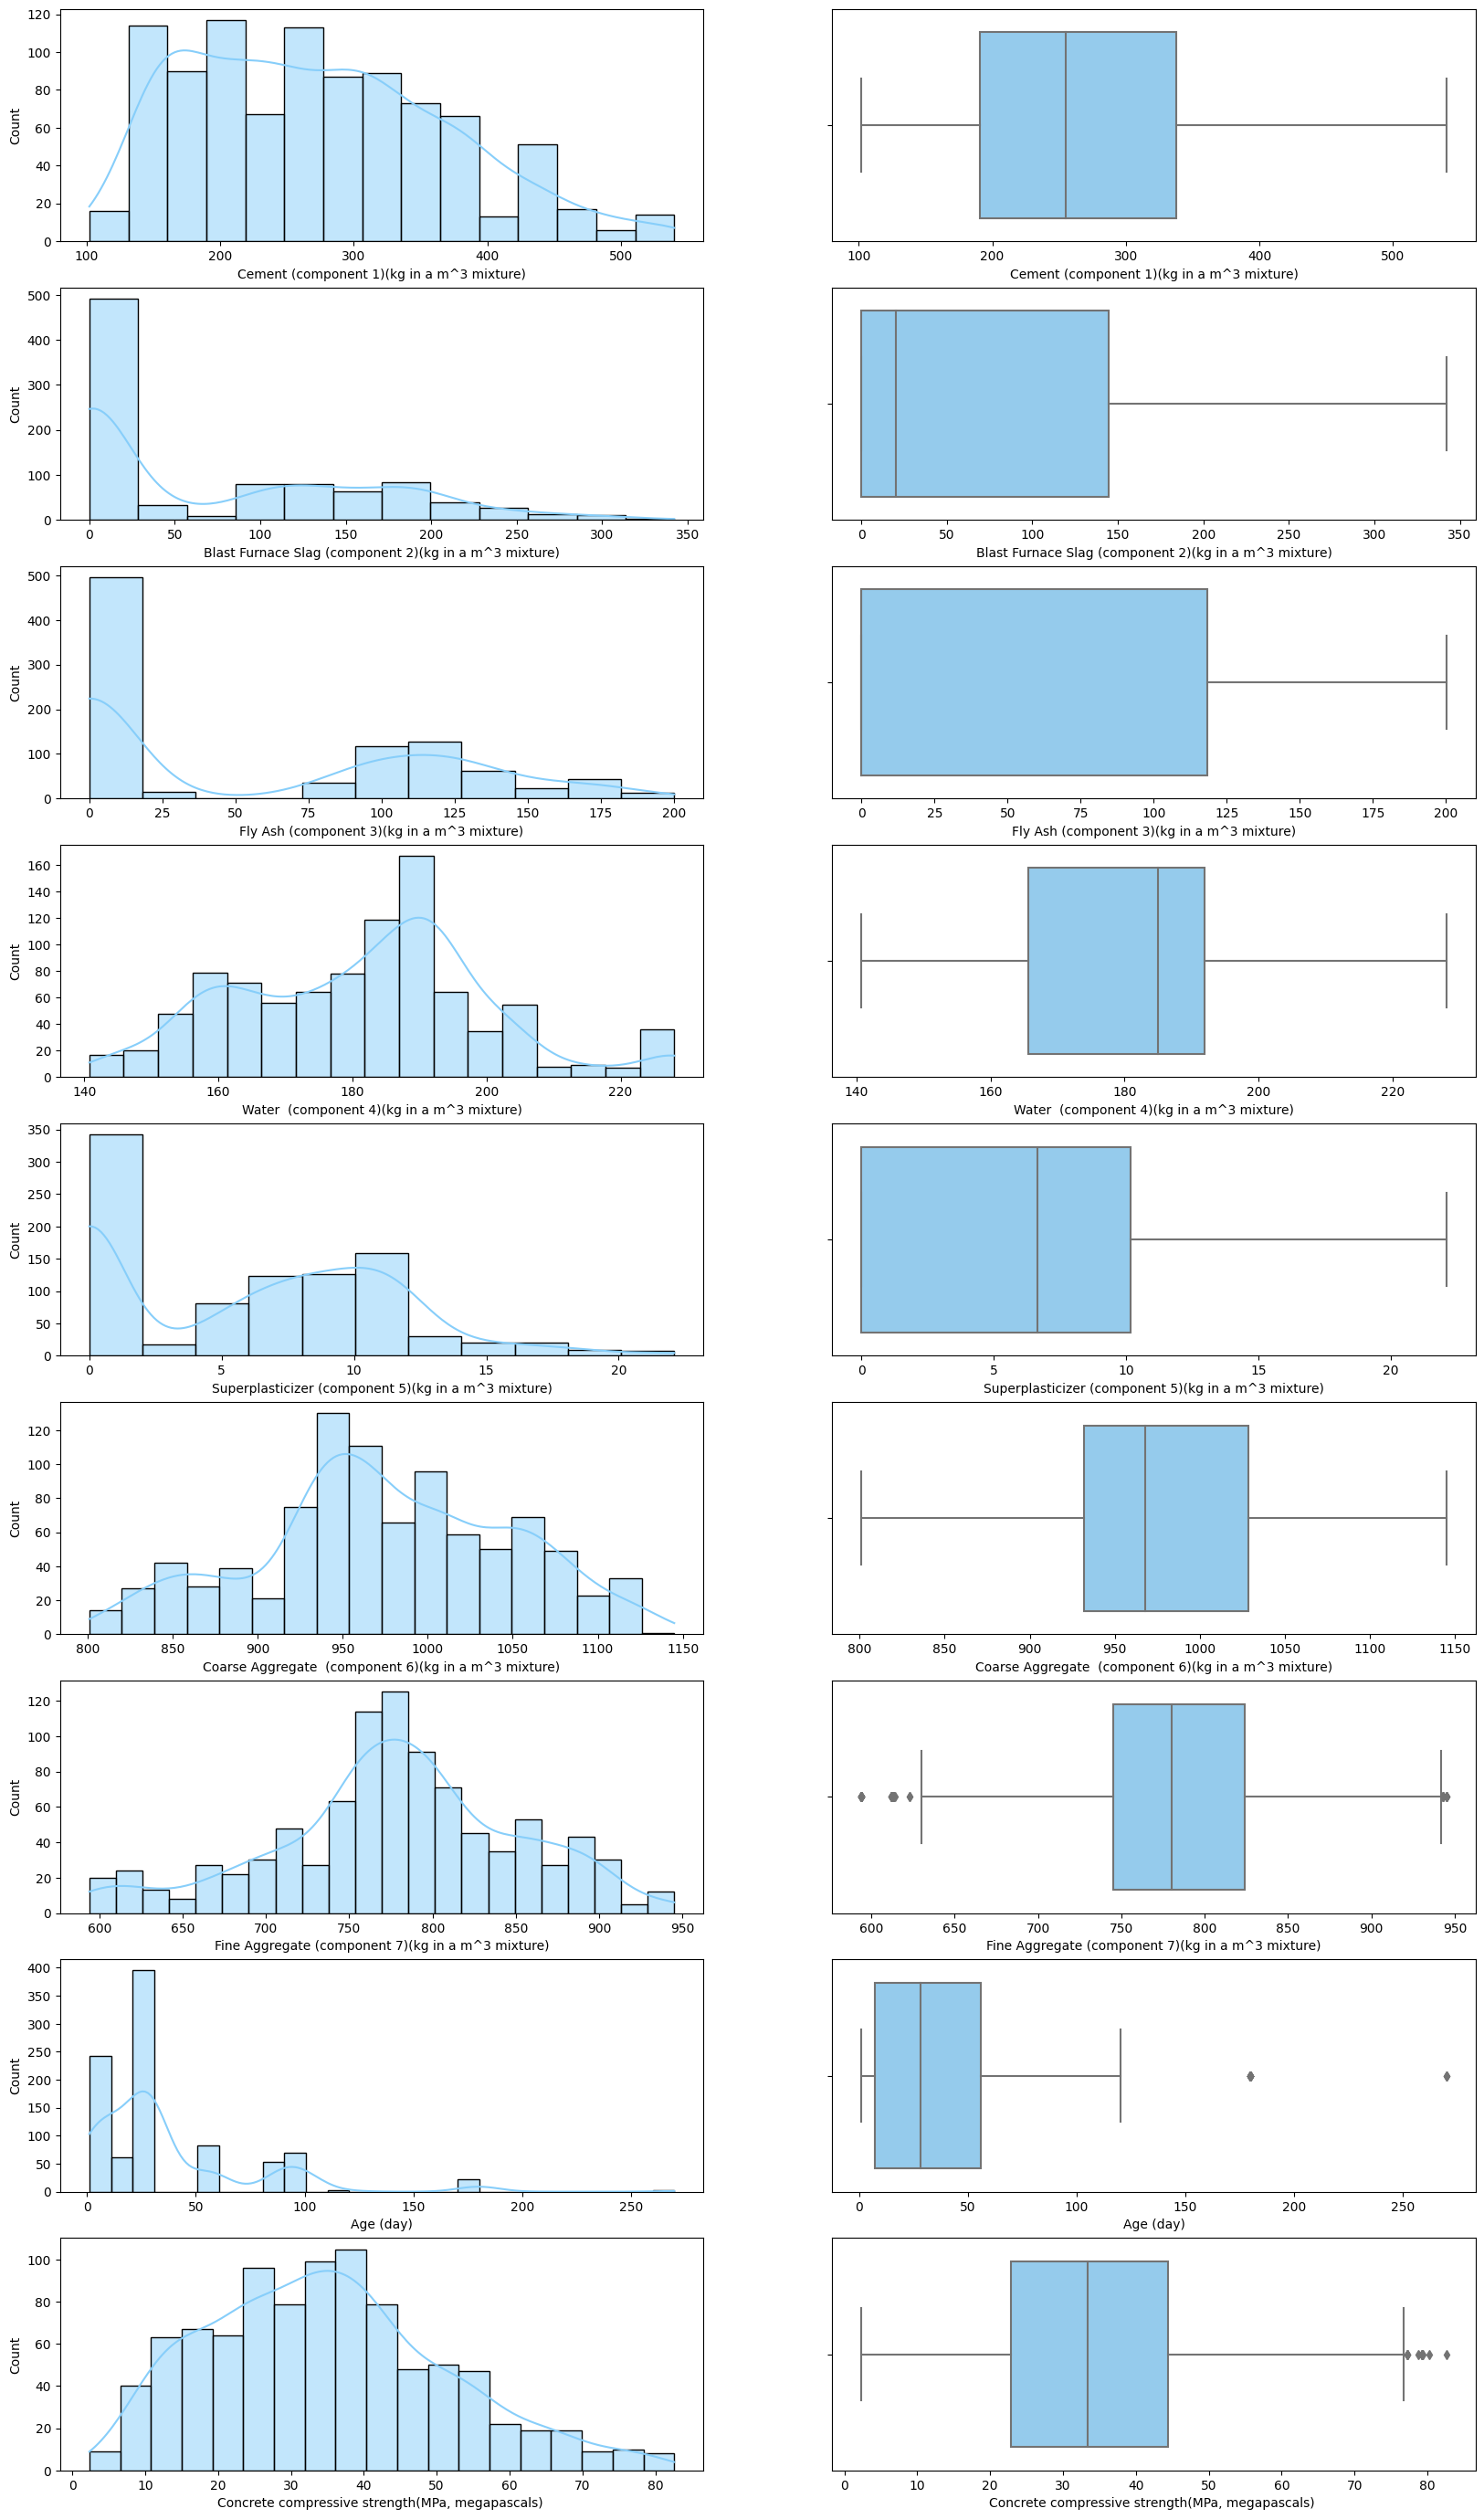

In [ ]:
import warnings

# Ignorando la advertencia específica de Matplotlib: MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", message="Auto-removal of overlapping axes is deprecated")

# Graficando las distribuciones de cada variable:
fig, axs = plt.subplots(figsize=[20,35], ncols=2, nrows = 18)
plotnumber = 2

for col in concreto_clean.columns:
    if plotnumber <= 18:
       
        ax = plt.subplot(9, 2, plotnumber - 1)        
        sns.histplot(x=concreto_clean[col],kde=True,color="lightskyblue")
        
        ax = plt.subplot(9, 2, plotnumber)  
        sns.boxplot(x=concreto_clean[col],color="lightskyblue")
     
    plotnumber += 2

plt.show()

### **Matrices de correlatión:**

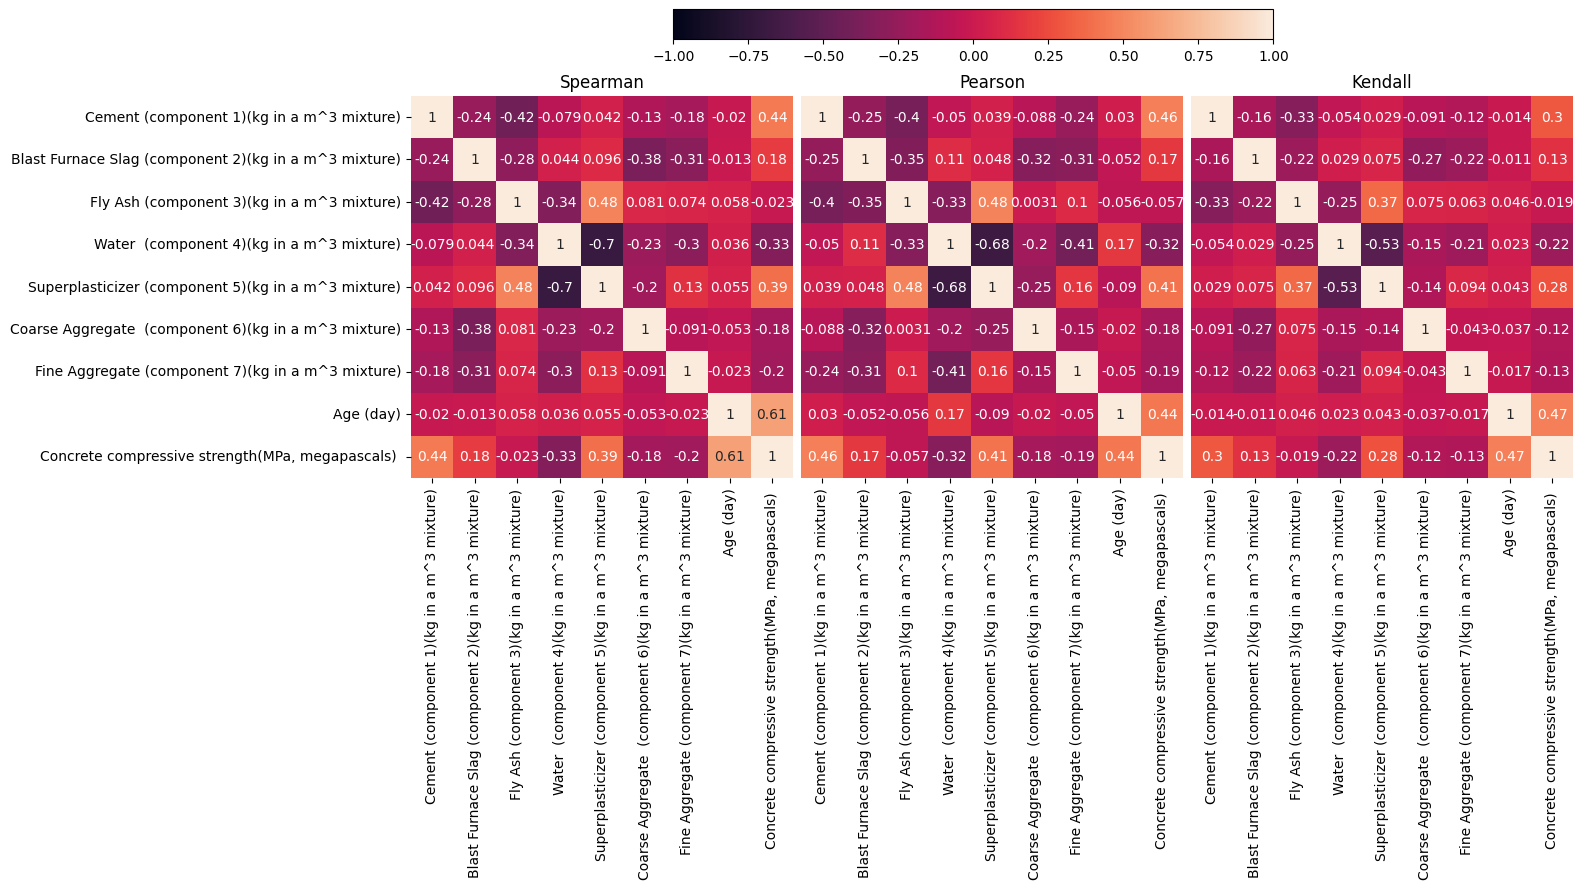

In [ ]:
fig, axs = plt.subplots(figsize=[15, 15], ncols=3)

Pearson_corr_matrix = concreto_clean.corr(method='pearson') # Calcular la matriz de correlación de Pearson
Kendall_corr_matrix = concreto_clean.corr(method='kendall') # Calcular la matriz de correlación de Kendall
Spearman_corr_matrix = concreto_clean.corr(method='spearman') # Calcular la matriz de correlación de Spearman

ax1 = sns.heatmap(Spearman_corr_matrix, annot=True, ax=axs[0], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax1.set_title("Spearman", fontsize=12)

ax2 = sns.heatmap(Pearson_corr_matrix, annot=True, ax=axs[1], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax2.set_title("Pearson", fontsize=12)
ax2.set_yticks([])

ax3 = sns.heatmap(Kendall_corr_matrix, annot=True, ax=axs[2], vmin=-1, vmax=1, cbar=False, square=True, annot_kws={"fontsize": 10})
ax3.set_title("Kendall", fontsize=12)
ax3.set_yticks([])

cbar_ax = fig.add_axes([0.3, 0.66, 0.4, 0.02]) # [left, bottom, width, height]
fig.colorbar(ax1.collections[0], ax=axs, cax=cbar_ax, shrink=0.7, pad=0.05,orientation='horizontal')
fig.subplots_adjust(wspace=0.02)

plt.show()

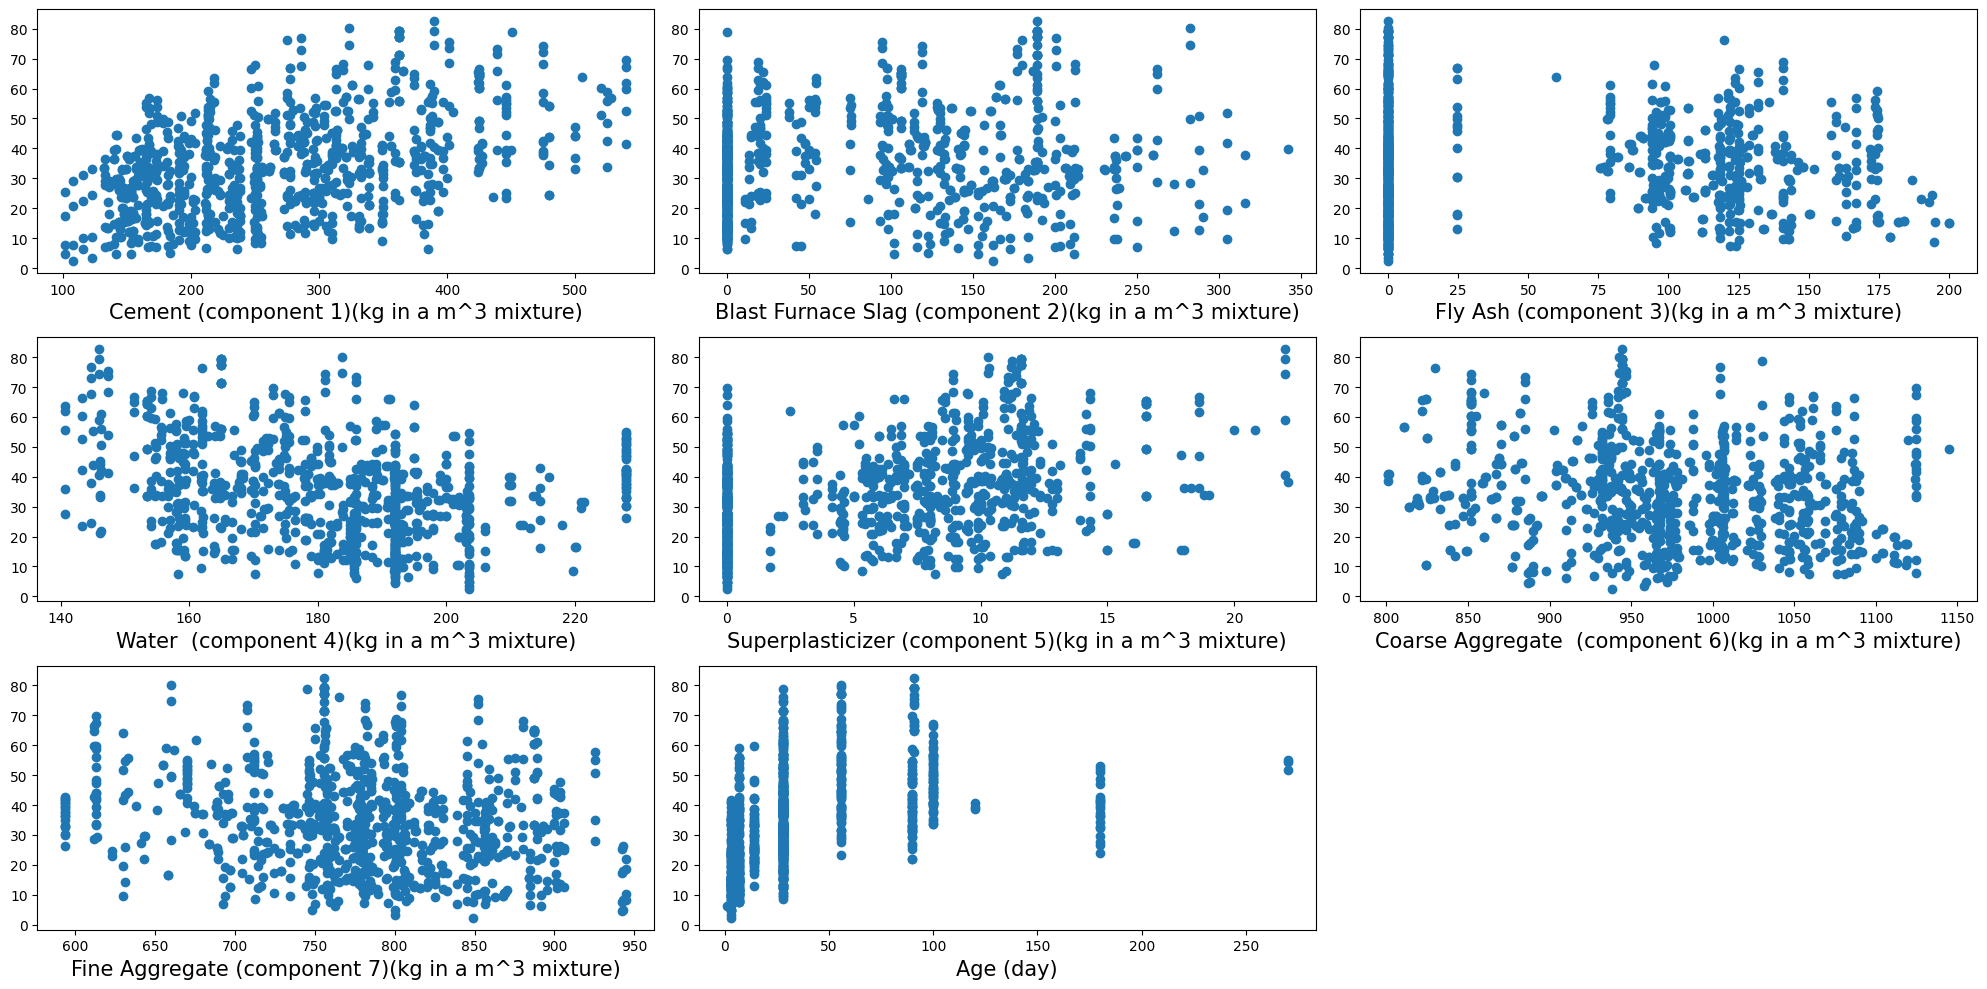

In [ ]:
Y = concreto_clean["Concrete compressive strength(MPa, megapascals) "]

plt.figure(figsize = (20, 10))
plotnumber = 1

for col in concreto_clean.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        plt.scatter(concreto_clean[col], Y)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## **Tercera parte:**

### **Modelo RLM entrenado:**

In [ ]:
### Ejecutando un modelo lineal (Regresion Simple)

X = sm.add_constant(concreto_clean.drop(["Concrete compressive strength(MPa, megapascals) "], axis = 1))
model = sm.OLS(concreto_clean["Concrete compressive strength(MPa, megapascals) "], X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.720
Model:                                                          OLS   Adj. R-squared:                  0.718
Method:                                               Least Squares   F-statistic:                     297.1
Date:                                              Thu, 11 May 2023   Prob (F-statistic):          2.24e-249
Time:                                                      02:41:10   Log-Likelihood:                -3338.7
No. Observations:                                               933   AIC:                             6695.
Df Residuals:                                                   924   BIC:                             6739.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    13.9116     27.263      0.510      0.610     -39.593      67.416
Cement (component 1)(kg in a m^3 mixture)                 0.1122      0.008     13.212      0.000       0.095       0.129
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.0931      0.010      9.333      0.000       0.073       0.113
Fly Ash (component 3)(kg in a m^3 mixture)                0.0685      0.013      5.451      0.000       0.044       0.093
Water  (component 4)(kg in a m^3 mixture)                -0.2135      0.043     -4.934      0.000      -0.298      -0.129
Superplasticizer (component 5)(kg in a m^3 mixture)       0.3744      0.101      3.714      0.000       0.177       0.572
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0070      0.009      0.748      0.454      -0.011       0.025
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0018      0.011      0.165      0.869      -0.019       0.023
Age (day)                                                 0.2168      0.008     28.728      0.000       0.202       0.232
==============================================================================
Omnibus:                       19.712   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.694
Skew:                          -0.256   Prob(JB):                     4.34e-06
Kurtosis:                       3.611   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Este modelo tiene un **R²** ajustado de 0.72, es decir, el modelo es capaz de explicar el 72% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

El valor P de la **significancia de tener un modelo** (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Al revisar los valores P de los **coeficiente de las variables**, se encuentra que algunos son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable obejtivo varía en promedio tantas unidades como indica la pendiente. Mientras que otros, como los de las variables Fine Aggregate, Coarse Aggregate y la constante no son significativos y habría que extraerlos del modelo final. 

Posteriormente, se procede a validar los supuestos del modelo, resultado que se presenta a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.2 de la prueba Durbin-Watson que no está entre 1.5 y 2.5, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que existe autocorrelación entre los errores.

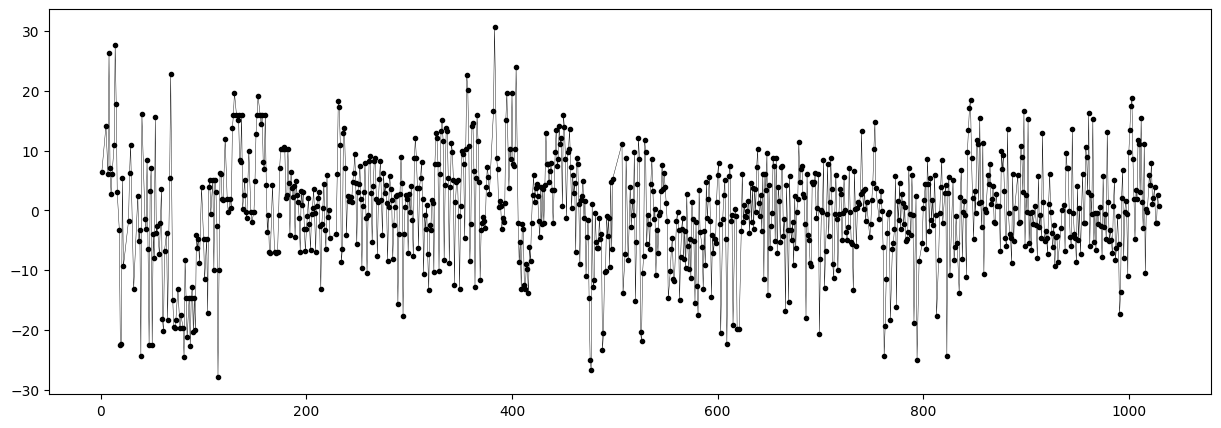

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.00 de la prueba Jarque-Bera menor que (<) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

(array([ 15.,  31.,  55., 154., 267., 243., 108.,  49.,   8.,   3.]),
 array([-27.85102506, -21.99094823, -16.1308714 , -10.27079457,
         -4.41071773,   1.4493591 ,   7.30943593,  13.16951277,
         19.0295896 ,  24.88966643,  30.74974326]),
 <BarContainer object of 10 artists>)

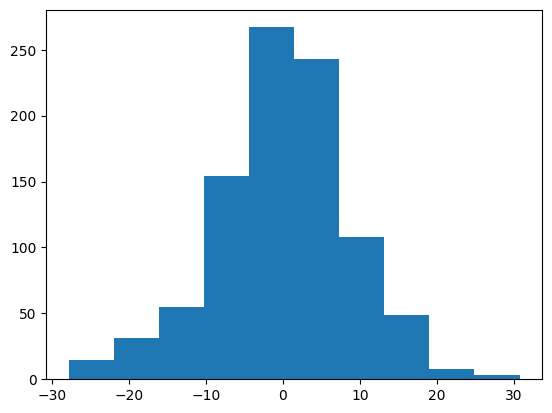

In [ ]:
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.99 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  6.695341409381824e-13
P-value:  0.999999999999466


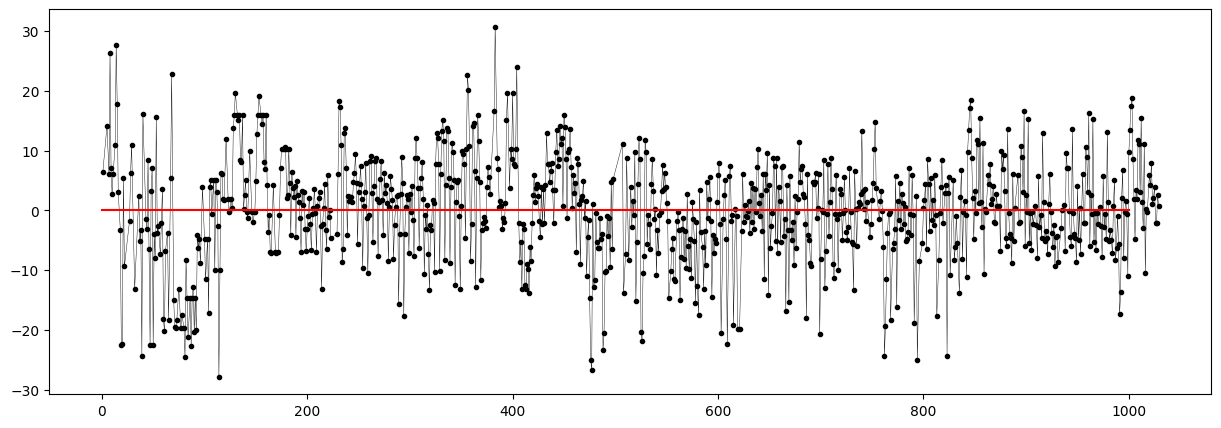

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.00 de una prueba Breuschpagan menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, no se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 92.97985332246812),
 ('p-value', 1.153240932450718e-16),
 ('f-value', 12.784423208444347),
 ('f p-value', 1.5104428449607658e-17)]

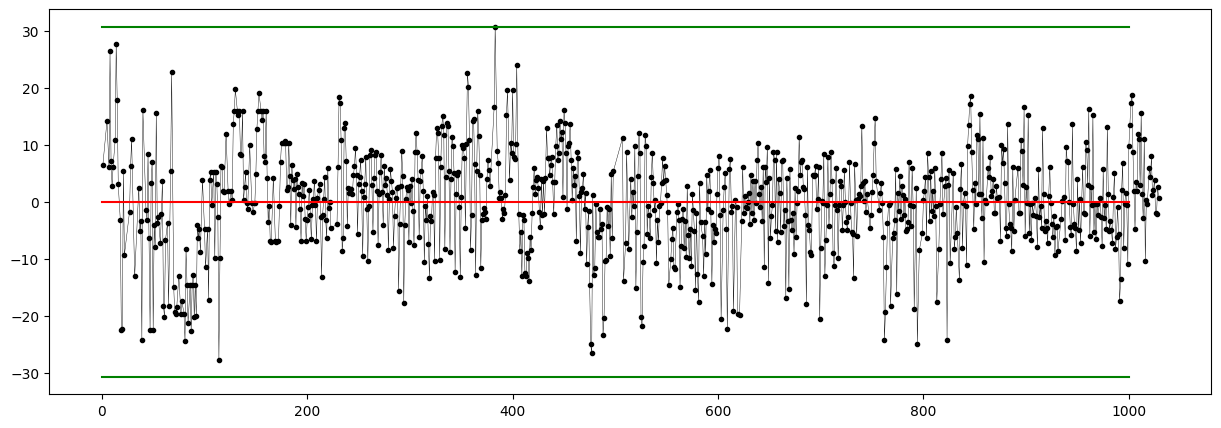

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

## **Cuarta parte:**

### **Modelo de regresión reducido:**

In [ ]:
### Ejecutando un modelo lineal (Regresion Simple)

X = sm.add_constant(concreto_clean.drop(["Concrete compressive strength(MPa, megapascals) ","Coarse Aggregate  (component 6)(kg in a m^3 mixture)", "Fine Aggregate (component 7)(kg in a m^3 mixture)","Superplasticizer (component 5)(kg in a m^3 mixture)"], axis = 1))
model = sm.OLS(concreto_clean["Concrete compressive strength(MPa, megapascals) "], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.716
Model:                                                          OLS   Adj. R-squared:                  0.714
Method:                                               Least Squares   F-statistic:                     466.8
Date:                                              Thu, 11 May 2023   Prob (F-statistic):          2.91e-250
Time:                                                      02:51:16   Log-Likelihood:                -3345.9
No. Observations:                                               933   AIC:                             6704.
Df Residuals:                                                   927   BIC:                             6733.
Df Model:                                                         5                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    34.2562      3.672      9.329      0.000      27.050      41.462
Cement (component 1)(kg in a m^3 mixture)                 0.1162      0.004     31.271      0.000       0.109       0.123
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.0981      0.004     24.462      0.000       0.090       0.106
Fly Ash (component 3)(kg in a m^3 mixture)                0.0821      0.006     13.354      0.000       0.070       0.094
Water  (component 4)(kg in a m^3 mixture)                -0.2806      0.017    -16.810      0.000      -0.313      -0.248
Age (day)                                                 0.2188      0.008     28.884      0.000       0.204       0.234
==============================================================================
Omnibus:                       19.458   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.203
Skew:                          -0.241   Prob(JB):                     3.37e-06
Kurtosis:                       3.644   Cond. No.                     4.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Este modelo tiene un **R²** ajustado de 0.71, es decir, el modelo es capaz de explicar el 71% de la variabilidad observada y habla de una relación lineal **fuerte** entre las variables. 

El valor P de la **significancia de tener un modelo** (Prob (F-statistic)) es menor que <= un alpha de 0.05, por tanto, se puede decir que hay modelo. 

Al revisar los valores P de los **coeficiente de las variables**, se encuentra que algunos son **significativos** (valor P < alpha de 0.05), es decir, que por cada unidad que aumenta el predictor en cuestión, la variable obejtivo varía en promedio tantas unidades como indica la pendiente. 

Posteriormente, se procede a validar los supuestos del modelo, resultado que se presenta a continuación:

### **Validación de supuestos:**

**1. Autocorrelación en los errores:**
*   H0: No hay autocorrelación en los errores
*   H1: Hay autocorrelación en los errores

Dado un estadístico de prueba de 1.2 de la prueba Durbin-Watson que no está entre 1.5 y 2.5, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que existe autocorrelación entre los errores.

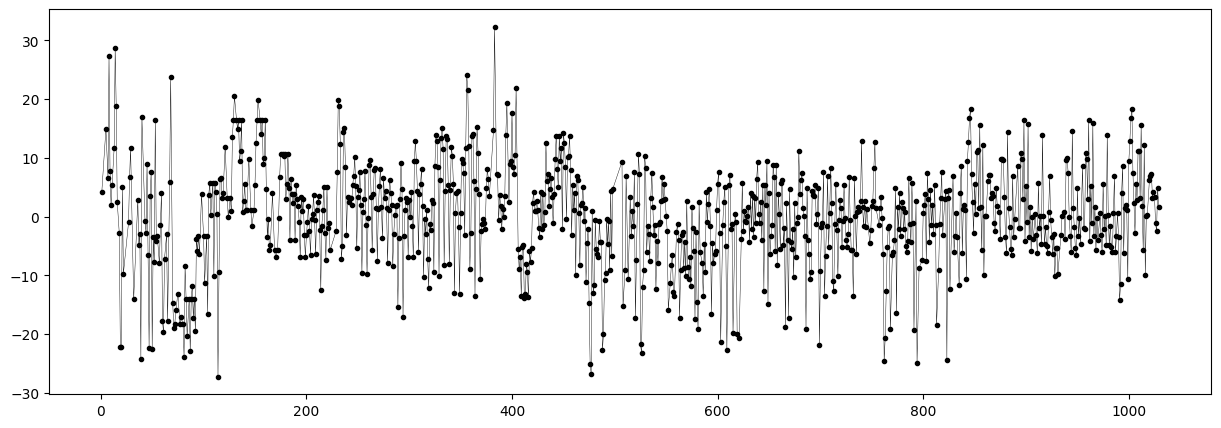

In [ ]:
#Gráfico de errores vs i:

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.show()

**2. Distribución normal de los datos:**
*   H0: Los errores se distribuyen normal
*   H1: Los errores no se distribuyen normal

Dado un valor P de 0.00 de la prueba Jarque-Bera menor que (<) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que los datos no se distribuyen normal.

(array([ 18.,  34.,  69., 159., 289., 230.,  93.,  33.,   5.,   3.]),
 array([-27.27351925, -21.31267002, -15.35182079,  -9.39097157,
         -3.43012234,   2.53072689,   8.49157612,  14.45242535,
         20.41327458,  26.3741238 ,  32.33497303]),
 <BarContainer object of 10 artists>)

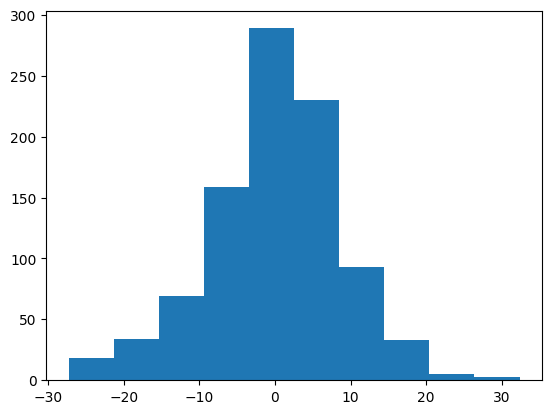

In [ ]:
plt.hist(results.resid)

**3. Media de los errores:**
*   H0: La media de los errores es igual a cero
*   H1: La media de los errores es diferente de cero

Dado un valor P de 0.99 de un One-Sample t-test mayor que (>=) un alpha de 0.05, no es posible rechazar H0, por tanto, no hay evidencia suficiente para afirmar que la media de los errores es diferente de cero. Es decir, se podría asumir una medio de errores igual a cero.

In [ ]:
# Realizar el one-sample t-test
t_stat, p_value = ttest_1samp(results.resid, 0)

# Imprimir los resultados
print("One-sample t-test para la media de los residuos:")
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

One-sample t-test para la media de los residuos:
T-statistic:  -4.0739123631334827e-13
P-value:  0.999999999999675


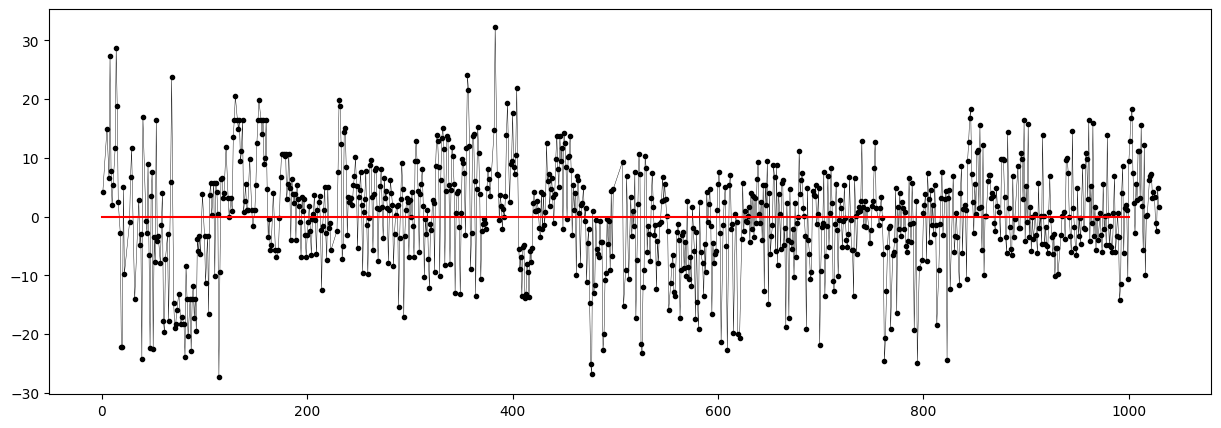

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.show()

**4. Varianza constante de los errores:**
*   H0: Los errores son homocedásticos
*   H1: Los errores no son homocedásticos

Dado un valor P de 0.00 de una prueba Breuschpagan menor que (<) un alpha de 0.05, es posible rechazar H0, por tanto, hay evidencia suficiente para afirmar que los errores no son homocedásticos. Es decir, no se podría asumir homocedasticidad.

In [ ]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 90.15707301205387),
 ('p-value', 6.227709137324165e-18),
 ('f-value', 19.831834380065754),
 ('f p-value', 8.153467922960326e-19)]

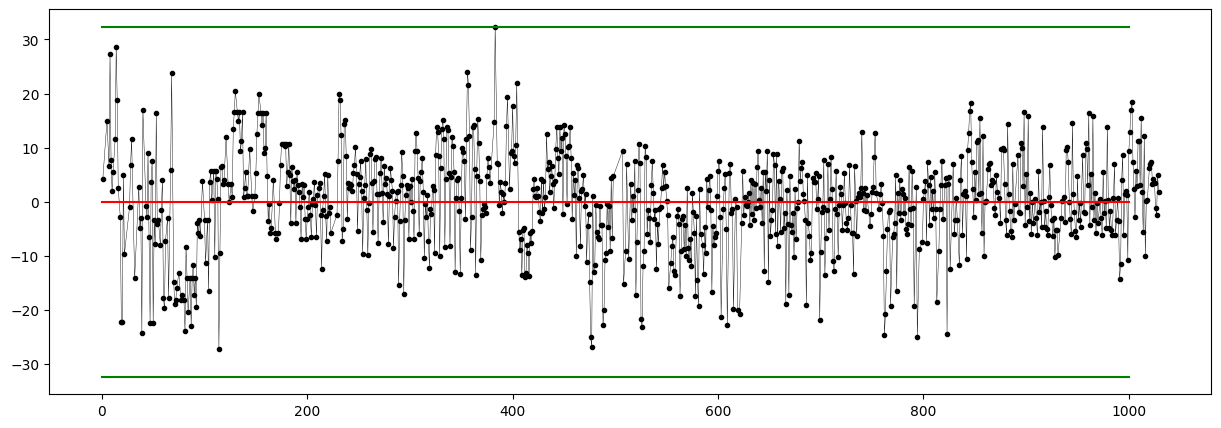

In [ ]:
#Gráfico de errores vs i, con media cero y varianza constante:

mx=max(results.resid)

plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)
plt.plot([0,1000], [0,0], color = "red")
plt.plot([0,1000], [mx,mx], color = "green")
plt.plot([0,1000], [-mx,-mx], color = "green")

plt.show()

### **Propuesta:**

### **¿Es necesaria una aproximación más robusta?**

Definitivamente, creo que es necesario un enfoque más robusto, quizas una aproximación desde un modelo calculado con una varianza estandarizada de Kendall o un modelo de regularización que elimine betas no siginificativos como el Lasso para reducir el riesgo de multicolinealidad.

# **Conclusiones Generales:**

Supone una valoración final de la investigación. En este apartado se responde a la cuestión ¿qué significan los hallazgos?
Se interpretan los resultados obtenidos y se relacionan con los hallazgos que había antes de desarrollar el estudio. En este apartado sí que hay un juicio subjetivo (“Estos datos evidencian que…”, “A partir de ello se constata que…”, etc.).
Es interesante incluir una síntesis del estudio, evidenciándola con los datos obtenidos a modo de conclusión.

# **Referencias**

Aiken, L. S., & West, S. G. (1991). Multiple Regression: Testing and interpreting interactions. Newbury Park, CA: Sage Publications

Cohen, J., & Cohen, P. (1983). Applied multiple regression/correlation analysis for the behavioral sciences (2nd ed.). Hillsdale, NJ: Lawrence Erlbaum. 